The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.



In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("grades.csv")
df


Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [4]:
# Observation:

# CGPA is the target column based on the problem statement

In [5]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()

No. of Rows : 571
No. of Columns : 43


Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

  ME-107 CS-107 HS-205/20 MT-222 EE-222 MT-224 CS-210 CS-211 CS-203 CS-214  \
0     C-     C-        B+      D     A-     B-     C+     D+     D+      D   
1      D     B+        C+     B-     C-     D+     D+      D      C      D   
2     A-     B-        A-      A      A      A      A     A+      A     A-   
3     C+      D         B     D+     B-      D      C     B+     C+      D   
4     A-      C         A      A     A-     A-     A-     B-      A     A-   

  EE-217 CS-212 CS-215 MT-331 EF-303 HS-304 CS-301 CS-302 TC-383 MT-442  \
0      A      D     C-      C     C-     C+      B      C     C+     B+   
1     B-      C      D     D+      D     C-     A-     D+     C-     C-   
2      A     A-      A      A     C+      A     B+     A-      B      A   
3     D+      D      D     D+      D     B-      D     B-     D+     C-   
4      A     A-     A-     C+     C-     A-     B-     A-     C+     A-   

  EL-332 CS-318 CS-306 CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419  \
0      C     C-      C     C-     C-     C-     C-     A-      A     C-   
1      C     A-      D     D+      D      C      D     A-     B-      C   
2     B+     A-     A-      B      B      A      C      A      A      A   
3     D+     B+     C-     D+      C     D+     C-     B-      B     C+   
4     A-     B-     A-     B-     B+     B+     B-     A-      A     A-   

  CS-423 CS-412   CGPA  
0      B     A-  2.205  
1      C      B  2.008  
2     A-      A  3.608  
3     C+     C+  1.906  
4     A-      A  3.448

In [6]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['CGPA'], object: ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']}

In [7]:
# Observations:

# There are float and object datatype in this data set

# Except "CGPA" other columns are categorical in nature

# Only CGPA is float and rest of the columns are object data type

In [8]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()


object     42
float64     1
dtype: int64

In [9]:
# Observations:

# No. of object datatypes: 42

# No. of float datatypes: 1

# Data Integrity Check

In [10]:
# Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [11]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [12]:
# Observations:

# No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe

# Duplicate Values Check

In [13]:
df.duplicated().sum()

0

In [14]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Seat No., PH-121, HS-101, CY-105, HS-105/12, MT-111, CS-105, CS-106, EL-102, EE-119, ME-107, CS-107, HS-205/20, MT-222, EE-222, MT-224, CS-210, CS-211, CS-203, CS-214, EE-217, CS-212, CS-215, MT-331, EF-303, HS-304, CS-301, CS-302, TC-383, MT-442, EL-332, CS-318, CS-306, CS-312, CS-317, CS-403, CS-421, CS-406, CS-414, CS-419, CS-423, CS-412, CGPA]
Index: []

In [15]:
# Observations:

# No duplicate values present in the dataframe

# Null Values Handling

In [16]:
 # Checking the sum of null values for all columns
    
df.isnull().sum().sum()

425

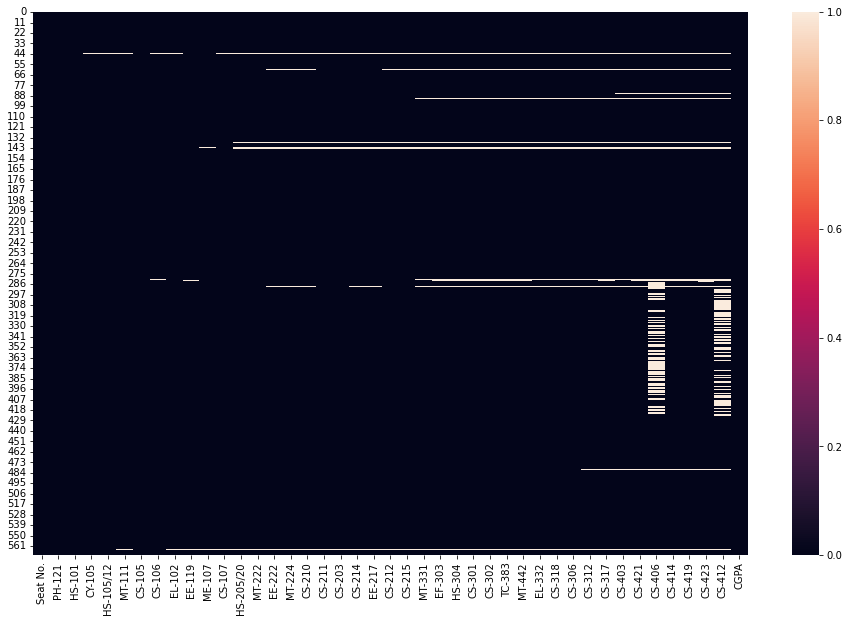

In [17]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [18]:
#Finding the percentage of data missing from the dataset
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
df_null=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null.sort_values(by=["% Missing data"],ascending=False)

Missing Values


Data Type  Missing Values  % Missing data
CS-406       object              85            14.9
CS-412       object              79            13.8
CS-423       object              14             2.5
CS-414       object              13             2.3
CS-419       object              13             2.3
CS-317       object              12             2.1
CS-421       object              12             2.1
CS-403       object              12             2.1
TC-383       object              10             1.8
EF-303       object              10             1.8
HS-304       object              10             1.8
CS-301       object              10             1.8
CS-302       object              10             1.8
CS-312       object              10             1.8
MT-442       object              10             1.8
MT-331       object               9             1.6
EL-332       object               9             1.6
CS-318       object               9             1.6
CS-306       object               9             1.6
EE-222       object               7             1.2
MT-224       object               7             1.2
CS-210       object               7             1.2
CS-212       object               6             1.1
CS-215       object               6             1.1
EE-217       object               6             1.1
CS-214       object               6             1.1
CS-203       object               5             0.9
CS-211       object               5             0.9
MT-222       object               5             0.9
HS-205/20    object               5             0.9
CS-107       object               2             0.4
ME-107       object               2             0.4
EE-119       object               2             0.4
EL-102       object               2             0.4
CS-106       object               2             0.4
MT-111       object               2             0.4
HS-105/12    object               1             0.2
CY-105       object               1             0.2
Seat No.     object               0             0.0
PH-121       object               0             0.0
CS-105       object               0             0.0
HS-101       object               0             0.0
CGPA        float64               0             0.0

In [19]:
# Observation
# Null values are present in most of the categorical columns.

# As the data is categorical in nature, I will use 'mode' to replace null values.

In [20]:
# Missing Values Imputation

# Filling null values of column with categorical data with first value of 'mode'
for i in df.columns:
    if (df[i].dtype=='O' and df[i].isnull().sum()!=0):
        df[i]=df[i].fillna(df[i].mode()[0])

print(df.isnull().sum().sum())

0


# Segregating columns based on data type for better EDA

In [22]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df_categorical=df[categorical]

There are 42 categorical variables

The categorical variables are : ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


In [23]:
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 1 numerical variables

The numerical variables are : ['CGPA']


In [24]:
# Observation

# 'CGPA' is target column

In [25]:
# Dataframe of column with Target Data
df_target=df["CGPA"].copy()

# Statistical Summary

In [26]:
# Statistical summary for categorical data
df_categorical.describe(include="O").T


count unique       top freq
Seat No.    571    571  CS-97001    1
PH-121      571     13        A-  112
HS-101      571     12        A-   82
CY-105      571     13         A  178
HS-105/12   571     13         A   97
MT-111      571     13        A-  107
CS-105      571     11         A  151
CS-106      571     13        A-  118
EL-102      571     13        A-  107
EE-119      571     12        A-  139
ME-107      571     13        A-   81
CS-107      571     14         A  107
HS-205/20   571     13        A-  155
MT-222      571     14        A-   91
EE-222      571     13         A  129
MT-224      571     14        A-  127
CS-210      571     14        A-  140
CS-211      571     14        A-   73
CS-203      571     13        A-   93
CS-214      571     13         C   82
EE-217      571     13        A-  143
CS-212      571     12        A-  107
CS-215      571     14        A-   85
MT-331      571     12         A  127
EF-303      571     12         B  122
HS-304      571     14        A-  138
CS-301      571     12        A-  118
CS-302      571     11        A-  123
TC-383      571     12         A  115
MT-442      571     12        A-  150
EL-332      571     13        A-  105
CS-318      571     14        A-   98
CS-306      571     13        A-  129
CS-312      571     14        A+  103
CS-317      571     12        B-   91
CS-403      571     11         A  145
CS-421      571     13         B   98
CS-406      571     14        A-  262
CS-414      571     13         A  189
CS-419      571     12        A-  133
CS-423      571     12        A-  136
CS-412      571     13        A-  236

In [27]:
# Observations:

# Count is same for all columns. Hence,no null values are present.

# Unique shows the unique values present in each column

# Top shows the mode of each column

# We can see the different frequency for all subjects

# Visualization of data

# Univariate Graphical Analysis

In [28]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

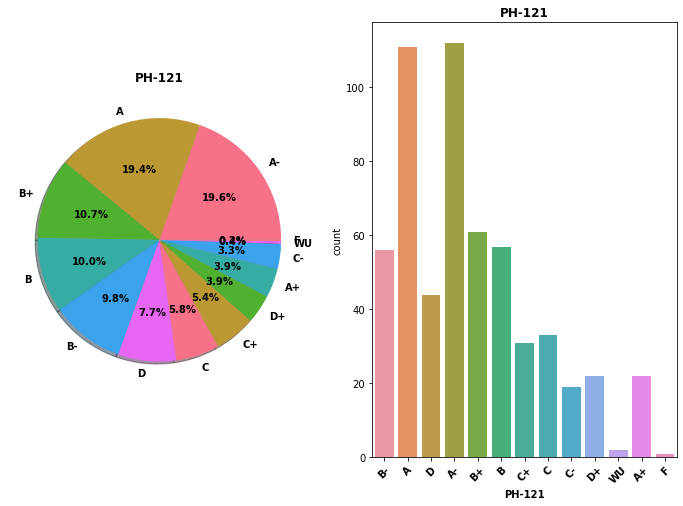

**Observations for subject PH-121 :**

No. of students with A- grade are: 112
No. of students with A grade are: 111
No. of students with B+ grade are: 61
No. of students with B grade are: 57
No. of students with B- grade are: 56
No. of students with D grade are: 44
No. of students with C grade are: 33
No. of students with C+ grade are: 31
No. of students with D+ grade are: 22
No. of students with A+ grade are: 22
No. of students with C- grade are: 19
No. of students with WU grade are: 2
No. of students with F grade are: 1


% of students with A- grade are: 19.6%
% of students with A grade are: 19.4%
% of students with B+ grade are: 10.7%
% of students with B grade are: 10.0%
% of students with B- grade are: 9.8%
% of students with D grade are: 7.7%
% of students with C grade are: 5.8%
% of students with C+ grade are: 5.4%
% of students with D+ grade are: 3.9%
% of students with A+ grade are: 3.9%
% of students with C- grade are: 3.3%
% of students with WU grade are: 0.4%
% of students with F grade are: 0.2%




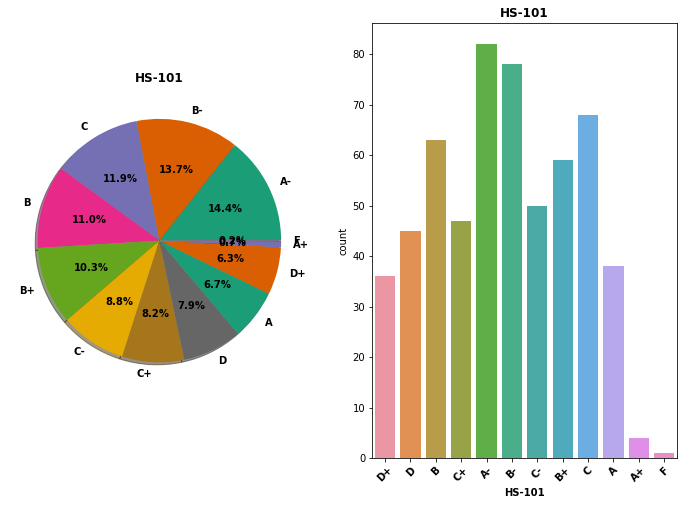

**Observations for subject HS-101 :**

No. of students with A- grade are: 82
No. of students with B- grade are: 78
No. of students with C grade are: 68
No. of students with B grade are: 63
No. of students with B+ grade are: 59
No. of students with C- grade are: 50
No. of students with C+ grade are: 47
No. of students with D grade are: 45
No. of students with A grade are: 38
No. of students with D+ grade are: 36
No. of students with A+ grade are: 4
No. of students with F grade are: 1


% of students with A- grade are: 14.4%
% of students with B- grade are: 13.7%
% of students with C grade are: 11.9%
% of students with B grade are: 11.0%
% of students with B+ grade are: 10.3%
% of students with C- grade are: 8.8%
% of students with C+ grade are: 8.2%
% of students with D grade are: 7.9%
% of students with A grade are: 6.7%
% of students with D+ grade are: 6.3%
% of students with A+ grade are: 0.7%
% of students with F grade are: 0.2%




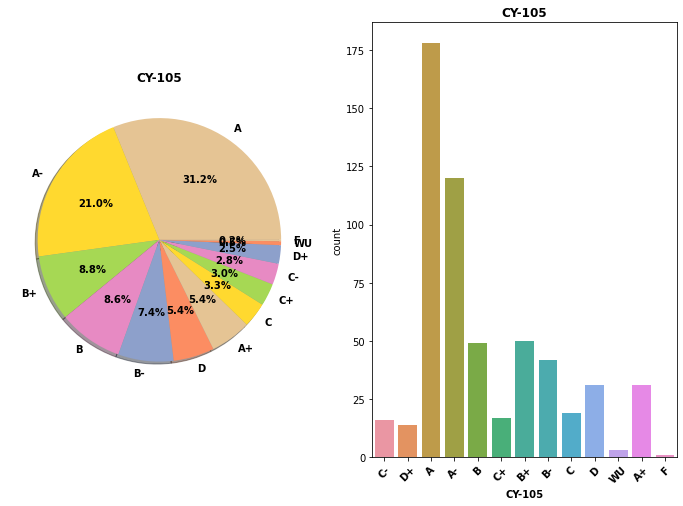

**Observations for subject CY-105 :**

No. of students with A grade are: 178
No. of students with A- grade are: 120
No. of students with B+ grade are: 50
No. of students with B grade are: 49
No. of students with B- grade are: 42
No. of students with D grade are: 31
No. of students with A+ grade are: 31
No. of students with C grade are: 19
No. of students with C+ grade are: 17
No. of students with C- grade are: 16
No. of students with D+ grade are: 14
No. of students with WU grade are: 3
No. of students with F grade are: 1


% of students with A grade are: 31.2%
% of students with A- grade are: 21.0%
% of students with B+ grade are: 8.8%
% of students with B grade are: 8.6%
% of students with B- grade are: 7.4%
% of students with D grade are: 5.4%
% of students with A+ grade are: 5.4%
% of students with C grade are: 3.3%
% of students with C+ grade are: 3.0%
% of students with C- grade are: 2.8%
% of students with D+ grade are: 2.5%
% of students with WU grade are: 0.5%
% of students with F grade are: 0.2%




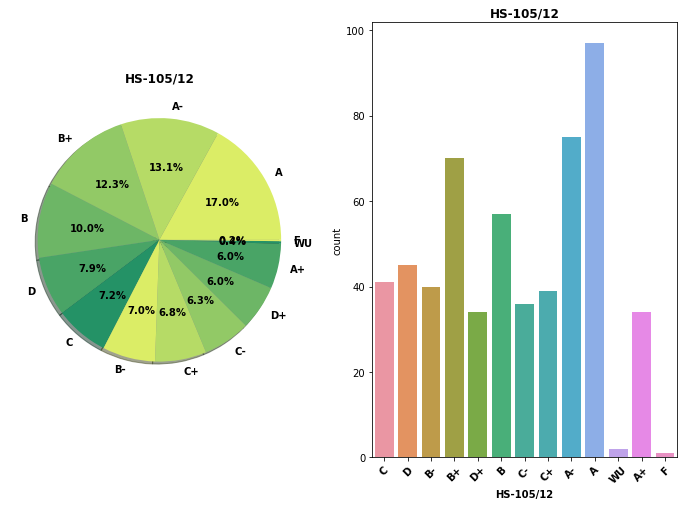

**Observations for subject HS-105/12 :**

No. of students with A grade are: 97
No. of students with A- grade are: 75
No. of students with B+ grade are: 70
No. of students with B grade are: 57
No. of students with D grade are: 45
No. of students with C grade are: 41
No. of students with B- grade are: 40
No. of students with C+ grade are: 39
No. of students with C- grade are: 36
No. of students with D+ grade are: 34
No. of students with A+ grade are: 34
No. of students with WU grade are: 2
No. of students with F grade are: 1


% of students with A grade are: 17.0%
% of students with A- grade are: 13.1%
% of students with B+ grade are: 12.3%
% of students with B grade are: 10.0%
% of students with D grade are: 7.9%
% of students with C grade are: 7.2%
% of students with B- grade are: 7.0%
% of students with C+ grade are: 6.8%
% of students with C- grade are: 6.3%
% of students with D+ grade are: 6.0%
% of students with A+ grade are: 6.0%
% of students with WU grade are: 0.4%
% of students with F grade are: 0.2%




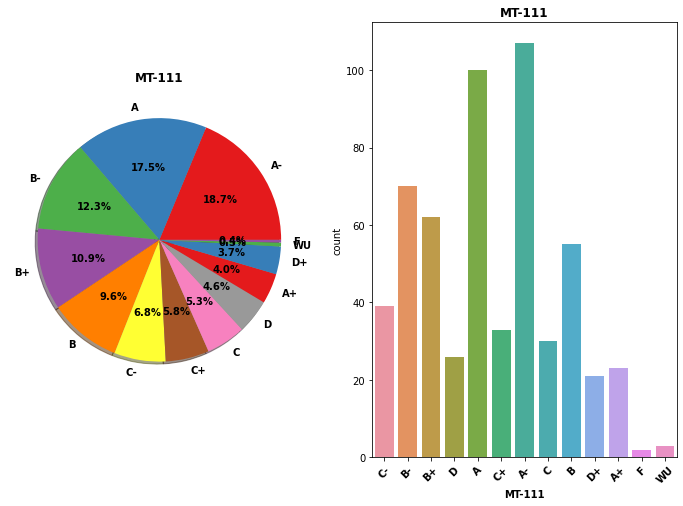

**Observations for subject MT-111 :**

No. of students with A- grade are: 107
No. of students with A grade are: 100
No. of students with B- grade are: 70
No. of students with B+ grade are: 62
No. of students with B grade are: 55
No. of students with C- grade are: 39
No. of students with C+ grade are: 33
No. of students with C grade are: 30
No. of students with D grade are: 26
No. of students with A+ grade are: 23
No. of students with D+ grade are: 21
No. of students with WU grade are: 3
No. of students with F grade are: 2


% of students with A- grade are: 18.7%
% of students with A grade are: 17.5%
% of students with B- grade are: 12.3%
% of students with B+ grade are: 10.9%
% of students with B grade are: 9.6%
% of students with C- grade are: 6.8%
% of students with C+ grade are: 5.8%
% of students with C grade are: 5.3%
% of students with D grade are: 4.6%
% of students with A+ grade are: 4.0%
% of students with D+ grade are: 3.7%
% of students with WU grade are: 0.5%
% of students with F grade are: 0.4%




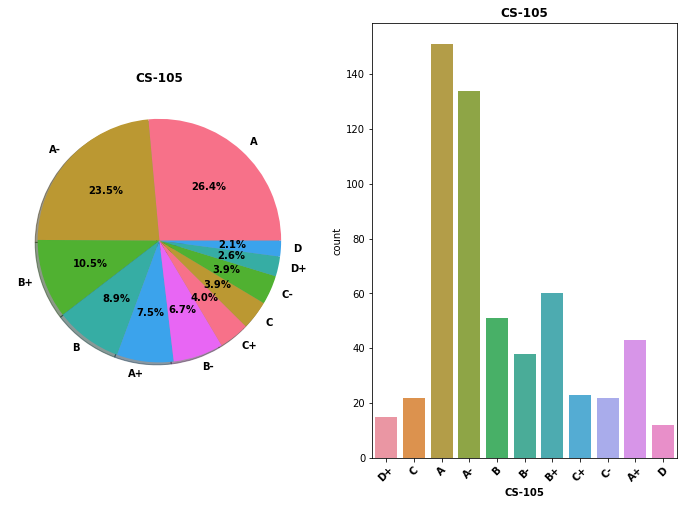

**Observations for subject CS-105 :**

No. of students with A grade are: 151
No. of students with A- grade are: 134
No. of students with B+ grade are: 60
No. of students with B grade are: 51
No. of students with A+ grade are: 43
No. of students with B- grade are: 38
No. of students with C+ grade are: 23
No. of students with C grade are: 22
No. of students with C- grade are: 22
No. of students with D+ grade are: 15
No. of students with D grade are: 12


% of students with A grade are: 26.4%
% of students with A- grade are: 23.5%
% of students with B+ grade are: 10.5%
% of students with B grade are: 8.9%
% of students with A+ grade are: 7.5%
% of students with B- grade are: 6.7%
% of students with C+ grade are: 4.0%
% of students with C grade are: 3.9%
% of students with C- grade are: 3.9%
% of students with D+ grade are: 2.6%
% of students with D grade are: 2.1%




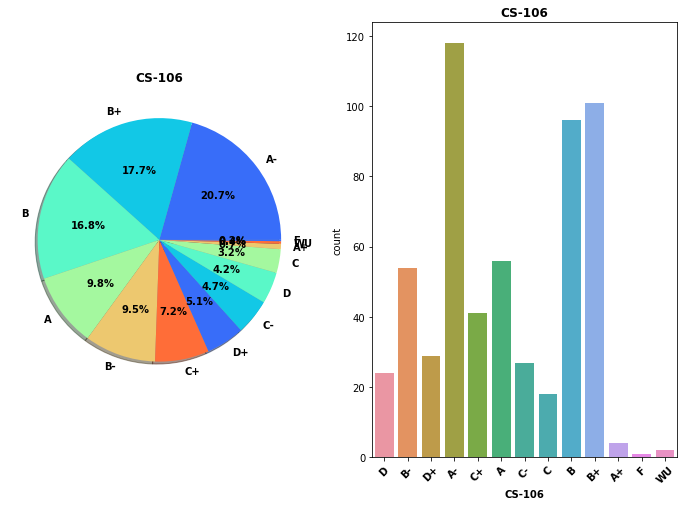

**Observations for subject CS-106 :**

No. of students with A- grade are: 118
No. of students with B+ grade are: 101
No. of students with B grade are: 96
No. of students with A grade are: 56
No. of students with B- grade are: 54
No. of students with C+ grade are: 41
No. of students with D+ grade are: 29
No. of students with C- grade are: 27
No. of students with D grade are: 24
No. of students with C grade are: 18
No. of students with A+ grade are: 4
No. of students with WU grade are: 2
No. of students with F grade are: 1


% of students with A- grade are: 20.7%
% of students with B+ grade are: 17.7%
% of students with B grade are: 16.8%
% of students with A grade are: 9.8%
% of students with B- grade are: 9.5%
% of students with C+ grade are: 7.2%
% of students with D+ grade are: 5.1%
% of students with C- grade are: 4.7%
% of students with D grade are: 4.2%
% of students with C grade are: 3.2%
% of students with A+ grade are: 0.7%
% of students with WU grade are: 0.4%
% of students with F grade are: 0.2%




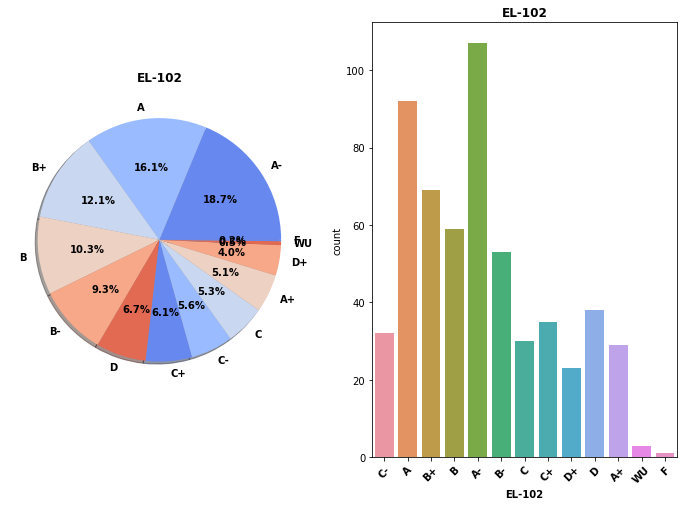

**Observations for subject EL-102 :**

No. of students with A- grade are: 107
No. of students with A grade are: 92
No. of students with B+ grade are: 69
No. of students with B grade are: 59
No. of students with B- grade are: 53
No. of students with D grade are: 38
No. of students with C+ grade are: 35
No. of students with C- grade are: 32
No. of students with C grade are: 30
No. of students with A+ grade are: 29
No. of students with D+ grade are: 23
No. of students with WU grade are: 3
No. of students with F grade are: 1


% of students with A- grade are: 18.7%
% of students with A grade are: 16.1%
% of students with B+ grade are: 12.1%
% of students with B grade are: 10.3%
% of students with B- grade are: 9.3%
% of students with D grade are: 6.7%
% of students with C+ grade are: 6.1%
% of students with C- grade are: 5.6%
% of students with C grade are: 5.3%
% of students with A+ grade are: 5.1%
% of students with D+ grade are: 4.0%
% of students with WU grade are: 0.5%
% of students with F grade are: 0.2%




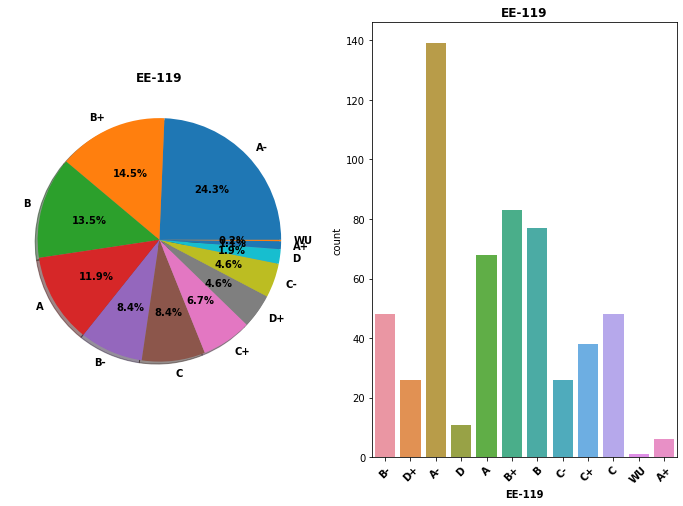

**Observations for subject EE-119 :**

No. of students with A- grade are: 139
No. of students with B+ grade are: 83
No. of students with B grade are: 77
No. of students with A grade are: 68
No. of students with B- grade are: 48
No. of students with C grade are: 48
No. of students with C+ grade are: 38
No. of students with D+ grade are: 26
No. of students with C- grade are: 26
No. of students with D grade are: 11
No. of students with A+ grade are: 6
No. of students with WU grade are: 1


% of students with A- grade are: 24.3%
% of students with B+ grade are: 14.5%
% of students with B grade are: 13.5%
% of students with A grade are: 11.9%
% of students with B- grade are: 8.4%
% of students with C grade are: 8.4%
% of students with C+ grade are: 6.7%
% of students with D+ grade are: 4.6%
% of students with C- grade are: 4.6%
% of students with D grade are: 1.9%
% of students with A+ grade are: 1.1%
% of students with WU grade are: 0.2%




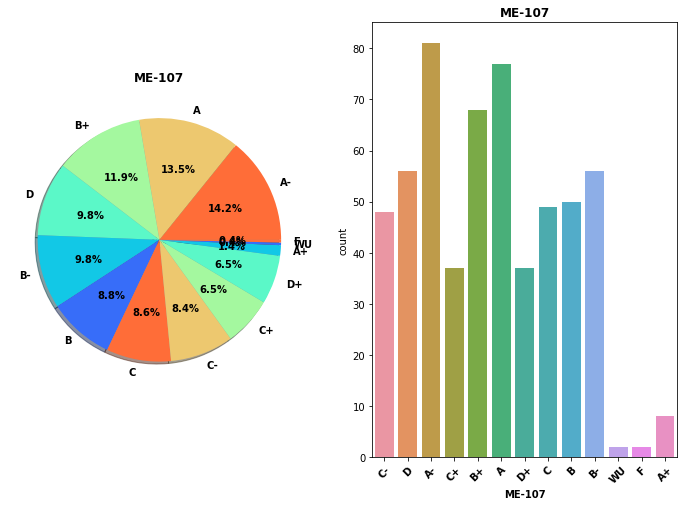

**Observations for subject ME-107 :**

No. of students with A- grade are: 81
No. of students with A grade are: 77
No. of students with B+ grade are: 68
No. of students with D grade are: 56
No. of students with B- grade are: 56
No. of students with B grade are: 50
No. of students with C grade are: 49
No. of students with C- grade are: 48
No. of students with C+ grade are: 37
No. of students with D+ grade are: 37
No. of students with A+ grade are: 8
No. of students with WU grade are: 2
No. of students with F grade are: 2


% of students with A- grade are: 14.2%
% of students with A grade are: 13.5%
% of students with B+ grade are: 11.9%
% of students with D grade are: 9.8%
% of students with B- grade are: 9.8%
% of students with B grade are: 8.8%
% of students with C grade are: 8.6%
% of students with C- grade are: 8.4%
% of students with C+ grade are: 6.5%
% of students with D+ grade are: 6.5%
% of students with A+ grade are: 1.4%
% of students with WU grade are: 0.4%
% of students with F grade are: 0.4%




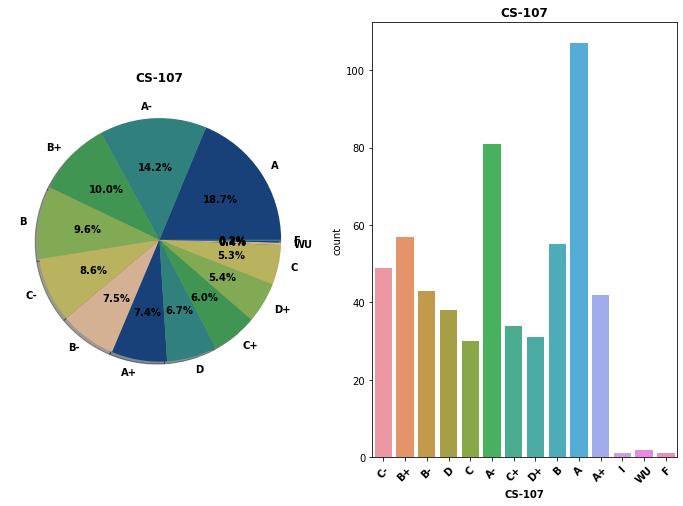

**Observations for subject CS-107 :**

No. of students with A grade are: 107
No. of students with A- grade are: 81
No. of students with B+ grade are: 57
No. of students with B grade are: 55
No. of students with C- grade are: 49
No. of students with B- grade are: 43
No. of students with A+ grade are: 42
No. of students with D grade are: 38
No. of students with C+ grade are: 34
No. of students with D+ grade are: 31
No. of students with C grade are: 30
No. of students with WU grade are: 2
No. of students with I grade are: 1
No. of students with F grade are: 1


% of students with A grade are: 18.7%
% of students with A- grade are: 14.2%
% of students with B+ grade are: 10.0%
% of students with B grade are: 9.6%
% of students with C- grade are: 8.6%
% of students with B- grade are: 7.5%
% of students with A+ grade are: 7.4%
% of students with D grade are: 6.7%
% of students with C+ grade are: 6.0%
% of students with D+ grade are: 5.4%
% of students with C grade are: 5.3%
% of students with WU grade are: 0.4%
% of students with 

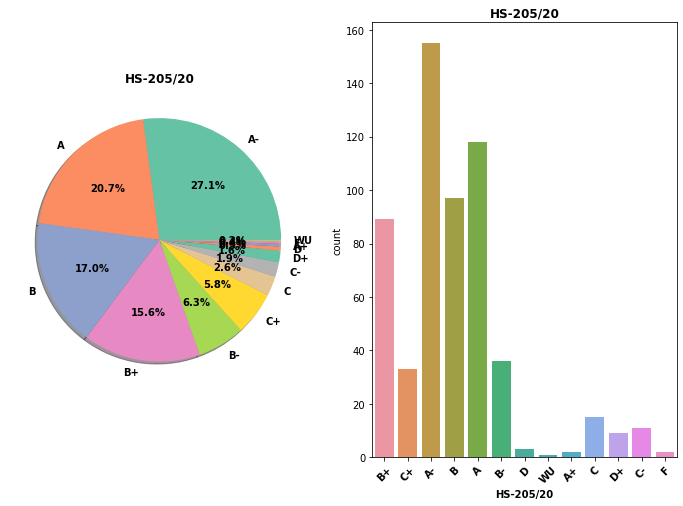

**Observations for subject HS-205/20 :**

No. of students with A- grade are: 155
No. of students with A grade are: 118
No. of students with B grade are: 97
No. of students with B+ grade are: 89
No. of students with B- grade are: 36
No. of students with C+ grade are: 33
No. of students with C grade are: 15
No. of students with C- grade are: 11
No. of students with D+ grade are: 9
No. of students with D grade are: 3
No. of students with A+ grade are: 2
No. of students with F grade are: 2
No. of students with WU grade are: 1


% of students with A- grade are: 27.1%
% of students with A grade are: 20.7%
% of students with B grade are: 17.0%
% of students with B+ grade are: 15.6%
% of students with B- grade are: 6.3%
% of students with C+ grade are: 5.8%
% of students with C grade are: 2.6%
% of students with C- grade are: 1.9%
% of students with D+ grade are: 1.6%
% of students with D grade are: 0.5%
% of students with A+ grade are: 0.4%
% of students with F grade are: 0.4%
% of students with WU grade are: 0.2%




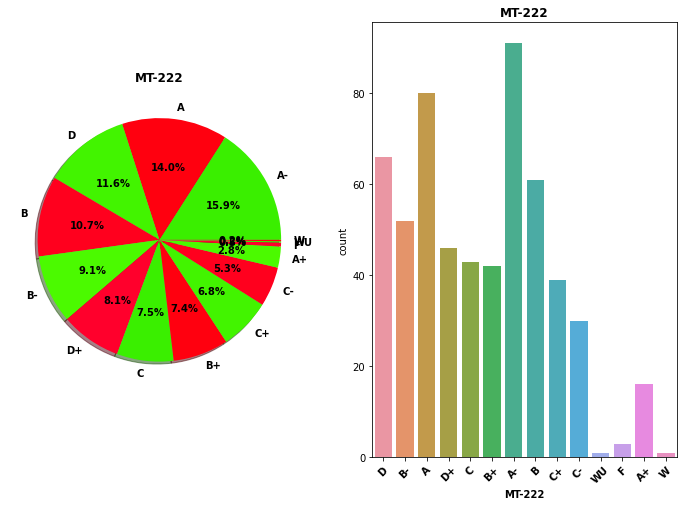

**Observations for subject MT-222 :**

No. of students with A- grade are: 91
No. of students with A grade are: 80
No. of students with D grade are: 66
No. of students with B grade are: 61
No. of students with B- grade are: 52
No. of students with D+ grade are: 46
No. of students with C grade are: 43
No. of students with B+ grade are: 42
No. of students with C+ grade are: 39
No. of students with C- grade are: 30
No. of students with A+ grade are: 16
No. of students with F grade are: 3
No. of students with WU grade are: 1
No. of students with W grade are: 1


% of students with A- grade are: 15.9%
% of students with A grade are: 14.0%
% of students with D grade are: 11.6%
% of students with B grade are: 10.7%
% of students with B- grade are: 9.1%
% of students with D+ grade are: 8.1%
% of students with C grade are: 7.5%
% of students with B+ grade are: 7.4%
% of students with C+ grade are: 6.8%
% of students with C- grade are: 5.3%
% of students with A+ grade are: 2.8%
% of students with F grade are: 0.5%
% of students with W

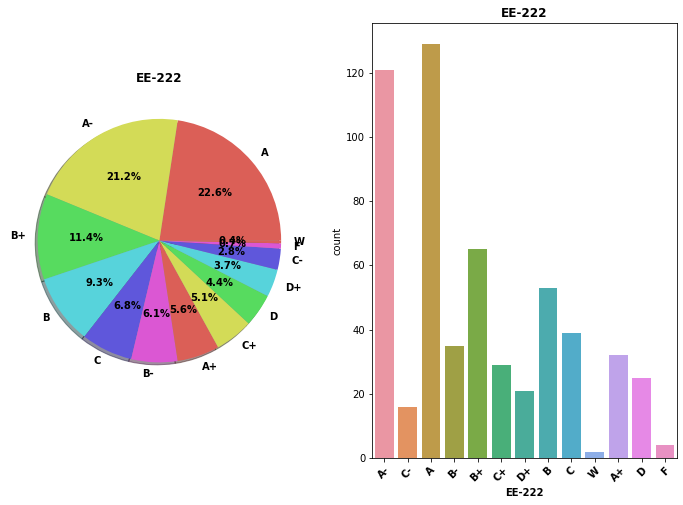

**Observations for subject EE-222 :**

No. of students with A grade are: 129
No. of students with A- grade are: 121
No. of students with B+ grade are: 65
No. of students with B grade are: 53
No. of students with C grade are: 39
No. of students with B- grade are: 35
No. of students with A+ grade are: 32
No. of students with C+ grade are: 29
No. of students with D grade are: 25
No. of students with D+ grade are: 21
No. of students with C- grade are: 16
No. of students with F grade are: 4
No. of students with W grade are: 2


% of students with A grade are: 22.6%
% of students with A- grade are: 21.2%
% of students with B+ grade are: 11.4%
% of students with B grade are: 9.3%
% of students with C grade are: 6.8%
% of students with B- grade are: 6.1%
% of students with A+ grade are: 5.6%
% of students with C+ grade are: 5.1%
% of students with D grade are: 4.4%
% of students with D+ grade are: 3.7%
% of students with C- grade are: 2.8%
% of students with F grade are: 0.7%
% of students with W grade are: 0.4%




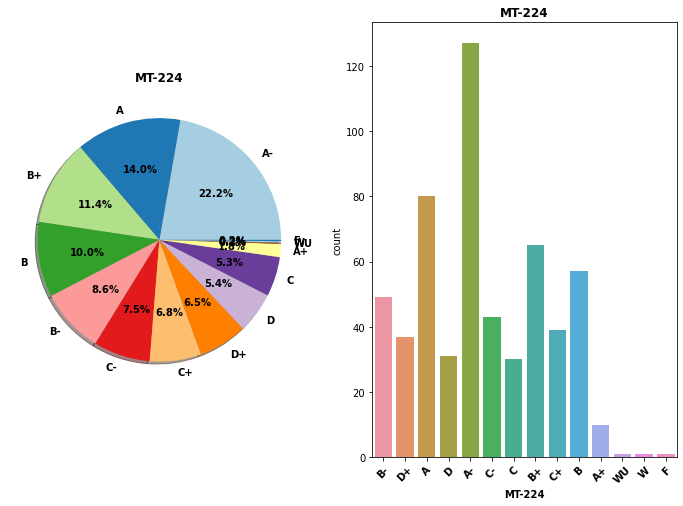

**Observations for subject MT-224 :**

No. of students with A- grade are: 127
No. of students with A grade are: 80
No. of students with B+ grade are: 65
No. of students with B grade are: 57
No. of students with B- grade are: 49
No. of students with C- grade are: 43
No. of students with C+ grade are: 39
No. of students with D+ grade are: 37
No. of students with D grade are: 31
No. of students with C grade are: 30
No. of students with A+ grade are: 10
No. of students with WU grade are: 1
No. of students with W grade are: 1
No. of students with F grade are: 1


% of students with A- grade are: 22.2%
% of students with A grade are: 14.0%
% of students with B+ grade are: 11.4%
% of students with B grade are: 10.0%
% of students with B- grade are: 8.6%
% of students with C- grade are: 7.5%
% of students with C+ grade are: 6.8%
% of students with D+ grade are: 6.5%
% of students with D grade are: 5.4%
% of students with C grade are: 5.3%
% of students with A+ grade are: 1.8%
% of students with WU grade are: 0.2%
% of students with

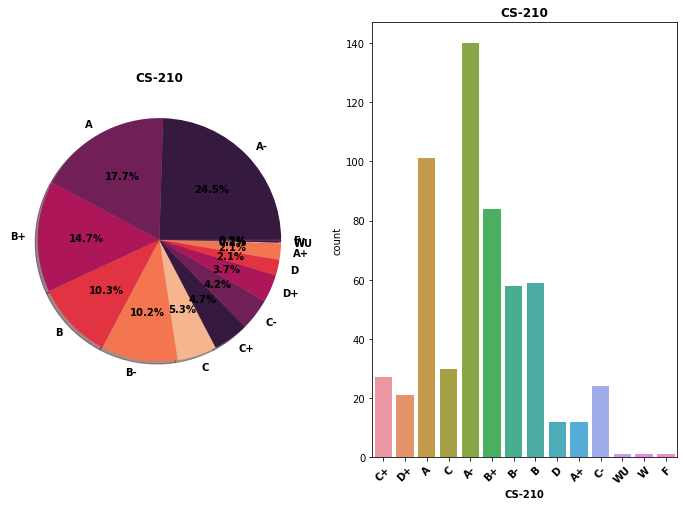

**Observations for subject CS-210 :**

No. of students with A- grade are: 140
No. of students with A grade are: 101
No. of students with B+ grade are: 84
No. of students with B grade are: 59
No. of students with B- grade are: 58
No. of students with C grade are: 30
No. of students with C+ grade are: 27
No. of students with C- grade are: 24
No. of students with D+ grade are: 21
No. of students with D grade are: 12
No. of students with A+ grade are: 12
No. of students with WU grade are: 1
No. of students with W grade are: 1
No. of students with F grade are: 1


% of students with A- grade are: 24.5%
% of students with A grade are: 17.7%
% of students with B+ grade are: 14.7%
% of students with B grade are: 10.3%
% of students with B- grade are: 10.2%
% of students with C grade are: 5.3%
% of students with C+ grade are: 4.7%
% of students with C- grade are: 4.2%
% of students with D+ grade are: 3.7%
% of students with D grade are: 2.1%
% of students with A+ grade are: 2.1%
% of students with WU grade are: 0.2%
% of students wi

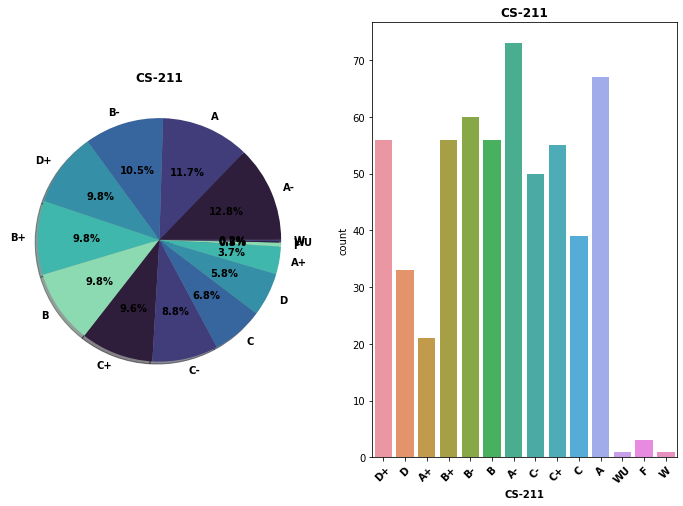

**Observations for subject CS-211 :**

No. of students with A- grade are: 73
No. of students with A grade are: 67
No. of students with B- grade are: 60
No. of students with D+ grade are: 56
No. of students with B+ grade are: 56
No. of students with B grade are: 56
No. of students with C+ grade are: 55
No. of students with C- grade are: 50
No. of students with C grade are: 39
No. of students with D grade are: 33
No. of students with A+ grade are: 21
No. of students with F grade are: 3
No. of students with WU grade are: 1
No. of students with W grade are: 1


% of students with A- grade are: 12.8%
% of students with A grade are: 11.7%
% of students with B- grade are: 10.5%
% of students with D+ grade are: 9.8%
% of students with B+ grade are: 9.8%
% of students with B grade are: 9.8%
% of students with C+ grade are: 9.6%
% of students with C- grade are: 8.8%
% of students with C grade are: 6.8%
% of students with D grade are: 5.8%
% of students with A+ grade are: 3.7%
% of students with F grade are: 0.5%
% of students with WU

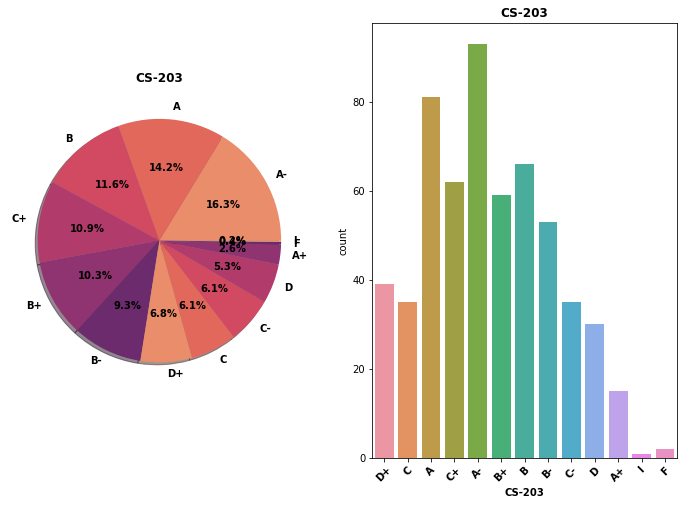

**Observations for subject CS-203 :**

No. of students with A- grade are: 93
No. of students with A grade are: 81
No. of students with B grade are: 66
No. of students with C+ grade are: 62
No. of students with B+ grade are: 59
No. of students with B- grade are: 53
No. of students with D+ grade are: 39
No. of students with C grade are: 35
No. of students with C- grade are: 35
No. of students with D grade are: 30
No. of students with A+ grade are: 15
No. of students with F grade are: 2
No. of students with I grade are: 1


% of students with A- grade are: 16.3%
% of students with A grade are: 14.2%
% of students with B grade are: 11.6%
% of students with C+ grade are: 10.9%
% of students with B+ grade are: 10.3%
% of students with B- grade are: 9.3%
% of students with D+ grade are: 6.8%
% of students with C grade are: 6.1%
% of students with C- grade are: 6.1%
% of students with D grade are: 5.3%
% of students with A+ grade are: 2.6%
% of students with F grade are: 0.4%
% of students with I grade are: 0.2%




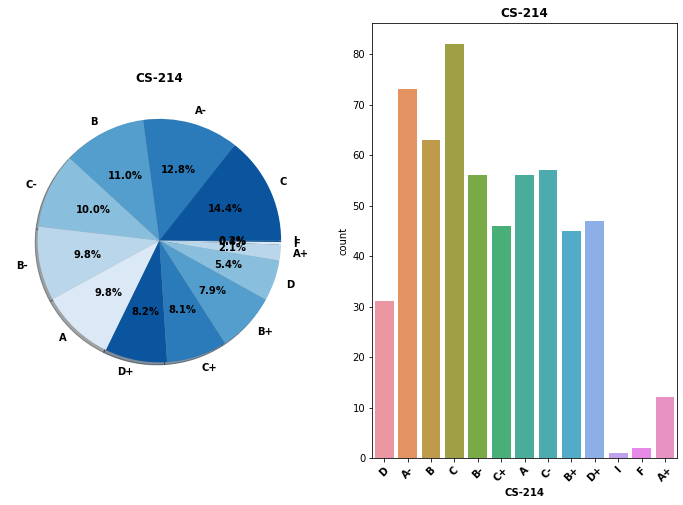

**Observations for subject CS-214 :**

No. of students with C grade are: 82
No. of students with A- grade are: 73
No. of students with B grade are: 63
No. of students with C- grade are: 57
No. of students with B- grade are: 56
No. of students with A grade are: 56
No. of students with D+ grade are: 47
No. of students with C+ grade are: 46
No. of students with B+ grade are: 45
No. of students with D grade are: 31
No. of students with A+ grade are: 12
No. of students with F grade are: 2
No. of students with I grade are: 1


% of students with C grade are: 14.4%
% of students with A- grade are: 12.8%
% of students with B grade are: 11.0%
% of students with C- grade are: 10.0%
% of students with B- grade are: 9.8%
% of students with A grade are: 9.8%
% of students with D+ grade are: 8.2%
% of students with C+ grade are: 8.1%
% of students with B+ grade are: 7.9%
% of students with D grade are: 5.4%
% of students with A+ grade are: 2.1%
% of students with F grade are: 0.4%
% of students with I grade are: 0.2%




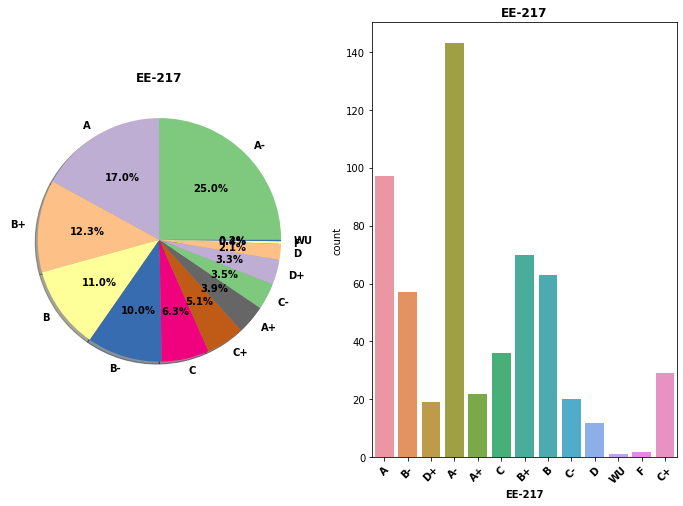

**Observations for subject EE-217 :**

No. of students with A- grade are: 143
No. of students with A grade are: 97
No. of students with B+ grade are: 70
No. of students with B grade are: 63
No. of students with B- grade are: 57
No. of students with C grade are: 36
No. of students with C+ grade are: 29
No. of students with A+ grade are: 22
No. of students with C- grade are: 20
No. of students with D+ grade are: 19
No. of students with D grade are: 12
No. of students with F grade are: 2
No. of students with WU grade are: 1


% of students with A- grade are: 25.0%
% of students with A grade are: 17.0%
% of students with B+ grade are: 12.3%
% of students with B grade are: 11.0%
% of students with B- grade are: 10.0%
% of students with C grade are: 6.3%
% of students with C+ grade are: 5.1%
% of students with A+ grade are: 3.9%
% of students with C- grade are: 3.5%
% of students with D+ grade are: 3.3%
% of students with D grade are: 2.1%
% of students with F grade are: 0.4%
% of students with WU grade are: 0.2%




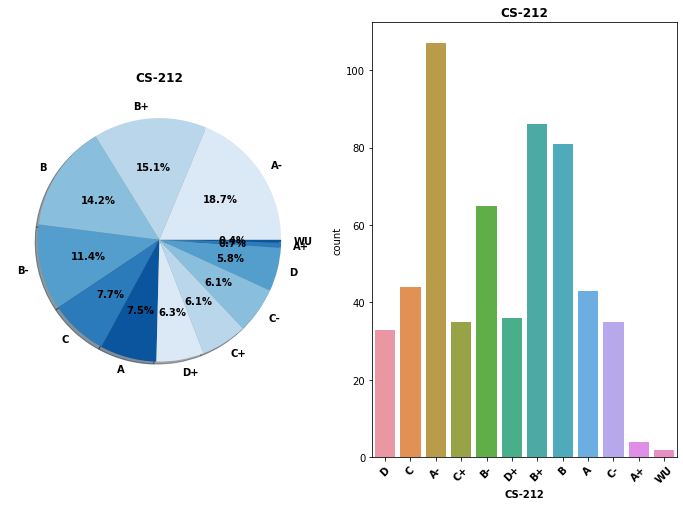

**Observations for subject CS-212 :**

No. of students with A- grade are: 107
No. of students with B+ grade are: 86
No. of students with B grade are: 81
No. of students with B- grade are: 65
No. of students with C grade are: 44
No. of students with A grade are: 43
No. of students with D+ grade are: 36
No. of students with C+ grade are: 35
No. of students with C- grade are: 35
No. of students with D grade are: 33
No. of students with A+ grade are: 4
No. of students with WU grade are: 2


% of students with A- grade are: 18.7%
% of students with B+ grade are: 15.1%
% of students with B grade are: 14.2%
% of students with B- grade are: 11.4%
% of students with C grade are: 7.7%
% of students with A grade are: 7.5%
% of students with D+ grade are: 6.3%
% of students with C+ grade are: 6.1%
% of students with C- grade are: 6.1%
% of students with D grade are: 5.8%
% of students with A+ grade are: 0.7%
% of students with WU grade are: 0.4%




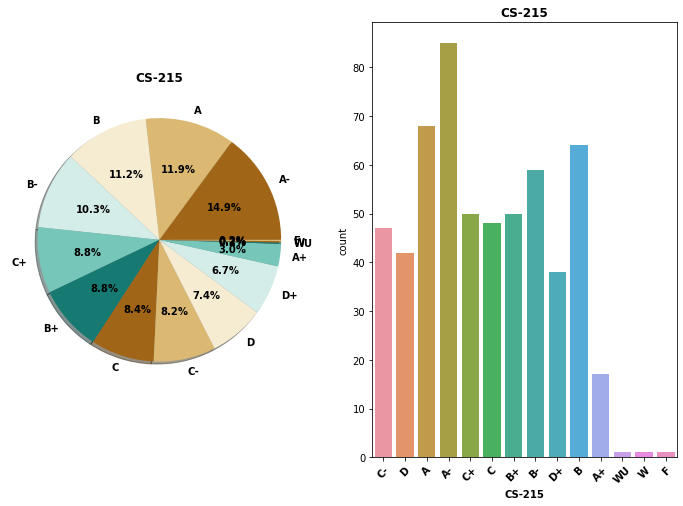

**Observations for subject CS-215 :**

No. of students with A- grade are: 85
No. of students with A grade are: 68
No. of students with B grade are: 64
No. of students with B- grade are: 59
No. of students with C+ grade are: 50
No. of students with B+ grade are: 50
No. of students with C grade are: 48
No. of students with C- grade are: 47
No. of students with D grade are: 42
No. of students with D+ grade are: 38
No. of students with A+ grade are: 17
No. of students with WU grade are: 1
No. of students with W grade are: 1
No. of students with F grade are: 1


% of students with A- grade are: 14.9%
% of students with A grade are: 11.9%
% of students with B grade are: 11.2%
% of students with B- grade are: 10.3%
% of students with C+ grade are: 8.8%
% of students with B+ grade are: 8.8%
% of students with C grade are: 8.4%
% of students with C- grade are: 8.2%
% of students with D grade are: 7.4%
% of students with D+ grade are: 6.7%
% of students with A+ grade are: 3.0%
% of students with WU grade are: 0.2%
% of students with 

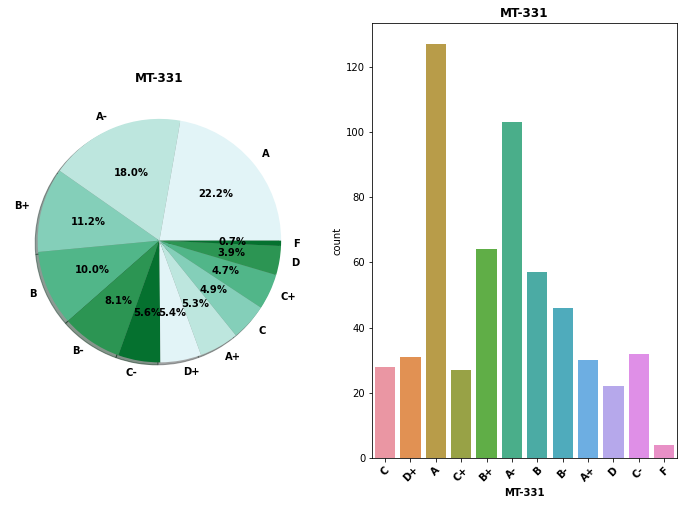

**Observations for subject MT-331 :**

No. of students with A grade are: 127
No. of students with A- grade are: 103
No. of students with B+ grade are: 64
No. of students with B grade are: 57
No. of students with B- grade are: 46
No. of students with C- grade are: 32
No. of students with D+ grade are: 31
No. of students with A+ grade are: 30
No. of students with C grade are: 28
No. of students with C+ grade are: 27
No. of students with D grade are: 22
No. of students with F grade are: 4


% of students with A grade are: 22.2%
% of students with A- grade are: 18.0%
% of students with B+ grade are: 11.2%
% of students with B grade are: 10.0%
% of students with B- grade are: 8.1%
% of students with C- grade are: 5.6%
% of students with D+ grade are: 5.4%
% of students with A+ grade are: 5.3%
% of students with C grade are: 4.9%
% of students with C+ grade are: 4.7%
% of students with D grade are: 3.9%
% of students with F grade are: 0.7%




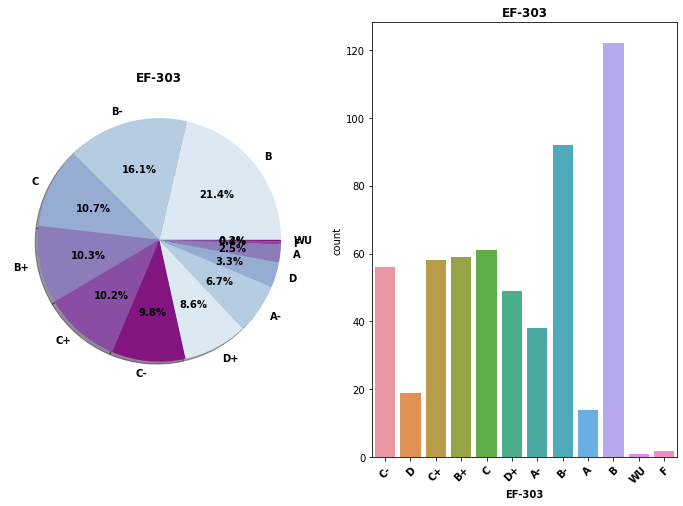

**Observations for subject EF-303 :**

No. of students with B grade are: 122
No. of students with B- grade are: 92
No. of students with C grade are: 61
No. of students with B+ grade are: 59
No. of students with C+ grade are: 58
No. of students with C- grade are: 56
No. of students with D+ grade are: 49
No. of students with A- grade are: 38
No. of students with D grade are: 19
No. of students with A grade are: 14
No. of students with F grade are: 2
No. of students with WU grade are: 1


% of students with B grade are: 21.4%
% of students with B- grade are: 16.1%
% of students with C grade are: 10.7%
% of students with B+ grade are: 10.3%
% of students with C+ grade are: 10.2%
% of students with C- grade are: 9.8%
% of students with D+ grade are: 8.6%
% of students with A- grade are: 6.7%
% of students with D grade are: 3.3%
% of students with A grade are: 2.5%
% of students with F grade are: 0.4%
% of students with WU grade are: 0.2%




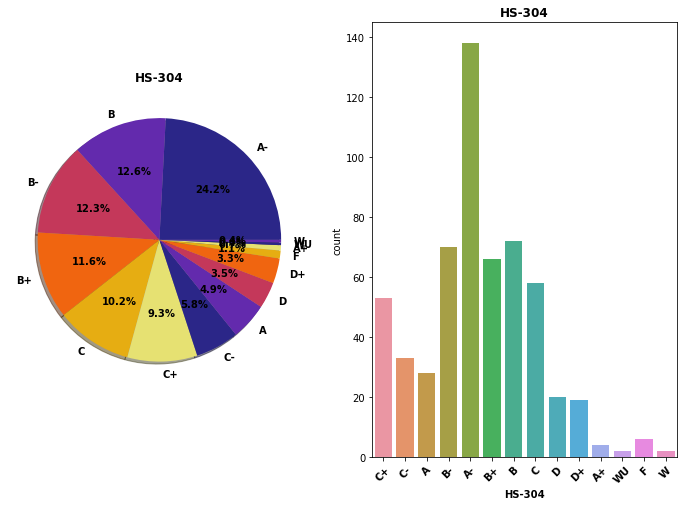

**Observations for subject HS-304 :**

No. of students with A- grade are: 138
No. of students with B grade are: 72
No. of students with B- grade are: 70
No. of students with B+ grade are: 66
No. of students with C grade are: 58
No. of students with C+ grade are: 53
No. of students with C- grade are: 33
No. of students with A grade are: 28
No. of students with D grade are: 20
No. of students with D+ grade are: 19
No. of students with F grade are: 6
No. of students with A+ grade are: 4
No. of students with WU grade are: 2
No. of students with W grade are: 2


% of students with A- grade are: 24.2%
% of students with B grade are: 12.6%
% of students with B- grade are: 12.3%
% of students with B+ grade are: 11.6%
% of students with C grade are: 10.2%
% of students with C+ grade are: 9.3%
% of students with C- grade are: 5.8%
% of students with A grade are: 4.9%
% of students with D grade are: 3.5%
% of students with D+ grade are: 3.3%
% of students with F grade are: 1.1%
% of students with A+ grade are: 0.7%
% of students with 

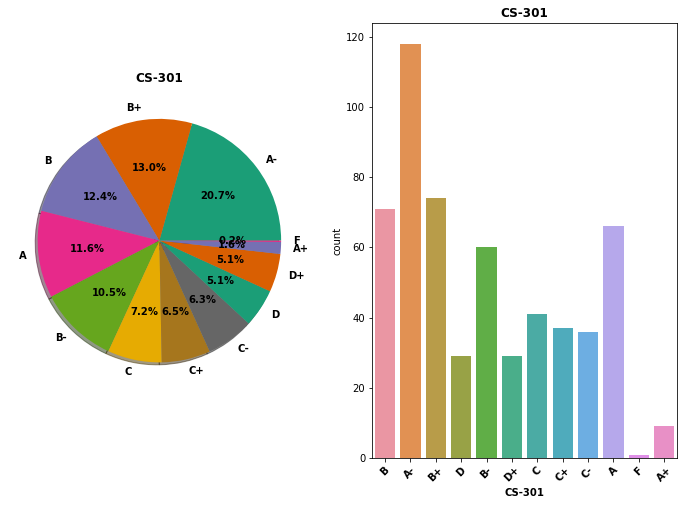

**Observations for subject CS-301 :**

No. of students with A- grade are: 118
No. of students with B+ grade are: 74
No. of students with B grade are: 71
No. of students with A grade are: 66
No. of students with B- grade are: 60
No. of students with C grade are: 41
No. of students with C+ grade are: 37
No. of students with C- grade are: 36
No. of students with D grade are: 29
No. of students with D+ grade are: 29
No. of students with A+ grade are: 9
No. of students with F grade are: 1


% of students with A- grade are: 20.7%
% of students with B+ grade are: 13.0%
% of students with B grade are: 12.4%
% of students with A grade are: 11.6%
% of students with B- grade are: 10.5%
% of students with C grade are: 7.2%
% of students with C+ grade are: 6.5%
% of students with C- grade are: 6.3%
% of students with D grade are: 5.1%
% of students with D+ grade are: 5.1%
% of students with A+ grade are: 1.6%
% of students with F grade are: 0.2%




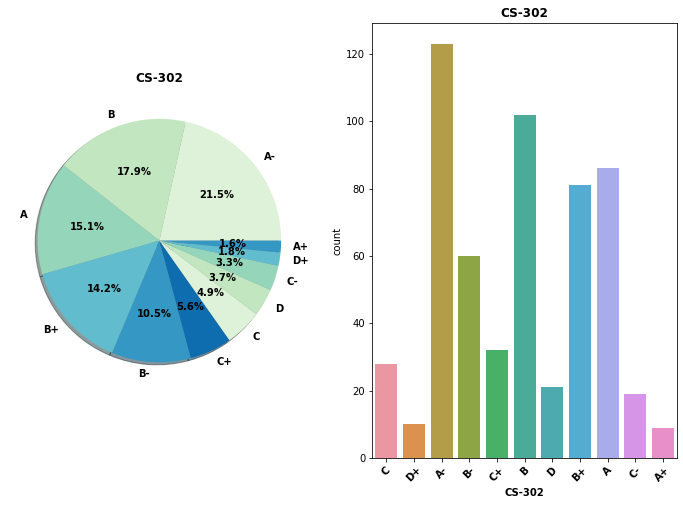

**Observations for subject CS-302 :**

No. of students with A- grade are: 123
No. of students with B grade are: 102
No. of students with A grade are: 86
No. of students with B+ grade are: 81
No. of students with B- grade are: 60
No. of students with C+ grade are: 32
No. of students with C grade are: 28
No. of students with D grade are: 21
No. of students with C- grade are: 19
No. of students with D+ grade are: 10
No. of students with A+ grade are: 9


% of students with A- grade are: 21.5%
% of students with B grade are: 17.9%
% of students with A grade are: 15.1%
% of students with B+ grade are: 14.2%
% of students with B- grade are: 10.5%
% of students with C+ grade are: 5.6%
% of students with C grade are: 4.9%
% of students with D grade are: 3.7%
% of students with C- grade are: 3.3%
% of students with D+ grade are: 1.8%
% of students with A+ grade are: 1.6%




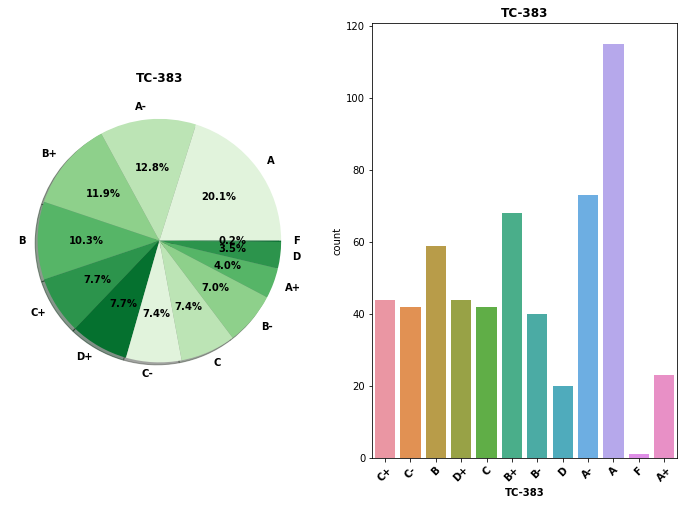

**Observations for subject TC-383 :**

No. of students with A grade are: 115
No. of students with A- grade are: 73
No. of students with B+ grade are: 68
No. of students with B grade are: 59
No. of students with C+ grade are: 44
No. of students with D+ grade are: 44
No. of students with C- grade are: 42
No. of students with C grade are: 42
No. of students with B- grade are: 40
No. of students with A+ grade are: 23
No. of students with D grade are: 20
No. of students with F grade are: 1


% of students with A grade are: 20.1%
% of students with A- grade are: 12.8%
% of students with B+ grade are: 11.9%
% of students with B grade are: 10.3%
% of students with C+ grade are: 7.7%
% of students with D+ grade are: 7.7%
% of students with C- grade are: 7.4%
% of students with C grade are: 7.4%
% of students with B- grade are: 7.0%
% of students with A+ grade are: 4.0%
% of students with D grade are: 3.5%
% of students with F grade are: 0.2%




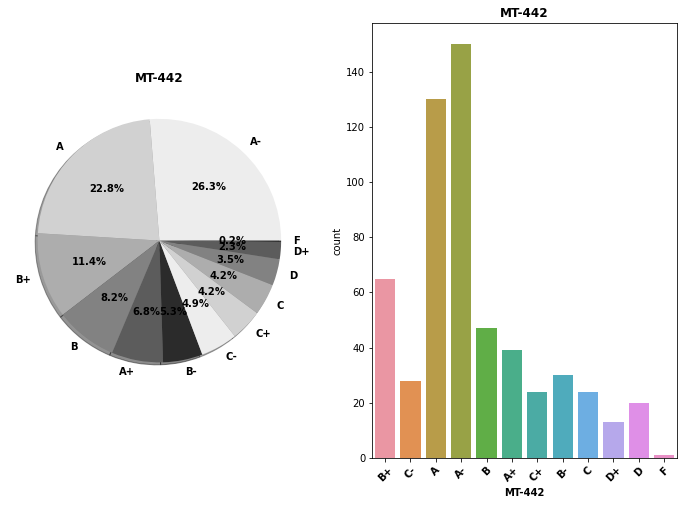

**Observations for subject MT-442 :**

No. of students with A- grade are: 150
No. of students with A grade are: 130
No. of students with B+ grade are: 65
No. of students with B grade are: 47
No. of students with A+ grade are: 39
No. of students with B- grade are: 30
No. of students with C- grade are: 28
No. of students with C+ grade are: 24
No. of students with C grade are: 24
No. of students with D grade are: 20
No. of students with D+ grade are: 13
No. of students with F grade are: 1


% of students with A- grade are: 26.3%
% of students with A grade are: 22.8%
% of students with B+ grade are: 11.4%
% of students with B grade are: 8.2%
% of students with A+ grade are: 6.8%
% of students with B- grade are: 5.3%
% of students with C- grade are: 4.9%
% of students with C+ grade are: 4.2%
% of students with C grade are: 4.2%
% of students with D grade are: 3.5%
% of students with D+ grade are: 2.3%
% of students with F grade are: 0.2%




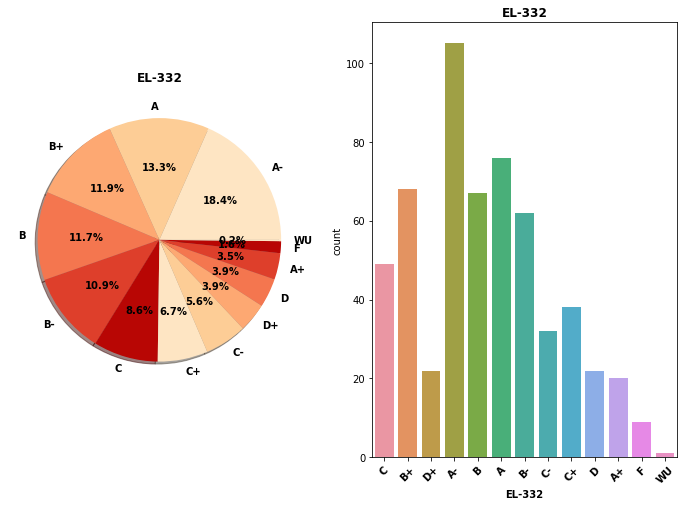

**Observations for subject EL-332 :**

No. of students with A- grade are: 105
No. of students with A grade are: 76
No. of students with B+ grade are: 68
No. of students with B grade are: 67
No. of students with B- grade are: 62
No. of students with C grade are: 49
No. of students with C+ grade are: 38
No. of students with C- grade are: 32
No. of students with D+ grade are: 22
No. of students with D grade are: 22
No. of students with A+ grade are: 20
No. of students with F grade are: 9
No. of students with WU grade are: 1


% of students with A- grade are: 18.4%
% of students with A grade are: 13.3%
% of students with B+ grade are: 11.9%
% of students with B grade are: 11.7%
% of students with B- grade are: 10.9%
% of students with C grade are: 8.6%
% of students with C+ grade are: 6.7%
% of students with C- grade are: 5.6%
% of students with D+ grade are: 3.9%
% of students with D grade are: 3.9%
% of students with A+ grade are: 3.5%
% of students with F grade are: 1.6%
% of students with WU grade are: 0.2%




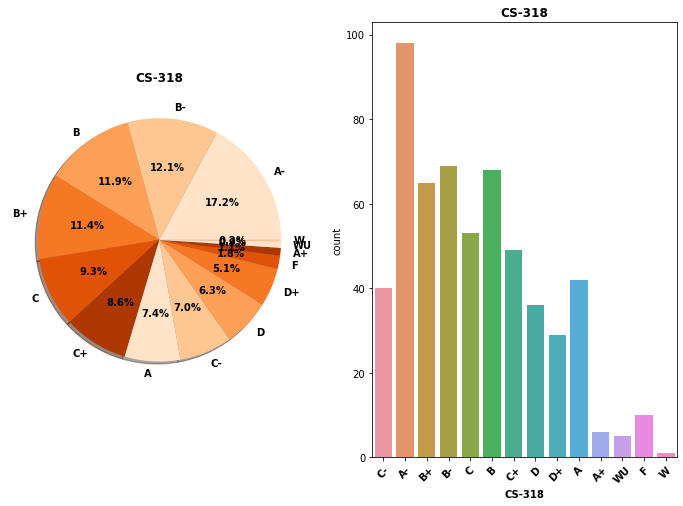

**Observations for subject CS-318 :**

No. of students with A- grade are: 98
No. of students with B- grade are: 69
No. of students with B grade are: 68
No. of students with B+ grade are: 65
No. of students with C grade are: 53
No. of students with C+ grade are: 49
No. of students with A grade are: 42
No. of students with C- grade are: 40
No. of students with D grade are: 36
No. of students with D+ grade are: 29
No. of students with F grade are: 10
No. of students with A+ grade are: 6
No. of students with WU grade are: 5
No. of students with W grade are: 1


% of students with A- grade are: 17.2%
% of students with B- grade are: 12.1%
% of students with B grade are: 11.9%
% of students with B+ grade are: 11.4%
% of students with C grade are: 9.3%
% of students with C+ grade are: 8.6%
% of students with A grade are: 7.4%
% of students with C- grade are: 7.0%
% of students with D grade are: 6.3%
% of students with D+ grade are: 5.1%
% of students with F grade are: 1.8%
% of students with A+ grade are: 1.1%
% of students with W

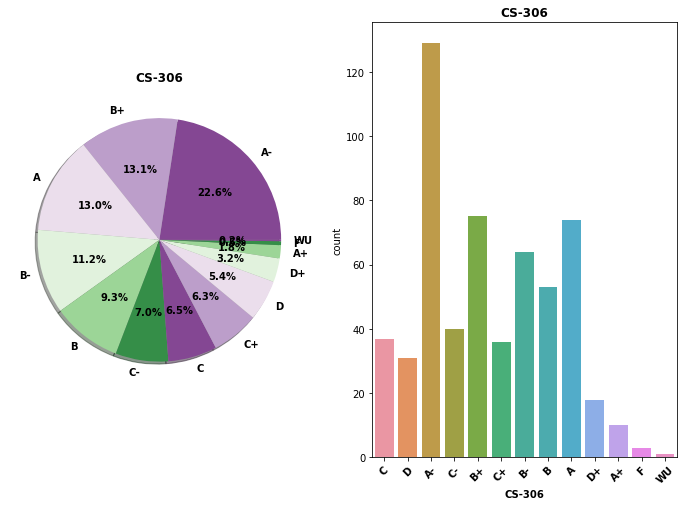

**Observations for subject CS-306 :**

No. of students with A- grade are: 129
No. of students with B+ grade are: 75
No. of students with A grade are: 74
No. of students with B- grade are: 64
No. of students with B grade are: 53
No. of students with C- grade are: 40
No. of students with C grade are: 37
No. of students with C+ grade are: 36
No. of students with D grade are: 31
No. of students with D+ grade are: 18
No. of students with A+ grade are: 10
No. of students with F grade are: 3
No. of students with WU grade are: 1


% of students with A- grade are: 22.6%
% of students with B+ grade are: 13.1%
% of students with A grade are: 13.0%
% of students with B- grade are: 11.2%
% of students with B grade are: 9.3%
% of students with C- grade are: 7.0%
% of students with C grade are: 6.5%
% of students with C+ grade are: 6.3%
% of students with D grade are: 5.4%
% of students with D+ grade are: 3.2%
% of students with A+ grade are: 1.8%
% of students with F grade are: 0.5%
% of students with WU grade are: 0.2%




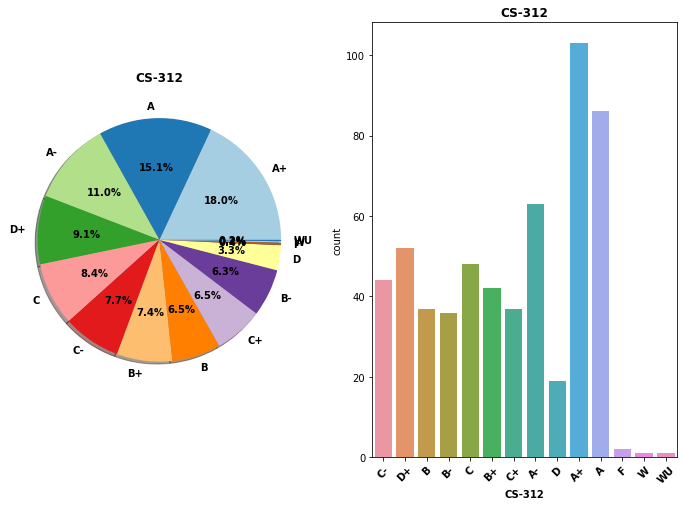

**Observations for subject CS-312 :**

No. of students with A+ grade are: 103
No. of students with A grade are: 86
No. of students with A- grade are: 63
No. of students with D+ grade are: 52
No. of students with C grade are: 48
No. of students with C- grade are: 44
No. of students with B+ grade are: 42
No. of students with B grade are: 37
No. of students with C+ grade are: 37
No. of students with B- grade are: 36
No. of students with D grade are: 19
No. of students with F grade are: 2
No. of students with W grade are: 1
No. of students with WU grade are: 1


% of students with A+ grade are: 18.0%
% of students with A grade are: 15.1%
% of students with A- grade are: 11.0%
% of students with D+ grade are: 9.1%
% of students with C grade are: 8.4%
% of students with C- grade are: 7.7%
% of students with B+ grade are: 7.4%
% of students with B grade are: 6.5%
% of students with C+ grade are: 6.5%
% of students with B- grade are: 6.3%
% of students with D grade are: 3.3%
% of students with F grade are: 0.4%
% of students with W

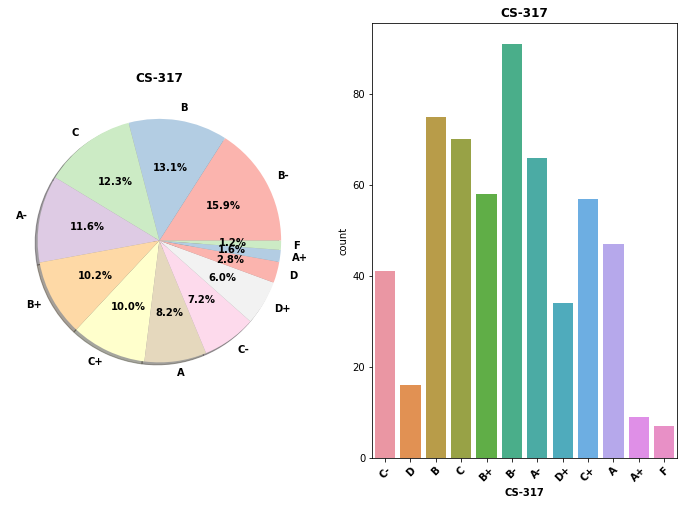

**Observations for subject CS-317 :**

No. of students with B- grade are: 91
No. of students with B grade are: 75
No. of students with C grade are: 70
No. of students with A- grade are: 66
No. of students with B+ grade are: 58
No. of students with C+ grade are: 57
No. of students with A grade are: 47
No. of students with C- grade are: 41
No. of students with D+ grade are: 34
No. of students with D grade are: 16
No. of students with A+ grade are: 9
No. of students with F grade are: 7


% of students with B- grade are: 15.9%
% of students with B grade are: 13.1%
% of students with C grade are: 12.3%
% of students with A- grade are: 11.6%
% of students with B+ grade are: 10.2%
% of students with C+ grade are: 10.0%
% of students with A grade are: 8.2%
% of students with C- grade are: 7.2%
% of students with D+ grade are: 6.0%
% of students with D grade are: 2.8%
% of students with A+ grade are: 1.6%
% of students with F grade are: 1.2%




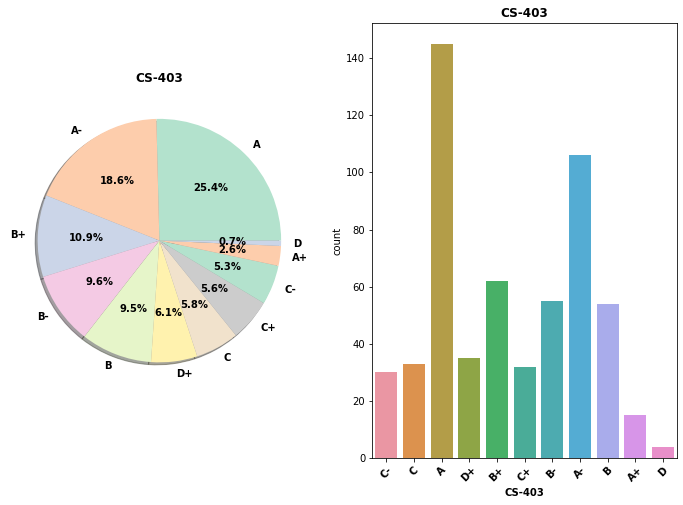

**Observations for subject CS-403 :**

No. of students with A grade are: 145
No. of students with A- grade are: 106
No. of students with B+ grade are: 62
No. of students with B- grade are: 55
No. of students with B grade are: 54
No. of students with D+ grade are: 35
No. of students with C grade are: 33
No. of students with C+ grade are: 32
No. of students with C- grade are: 30
No. of students with A+ grade are: 15
No. of students with D grade are: 4


% of students with A grade are: 25.4%
% of students with A- grade are: 18.6%
% of students with B+ grade are: 10.9%
% of students with B- grade are: 9.6%
% of students with B grade are: 9.5%
% of students with D+ grade are: 6.1%
% of students with C grade are: 5.8%
% of students with C+ grade are: 5.6%
% of students with C- grade are: 5.3%
% of students with A+ grade are: 2.6%
% of students with D grade are: 0.7%




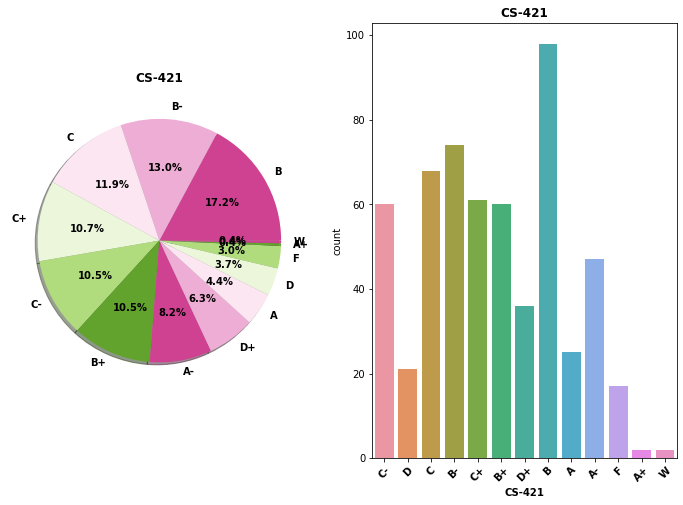

**Observations for subject CS-421 :**

No. of students with B grade are: 98
No. of students with B- grade are: 74
No. of students with C grade are: 68
No. of students with C+ grade are: 61
No. of students with C- grade are: 60
No. of students with B+ grade are: 60
No. of students with A- grade are: 47
No. of students with D+ grade are: 36
No. of students with A grade are: 25
No. of students with D grade are: 21
No. of students with F grade are: 17
No. of students with A+ grade are: 2
No. of students with W grade are: 2


% of students with B grade are: 17.2%
% of students with B- grade are: 13.0%
% of students with C grade are: 11.9%
% of students with C+ grade are: 10.7%
% of students with C- grade are: 10.5%
% of students with B+ grade are: 10.5%
% of students with A- grade are: 8.2%
% of students with D+ grade are: 6.3%
% of students with A grade are: 4.4%
% of students with D grade are: 3.7%
% of students with F grade are: 3.0%
% of students with A+ grade are: 0.4%
% of students with W grade are: 0.4%




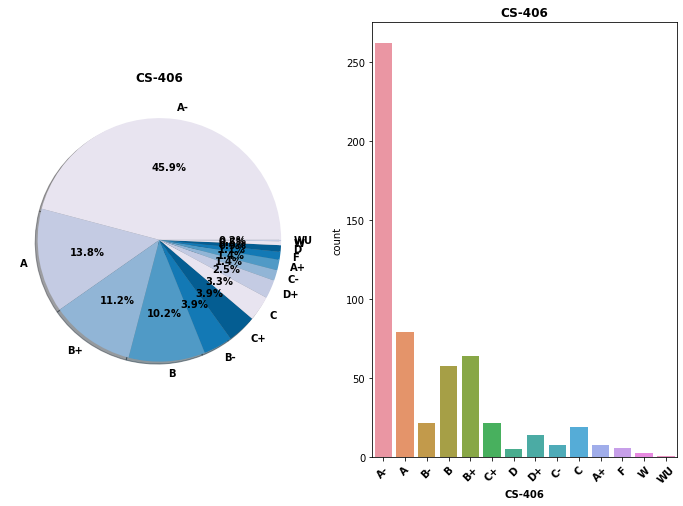

**Observations for subject CS-406 :**

No. of students with A- grade are: 262
No. of students with A grade are: 79
No. of students with B+ grade are: 64
No. of students with B grade are: 58
No. of students with B- grade are: 22
No. of students with C+ grade are: 22
No. of students with C grade are: 19
No. of students with D+ grade are: 14
No. of students with C- grade are: 8
No. of students with A+ grade are: 8
No. of students with F grade are: 6
No. of students with D grade are: 5
No. of students with W grade are: 3
No. of students with WU grade are: 1


% of students with A- grade are: 45.9%
% of students with A grade are: 13.8%
% of students with B+ grade are: 11.2%
% of students with B grade are: 10.2%
% of students with B- grade are: 3.9%
% of students with C+ grade are: 3.9%
% of students with C grade are: 3.3%
% of students with D+ grade are: 2.5%
% of students with C- grade are: 1.4%
% of students with A+ grade are: 1.4%
% of students with F grade are: 1.1%
% of students with D grade are: 0.9%
% of students with W g

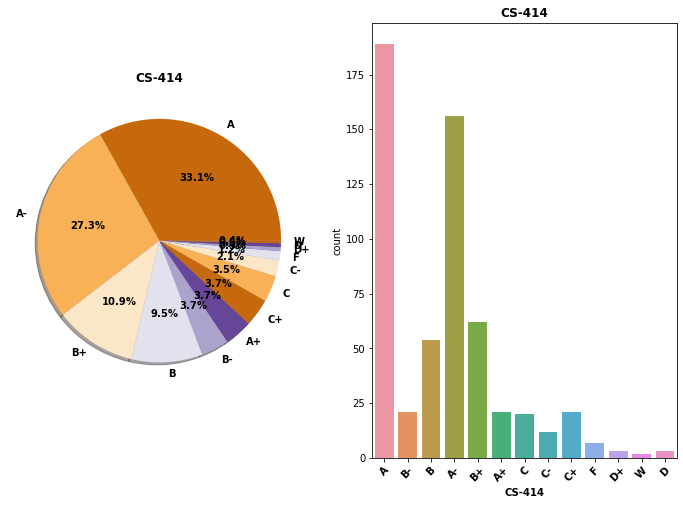

**Observations for subject CS-414 :**

No. of students with A grade are: 189
No. of students with A- grade are: 156
No. of students with B+ grade are: 62
No. of students with B grade are: 54
No. of students with B- grade are: 21
No. of students with A+ grade are: 21
No. of students with C+ grade are: 21
No. of students with C grade are: 20
No. of students with C- grade are: 12
No. of students with F grade are: 7
No. of students with D+ grade are: 3
No. of students with D grade are: 3
No. of students with W grade are: 2


% of students with A grade are: 33.1%
% of students with A- grade are: 27.3%
% of students with B+ grade are: 10.9%
% of students with B grade are: 9.5%
% of students with B- grade are: 3.7%
% of students with A+ grade are: 3.7%
% of students with C+ grade are: 3.7%
% of students with C grade are: 3.5%
% of students with C- grade are: 2.1%
% of students with F grade are: 1.2%
% of students with D+ grade are: 0.5%
% of students with D grade are: 0.5%
% of students with W grade are: 0.4%




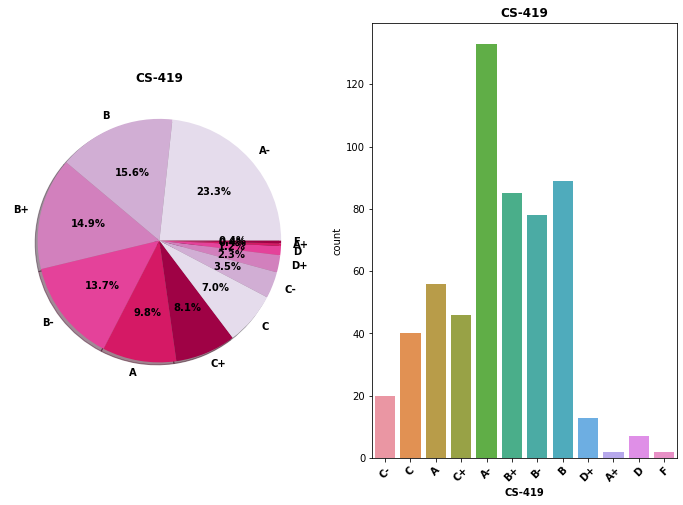

**Observations for subject CS-419 :**

No. of students with A- grade are: 133
No. of students with B grade are: 89
No. of students with B+ grade are: 85
No. of students with B- grade are: 78
No. of students with A grade are: 56
No. of students with C+ grade are: 46
No. of students with C grade are: 40
No. of students with C- grade are: 20
No. of students with D+ grade are: 13
No. of students with D grade are: 7
No. of students with A+ grade are: 2
No. of students with F grade are: 2


% of students with A- grade are: 23.3%
% of students with B grade are: 15.6%
% of students with B+ grade are: 14.9%
% of students with B- grade are: 13.7%
% of students with A grade are: 9.8%
% of students with C+ grade are: 8.1%
% of students with C grade are: 7.0%
% of students with C- grade are: 3.5%
% of students with D+ grade are: 2.3%
% of students with D grade are: 1.2%
% of students with A+ grade are: 0.4%
% of students with F grade are: 0.4%




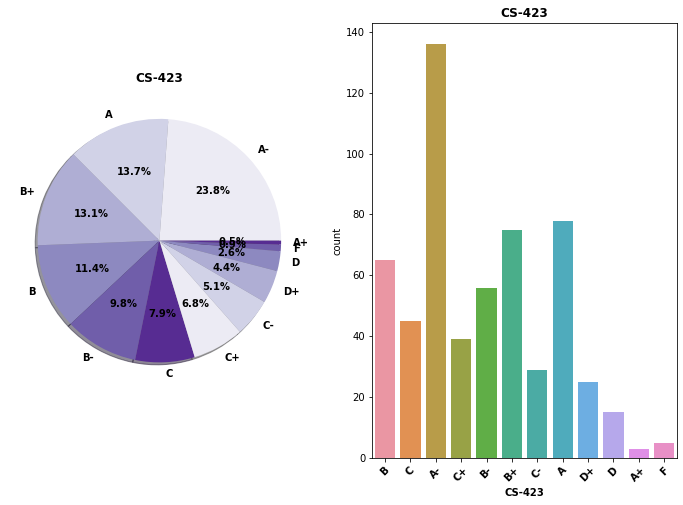

**Observations for subject CS-423 :**

No. of students with A- grade are: 136
No. of students with A grade are: 78
No. of students with B+ grade are: 75
No. of students with B grade are: 65
No. of students with B- grade are: 56
No. of students with C grade are: 45
No. of students with C+ grade are: 39
No. of students with C- grade are: 29
No. of students with D+ grade are: 25
No. of students with D grade are: 15
No. of students with F grade are: 5
No. of students with A+ grade are: 3


% of students with A- grade are: 23.8%
% of students with A grade are: 13.7%
% of students with B+ grade are: 13.1%
% of students with B grade are: 11.4%
% of students with B- grade are: 9.8%
% of students with C grade are: 7.9%
% of students with C+ grade are: 6.8%
% of students with C- grade are: 5.1%
% of students with D+ grade are: 4.4%
% of students with D grade are: 2.6%
% of students with F grade are: 0.9%
% of students with A+ grade are: 0.5%




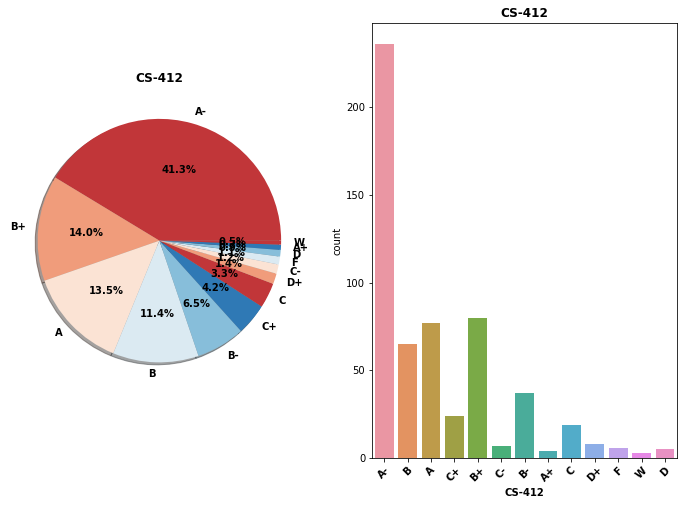

**Observations for subject CS-412 :**

No. of students with A- grade are: 236
No. of students with B+ grade are: 80
No. of students with A grade are: 77
No. of students with B grade are: 65
No. of students with B- grade are: 37
No. of students with C+ grade are: 24
No. of students with C grade are: 19
No. of students with D+ grade are: 8
No. of students with C- grade are: 7
No. of students with F grade are: 6
No. of students with D grade are: 5
No. of students with A+ grade are: 4
No. of students with W grade are: 3


% of students with A- grade are: 41.3%
% of students with B+ grade are: 14.0%
% of students with A grade are: 13.5%
% of students with B grade are: 11.4%
% of students with B- grade are: 6.5%
% of students with C+ grade are: 4.2%
% of students with C grade are: 3.3%
% of students with D+ grade are: 1.4%
% of students with C- grade are: 1.2%
% of students with F grade are: 1.1%
% of students with D grade are: 0.9%
% of students with A+ grade are: 0.7%
% of students with W grade are: 0.5%




In [29]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket','mako','flare','Blues_r','Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap','Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges','PRGn',
        'Paired', 'Pastel1', 'Pastel2', 'PiYG','PuBu', 'PuOr', 'PuRd', 'Purples', 'RdBu','RdGy', 'RdPu', 'RdYlBu', 'RdYlGn',
        'Reds', 'Set1','Set2', 'Set3', 'Spectral', 'Wistia', 'YlGn','YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary','bone',
        'brg', 'bwr', 'cividis', 'cool', 'coolwarm','copper', 'cubehelix', 'flag', 'gist_earth','gist_gray', 'gist_heat', 
        'gist_ncar', 'gist_rainbow','gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray','hot', 'hsv', 'icefire', 
        'inferno', 'jet', 'magma','mako', 'nipy_spectral', 'ocean', 'pink', 'plasma','prism', 'rainbow', 'rocket', 
        'seismic', 'spring','summer', 'tab10', 'tab20','terrain', 'turbo', 'twilight','viridis', 'vlag', 'winter']

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

plotnumber =1
for i in df_categorical.columns[1:42]:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=42:
        f,ax=plt.subplots(1,2,figsize=(12,8))
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                                      textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
        ax[0].set_title(i, fontsize=12,fontweight ='bold')
        ax[0].set_ylabel('')
        sns.countplot(df[i],data=df,ax=ax[1])
        ax[1].set_title(i,fontsize=12,fontweight ='bold')
        ax[1].set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=10,fontweight ='bold',rotation=45)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    printmd("**Observations for subject {} :**".format(i))
    for j in range(length):
        print("No. of students with {} grade are: {}".format(df[i].value_counts().index.values[j],(df[i].value_counts())[j]))
    print("\n")
    for k in range(length):
        print("% of students with {} grade are: {:.1f}%".format(df[i].value_counts().index.values[k],((df[i].value_counts())[k])*100/(df[i].value_counts().sum()))) 
    print("\n")

# Bivariate Graphical Analysis

In [30]:
# Studying the relationship of all features with target variable

<Figure size 864x504 with 0 Axes>

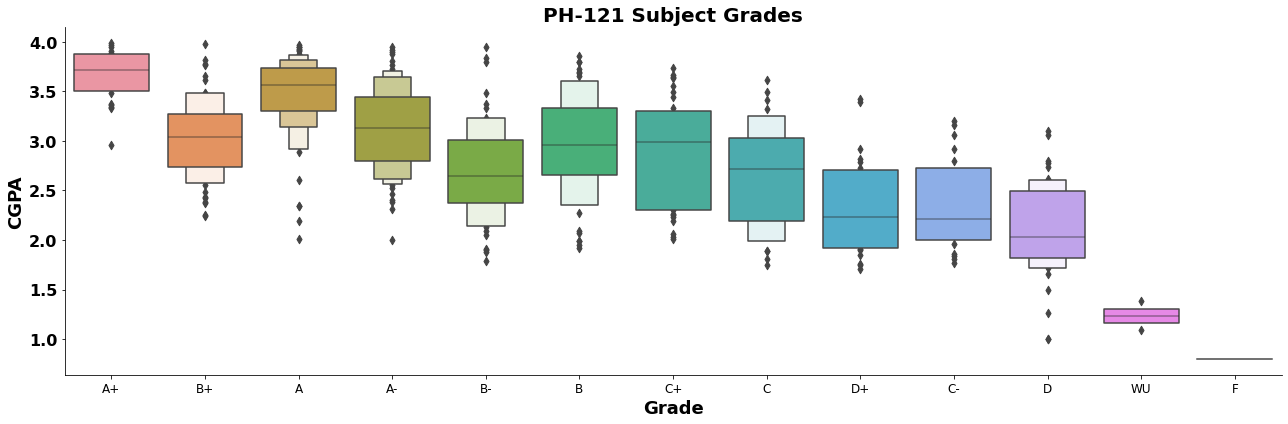

In [31]:
# Studying the relation of 'PH-121' with target variable 'CGPA'
plt.figure(figsize=(12,7))
sns.catplot(x='PH-121',y='CGPA',data= df.sort_values('CGPA',ascending=False),
            kind="boxen",height=6, aspect=3)
plt.title("PH-121 Subject Grades",fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [32]:
# Observations:

# Students who received grades A and A+ in this subject PH-121 received higher CGPA in the range of 3.3 to 4.8

# It is clearly evident that the students who received grade F and WU in this subject received overall lowest CGPA

<Figure size 864x504 with 0 Axes>

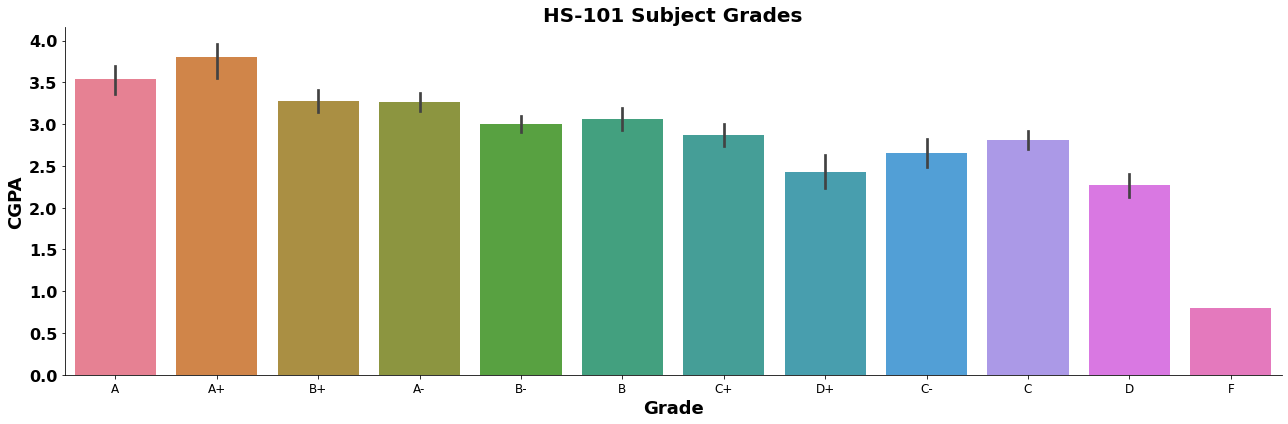

In [33]:
# Studying the relation of 'HS-101' with target variable 'CGPA'
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[2],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="bar",height=6, aspect=3,palette='husl')
plt.title("{} Subject Grades".format(df_categorical.columns[2]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [34]:
# Observations:

# The average CGPA received by the students with A+ grade in HS-101 subject is close to 4

#  i.e. students who received more marks in HS-101 subject received overall highest CGPA along with subject

# Students with F grade in HS-101 subject got overall lowest CGPA

#  i.e. students who received lowest marks in HS-101 subject received overall lowest CGPA along with subject

<Figure size 864x504 with 0 Axes>

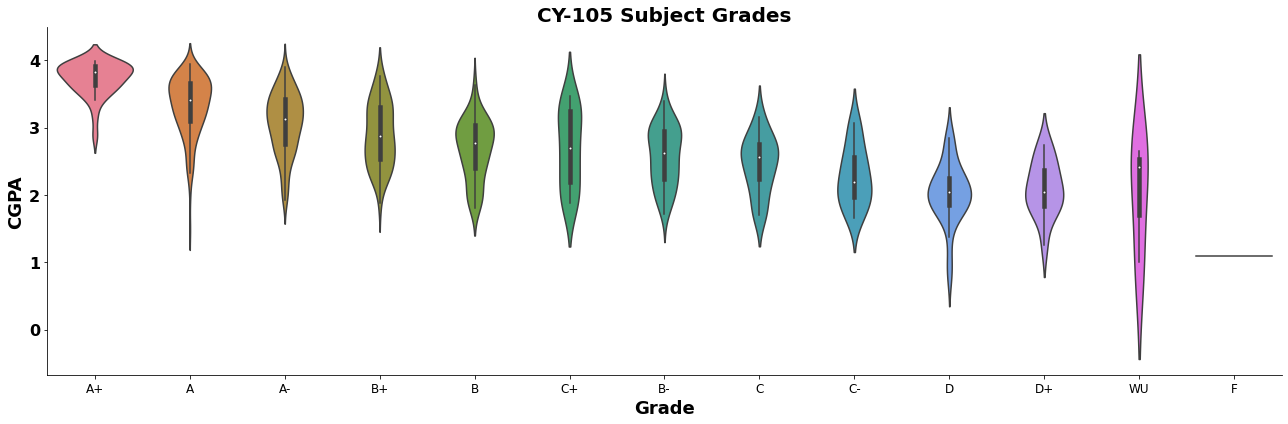

In [35]:
# Studying the relation of 'CY-105' with target variable 'CGPA'
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[3],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="violin",height=6, aspect=3,palette='husl')
plt.title("{} Subject Grades".format(df_categorical.columns[3]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [36]:
# Observations:

# CGPA is high for the students with A+ grade in this subject CY-105

# Overall CGPA is reducing with going in grades from A to F

# Majority of the students received CGPA in the range of 2 to 3

# Intetestingly there are students who received lower grade WU in this subject still received lowest CGPA and higher CGPA as well overall



<Figure size 864x504 with 0 Axes>

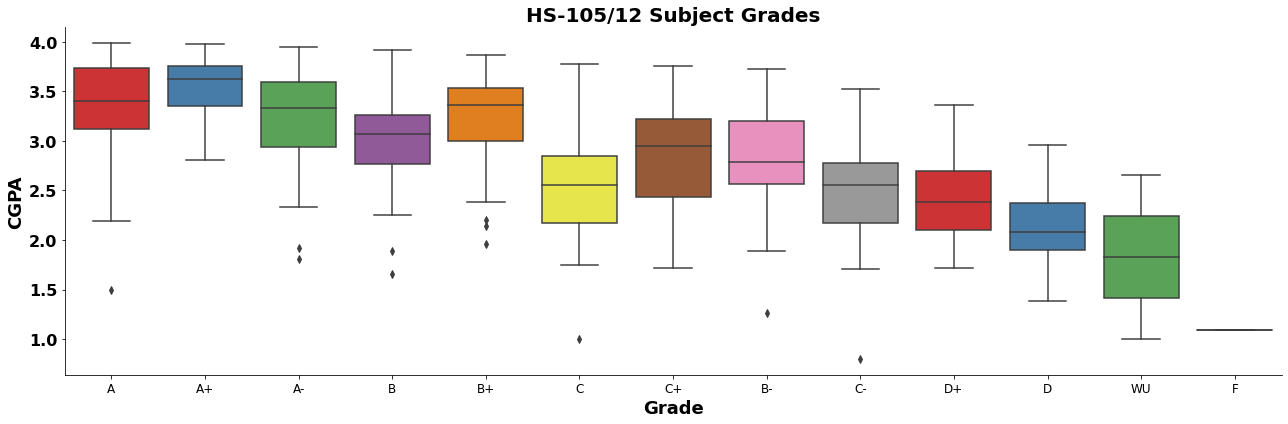

In [37]:
# Studying the relation of 'HS-105/12' with target variable 'CGPA'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[4],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="box",height=6, aspect=3,palette='Set1')
plt.title("{} Subject Grades".format(df_categorical.columns[4]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [38]:
# Observations:

# CGPA is high for the majority of the students with A+ grade in this subject HS-105

# Interestingly there are some students who received lower CGPA overall even with A grade in this subject*

# Overall CGPA is reducing with going in grades from A to F

<Figure size 864x504 with 0 Axes>

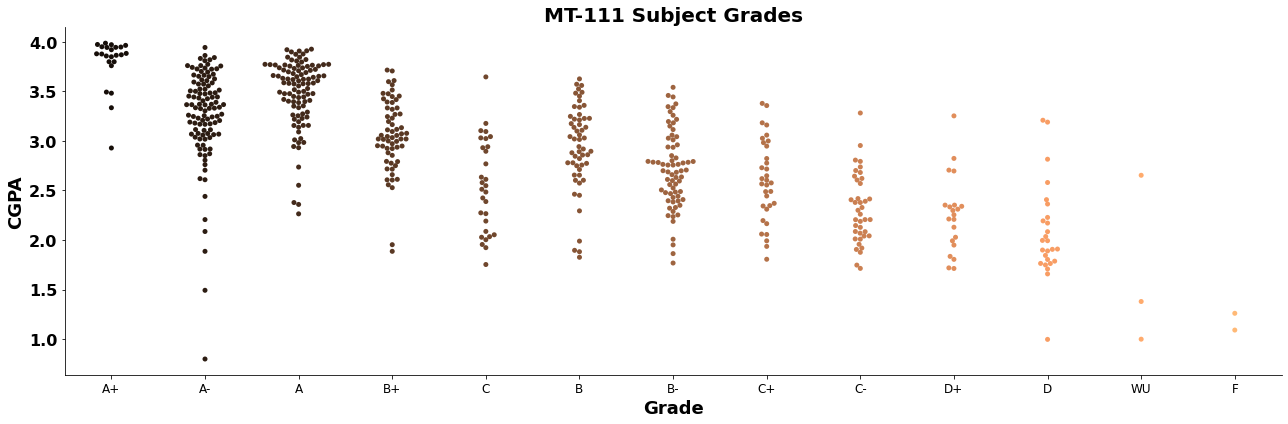

In [39]:
# Studying the relation of 'MT-111' with target variable 'CGPA'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[5],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="swarm",height=6, aspect=3,palette='copper')
plt.title("{} Subject Grades".format(df_categorical.columns[5]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [40]:
# Observations:

# There are many students with A- and A grades in this subject based on the density of the points

# There are few studetns who received A+ grade in this subject

# Majority of the students received grades between A and B

# Overall students with A, A+ and A- grades in this subject received higher CGPA overall

# But interestingly there are still students with grade A- in this subject but received lowest CGPA

<Figure size 864x504 with 0 Axes>

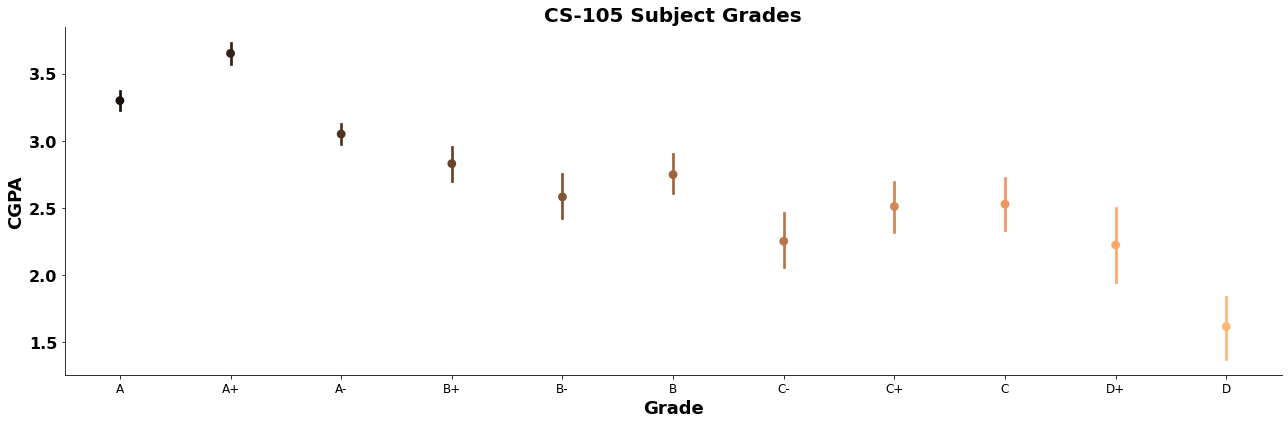

In [41]:
# Studying the relation of 'CS-105' with target variable 'CGPA'
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[6],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="point",height=6, aspect=3,palette='copper')
plt.title("{} Subject Grades".format(df_categorical.columns[6]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [42]:
# Observations:

# Students with A+ grade in this subject received highest CGPA
# A, A+ and A- grades in this subject received overall CGPA in the range of 3 to 3.8
#There is another observation that the most of the students who received A, A+ and A- grades in this subject received overall higher CGPA

<Figure size 864x504 with 0 Axes>

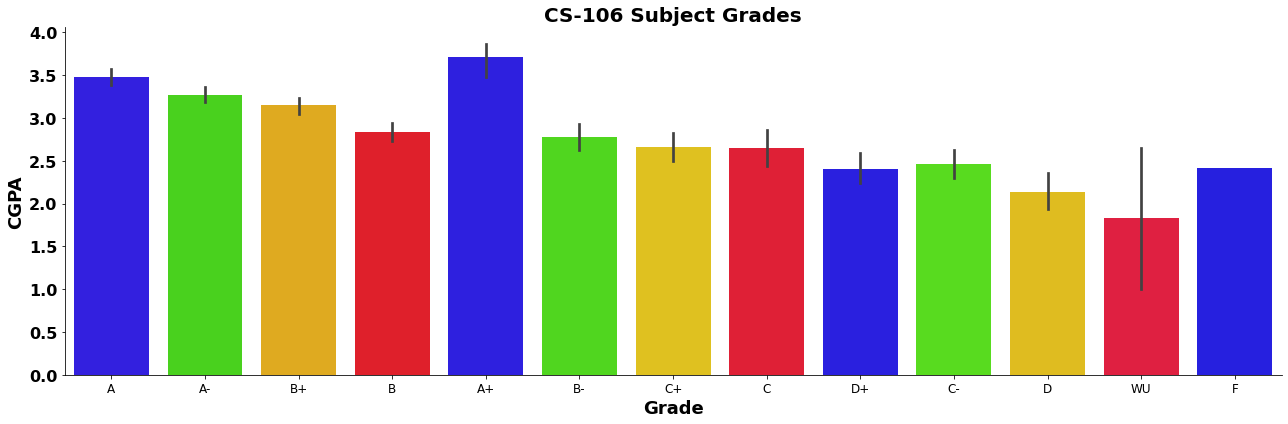

In [43]:
# Studying the relation of 'CS-106' with target variable 'CGPA'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[7],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="bar",height=6, aspect=3,palette='prism')
plt.title("{} Subject Grades".format(df_categorical.columns[7]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [44]:
# Observations:

# The variation in the overall CGPA is small for the students who received grades between B to F in this subject

# Again there is small variation in CGPA for the students who received grades between A and A+ in this subject

# i.e. This variable will have moderate or weak correlation with output variable CGPA

<Figure size 864x504 with 0 Axes>

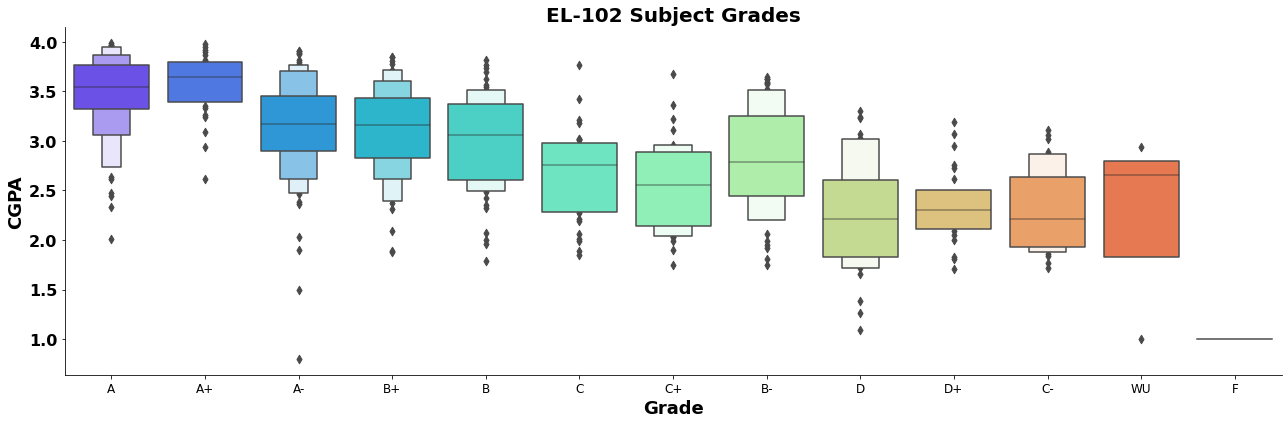

In [45]:
# Studying the relation of 'EL-102' with target variable 'CGPA'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[8],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="boxen",height=6, aspect=3,palette='rainbow')
plt.title("{} Subject Grades".format(df_categorical.columns[8]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [46]:
# Observations:

# The students with A, A+, A-, B+ and B grades in this subject received overall higher CGPA

# Overall CGPA of the students for all the grades in this subject ranges from ~2 to 4

# The variation in CGPA is very small for the grades A-, B+ and B in this subject

# Student with Grade F in this subject received lowest CGPA

<Figure size 864x504 with 0 Axes>

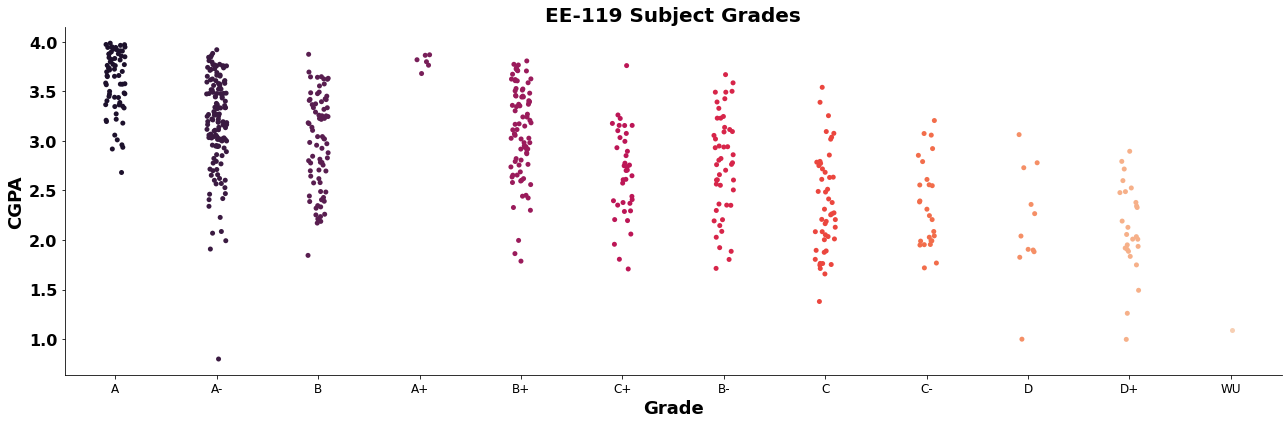

In [47]:
# Studying the relation of 'EE-119' with target variable 'CGPA'


plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[9],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="strip",height=6, aspect=3,palette='rocket')
plt.title("{} Subject Grades".format(df_categorical.columns[9]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [48]:
# Observations:

# There are few students who received A+ grade in this subject however most of them got overall higher CGPA

# Again seems like this subject have lower correlation with CGPA 
# as the most of the students with different grades are falling in the similar CGPA range

<Figure size 864x504 with 0 Axes>

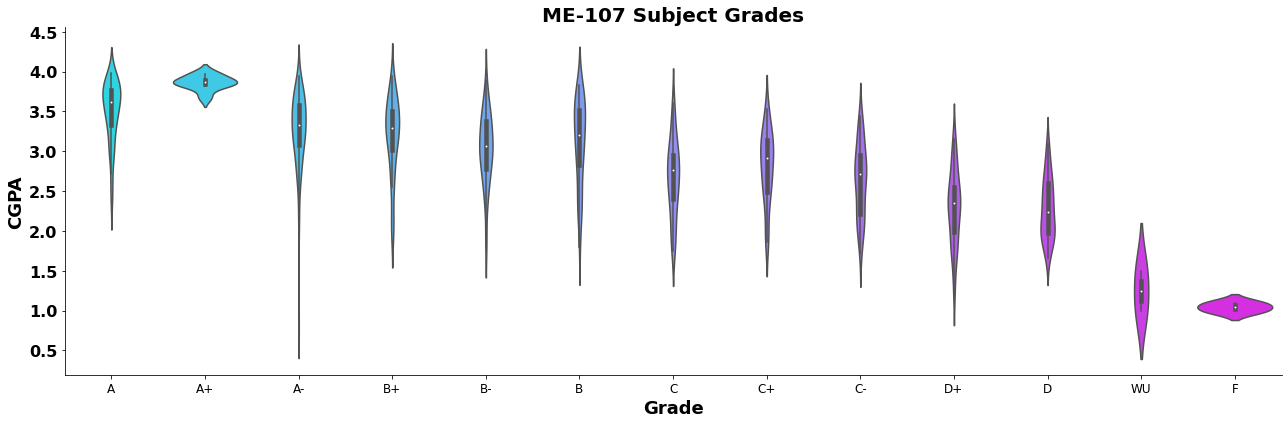

In [49]:
# Studying the relation of 'ME-107' with target variable 'CGPA'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[10],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="violin",height=6, aspect=3,palette='cool')
plt.title("{} Subject Grades".format(df_categorical.columns[10]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [50]:
# Observations:

# Most of the students with A+ grades received highest CGPA

# There are student with A- grade in this subject but still received lowest CGPA

# Majority of the student with grades between A and C falling in the CGPA range of 2 to 3.5

<Figure size 864x504 with 0 Axes>

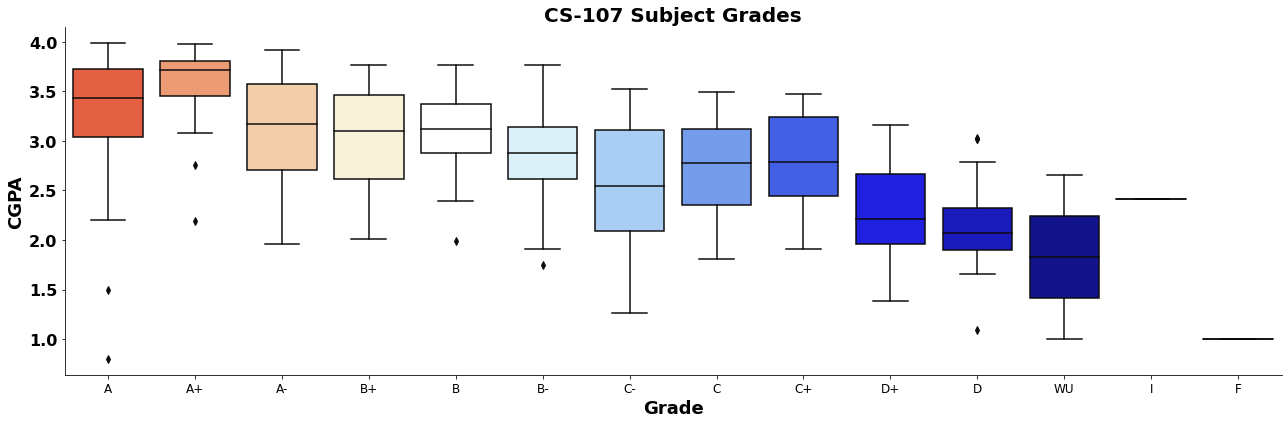

In [51]:
# Studying the relation of 'CS-107' with target variable 'CGPA'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[11],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="box",height=6, aspect=3,palette='flag')
plt.title("{} Subject Grades".format(df_categorical.columns[11]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [52]:
# Observations:

# The students with A+ grade are limited however most of them received higher CGPA

# There are many students with C- grade in this subject compared to other grade students

<Figure size 864x504 with 0 Axes>

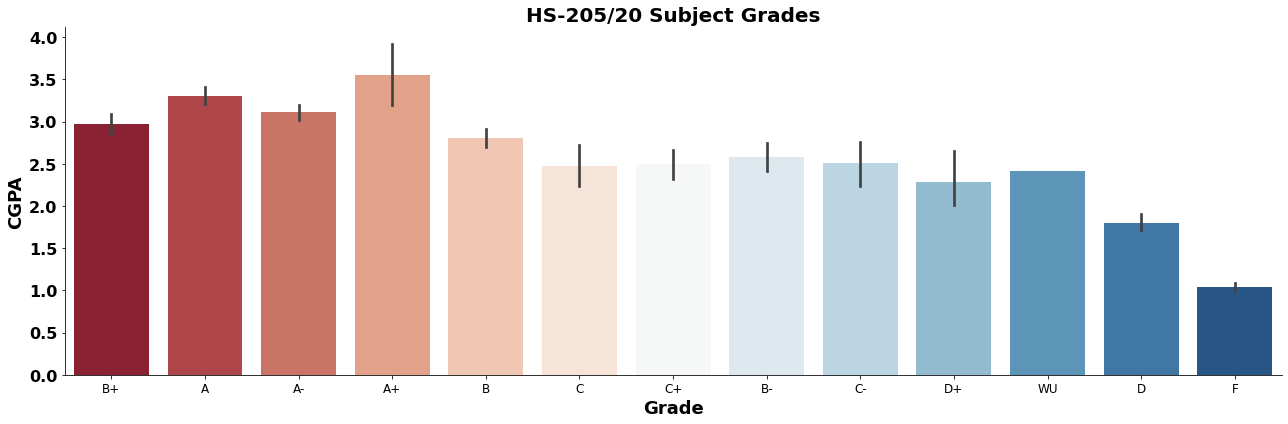

In [53]:
# Studying the relation of 'HS-205/20' with target variable 'CGPA'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[12],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="bar",height=6, aspect=3,palette='RdBu')
plt.title("{} Subject Grades".format(df_categorical.columns[12]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [54]:
# Observations:

#It seems like this subject is having lower or moderate correlation with CGPA
#as majority of the students across all grades are below 3 CGPA

<Figure size 864x504 with 0 Axes>

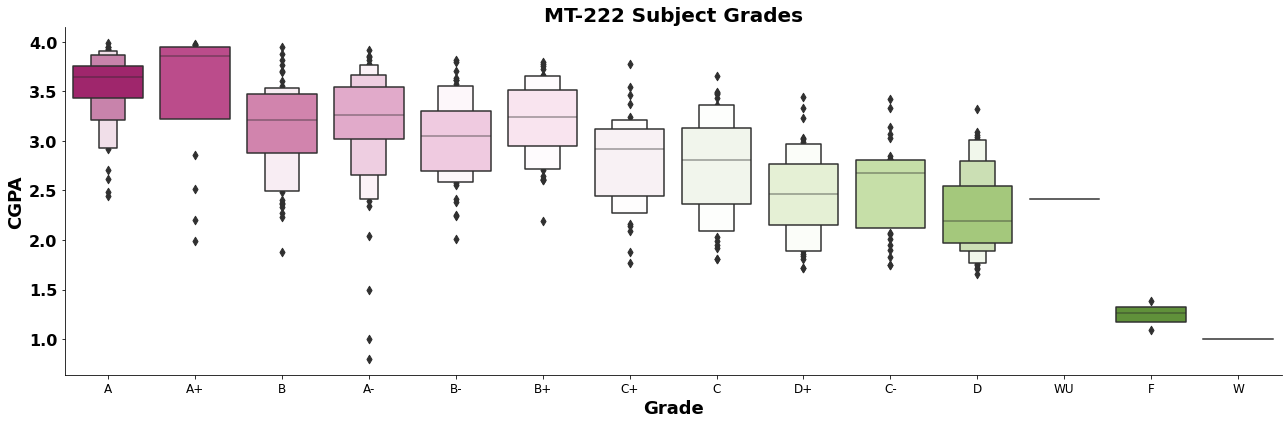

In [56]:
# Studying the relation of 'MT-222' with target variable 'CGP
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[13],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="boxen",height=6, aspect=3,palette='PiYG')
plt.title("{} Subject Grades".format(df_categorical.columns[13]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [57]:
# Observations:

# It is clearly evident that the students with grades between A and B have higher CGPA

# Students with grades F and W have lower CGPA

<Figure size 864x504 with 0 Axes>

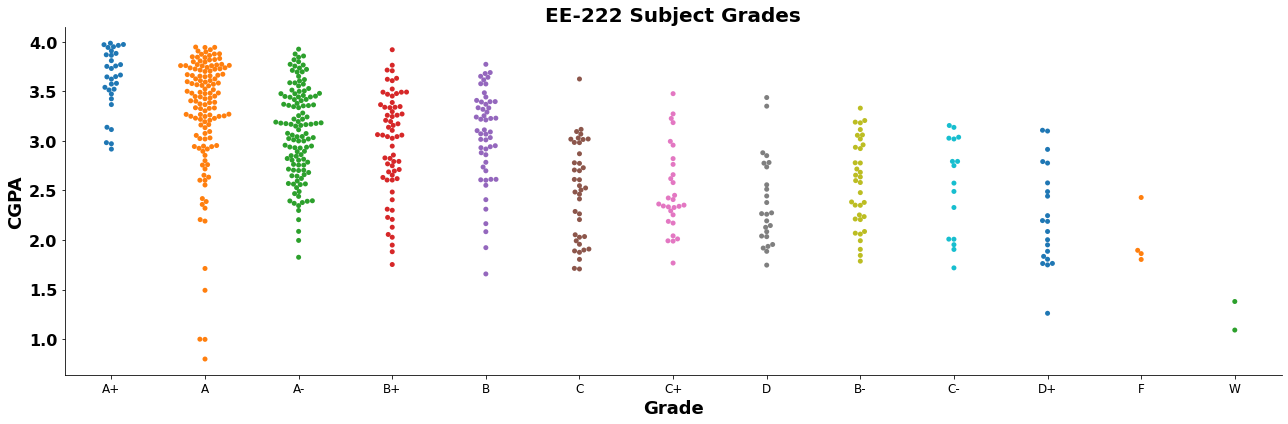

In [58]:
# Studying the relation of 'EE-222' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[14],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="swarm",height=6, aspect=3,palette='tab10')
plt.title("{} Subject Grades".format(df_categorical.columns[14]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [59]:
# Observations:

# Majority of the students are falling in the grades A, A-, B+ in this subject

# There is large variation of the CGPA even with grades A, A-, B+ and B

# i.e. this subject will have good relation with target variable CGPA

<Figure size 864x504 with 0 Axes>

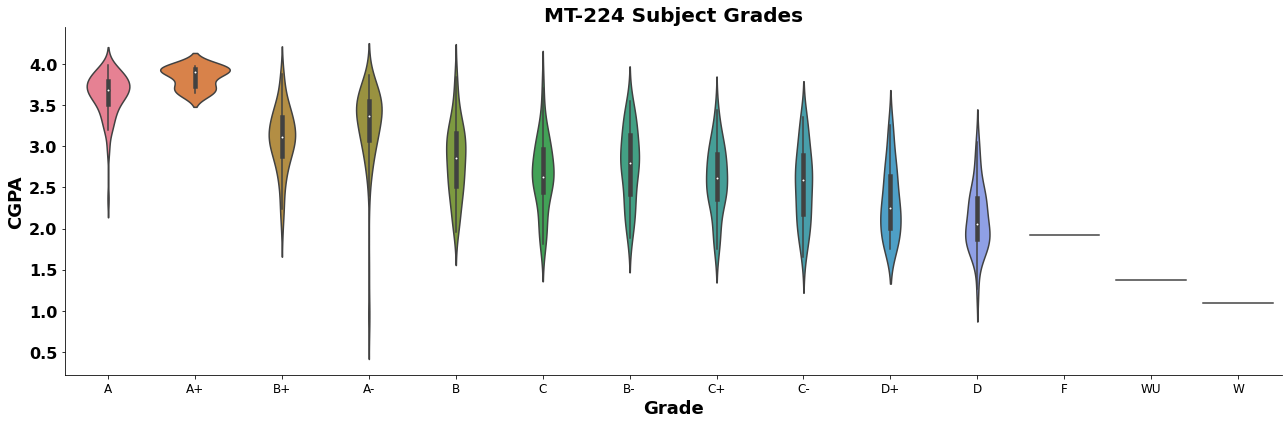

In [60]:
# Studying the relation of 'MT-224' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[15],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="violin",height=6, aspect=3,palette='husl')
plt.title("{} Subject Grades".format(df_categorical.columns[15]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [61]:
# Observations:

# Most of the students with A+ grades received highest CGPA

# There are student with A- grade in this subject but still received lowest CGPA

# Majority of the students with grades between A and C falling in the CGPA range of 2 to 3.5

<Figure size 864x504 with 0 Axes>

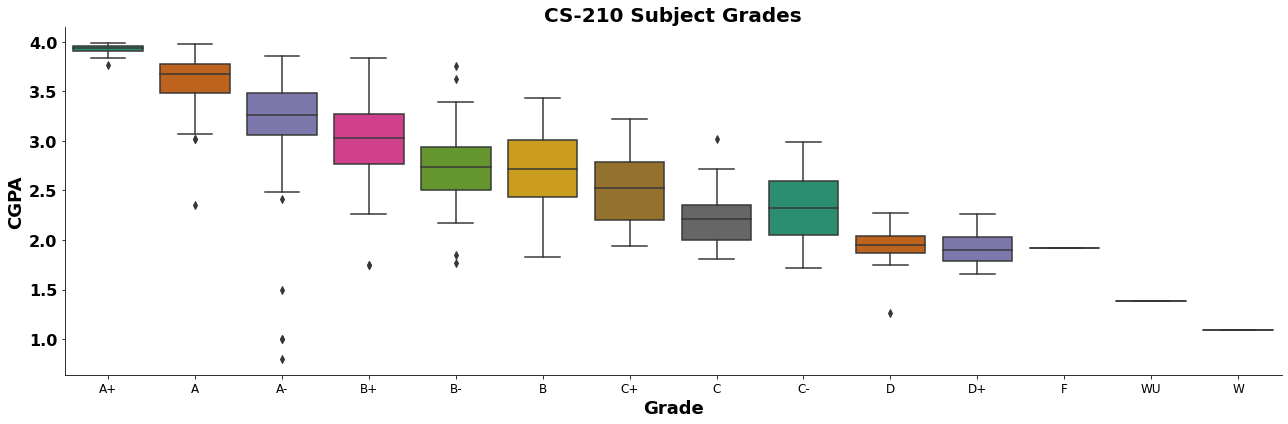

In [62]:
# Studying the relation of 'CS-210' with target variable 'CGP
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[16],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="box",height=6, aspect=3,palette='Dark2')
plt.title("{} Subject Grades".format(df_categorical.columns[16]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [63]:
# Observations:

# It is clearly evident that the students with grades from A+ to W in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have very good relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

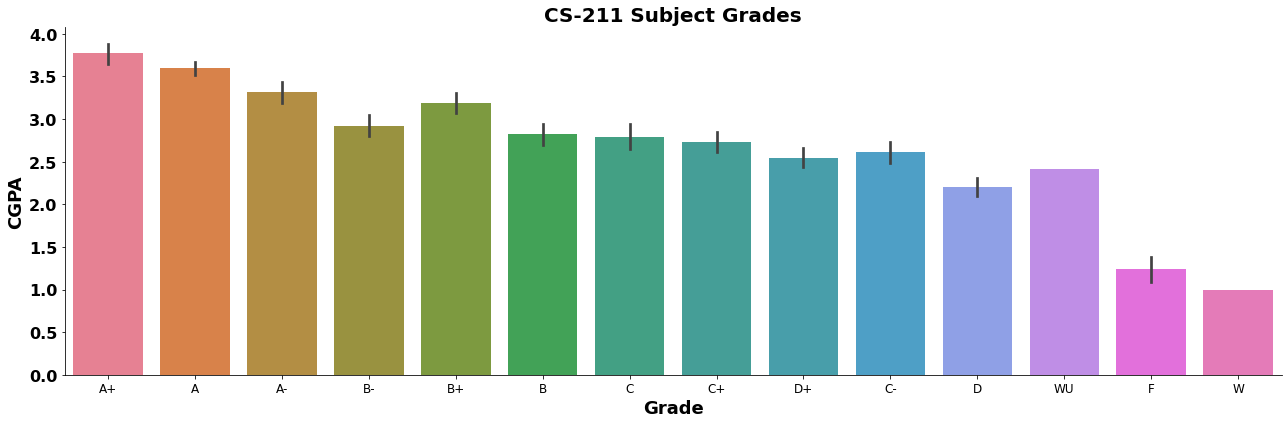

In [64]:
# Studying the relation of 'CS-211' with target variable 'CGP
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[17],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="bar",height=6, aspect=3,palette='husl')
plt.title("{} Subject Grades".format(df_categorical.columns[17]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [65]:
# Observations:

# The variation in the overall CGPA is small for the students who received grades between B to C in this subject

# Again there is small variation in CGPA for the students who received grades between A and A- in this subject

# i.e. This variable will have moderate correlation with output variable CGPA

<Figure size 864x504 with 0 Axes>

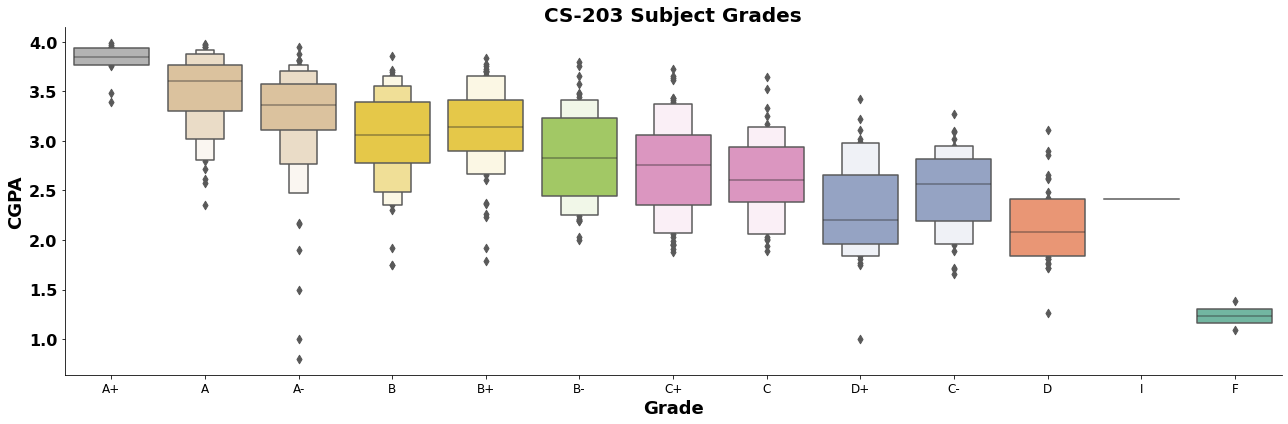

In [66]:
# Studying the relation of 'CS-203' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[18],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="boxen",height=6, aspect=3,palette='Set2_r')
plt.title("{} Subject Grades".format(df_categorical.columns[18]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [67]:
# Observations:

# It is clearly evident that the students with grades from A+ to F in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have very good relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

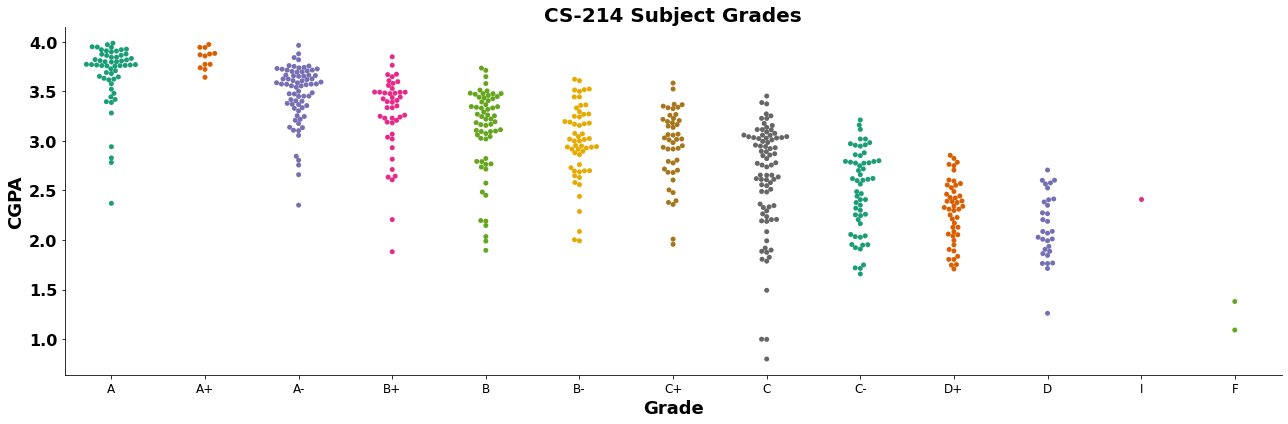

In [68]:
# Studying the relation of 'CS-214' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[19],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="swarm",height=6, aspect=3,palette='Dark2')
plt.title("{} Subject Grades".format(df_categorical.columns[19]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [69]:
# Observations:

# This graph shows that there is good amount of density of students across multiple grades

# It is also clearly evident that the students with grades from A+ to W in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have very good relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

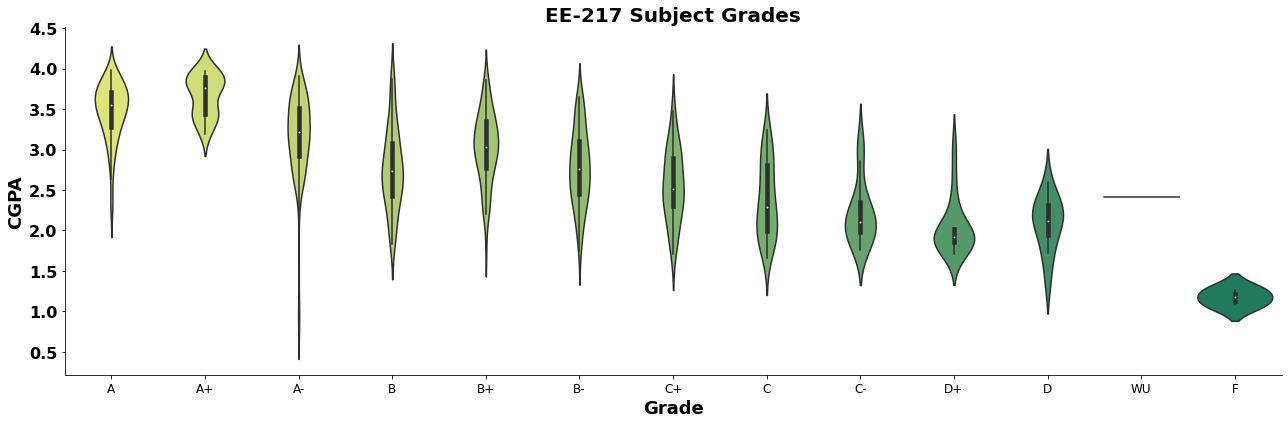

In [70]:
# Studying the relation of 'EE-217' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[20],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="violin",height=6, aspect=3,palette='summer_r')
plt.title("{} Subject Grades".format(df_categorical.columns[20]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [71]:
# Observations:

# Majority of the students with A+ grades received highest CGPA

# There are students with A- grade in this subject but still received lowest CGPA

<Figure size 864x504 with 0 Axes>

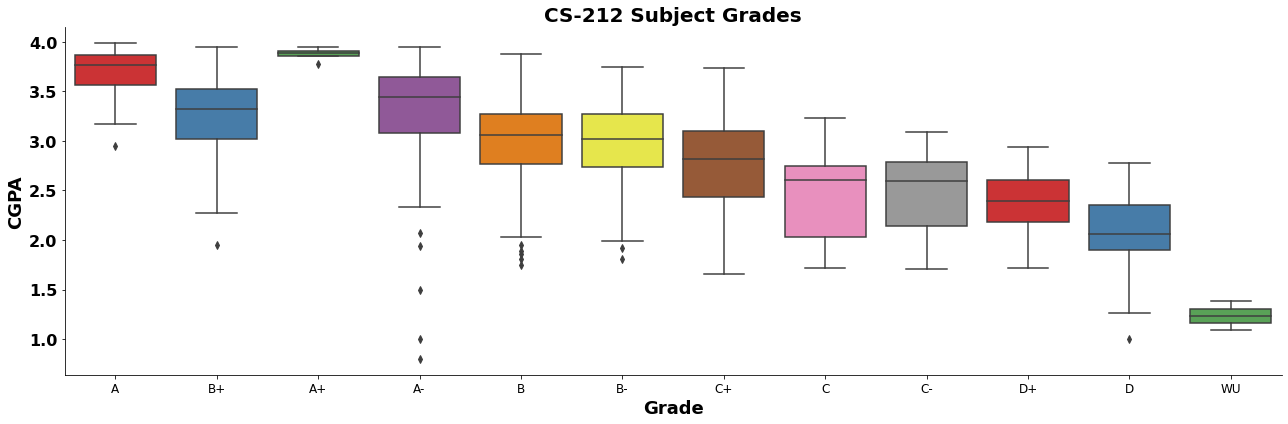

In [72]:
# Studying the relation of 'CS-212' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[21],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="box",height=6, aspect=3,palette='Set1')
plt.title("{} Subject Grades".format(df_categorical.columns[21]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [73]:
# Observations:

# There are few students who received grade A+ however all of them received higher CGPA

# Apart from grades A, A+, WU and D+, major density of the students are in the similar range across all grades

<Figure size 864x504 with 0 Axes>

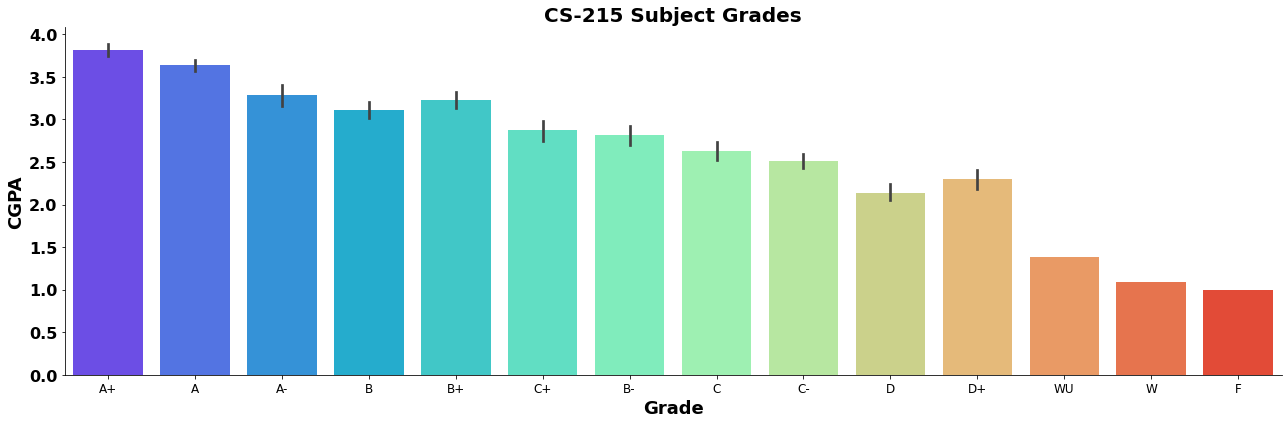

In [74]:
# Studying the relation of 'CS-215' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[22],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="bar",height=6, aspect=3,palette='rainbow')
plt.title("{} Subject Grades".format(df_categorical.columns[22]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [75]:
# Observations:

# This graph shows that there is good amount of density of students across multiple grades

# It is also clearly evident that the students with grades from A+ to F in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have very good relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

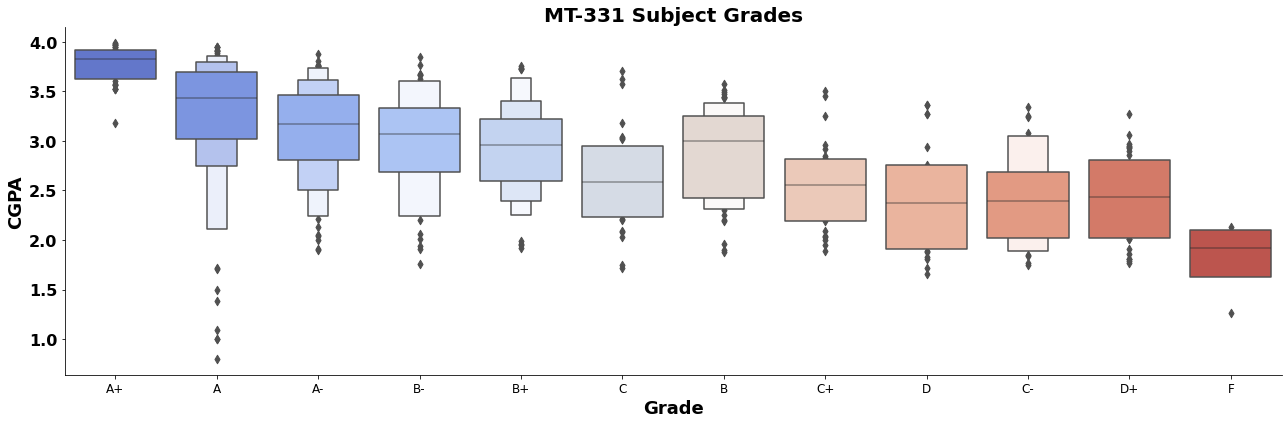

In [76]:
# Studying the relation of 'MT-331' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[23],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="boxen",height=6, aspect=3,palette='coolwarm')
plt.title("{} Subject Grades".format(df_categorical.columns[23]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()


In [78]:
# Observations:

# Majority of the students in grades A, A-, B- and B+ are falling in CGPA range of 2.8 to 3.3

# Eventhough, this graph shows decreasing in CGPA with grades varying from A+ to F
# still anticipating moderate correlation as the variation is not high in CGPA



<Figure size 864x504 with 0 Axes>

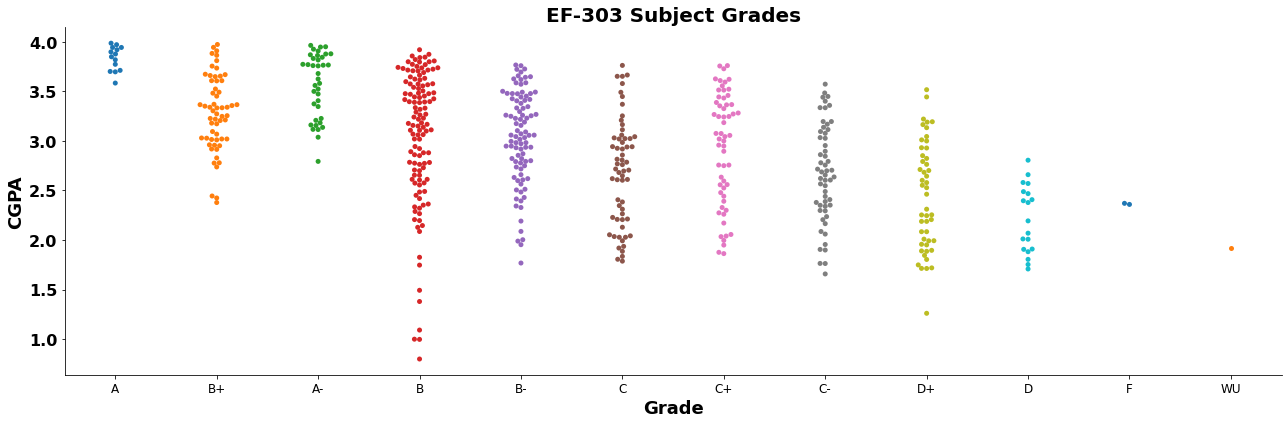

In [79]:
# Studying the relation of 'EF-303' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[24],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="swarm",height=6, aspect=3,palette='tab10')
plt.title("{} Subject Grades".format(df_categorical.columns[24]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [80]:
# Observations:

# This graph shows that there is good amount of density of students across multiple grades

# It is also clearly evident that the students with grades from A to WU in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have very good relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

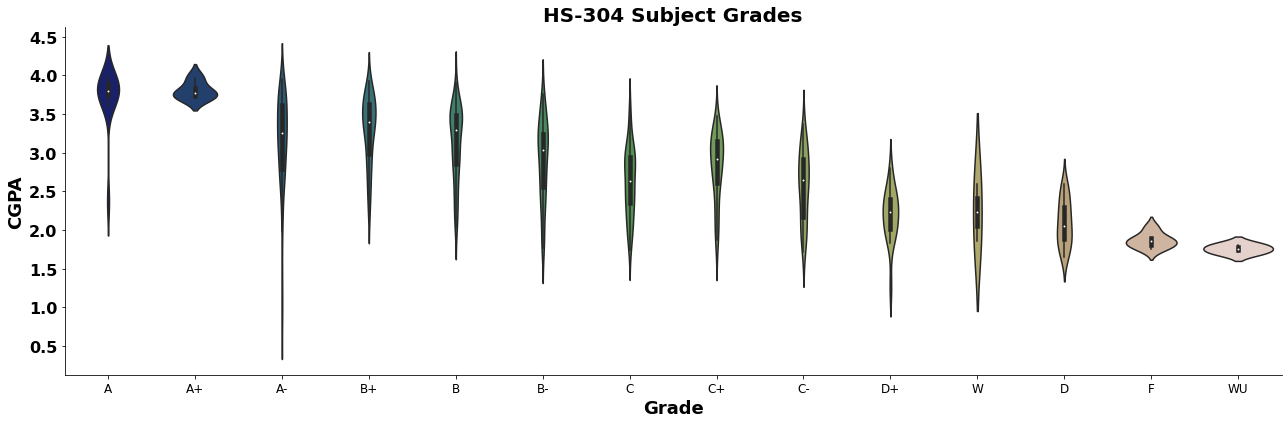

In [81]:
# Studying the relation of 'HS-304' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[25],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="violin",height=6, aspect=3,palette='gist_earth')
plt.title("{} Subject Grades".format(df_categorical.columns[25]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [82]:
# Observations:

# Majority of the students with A+ grades received highest CGPA

# There are students with A- grade in this subject but still received lowest CGPA

<Figure size 864x504 with 0 Axes>

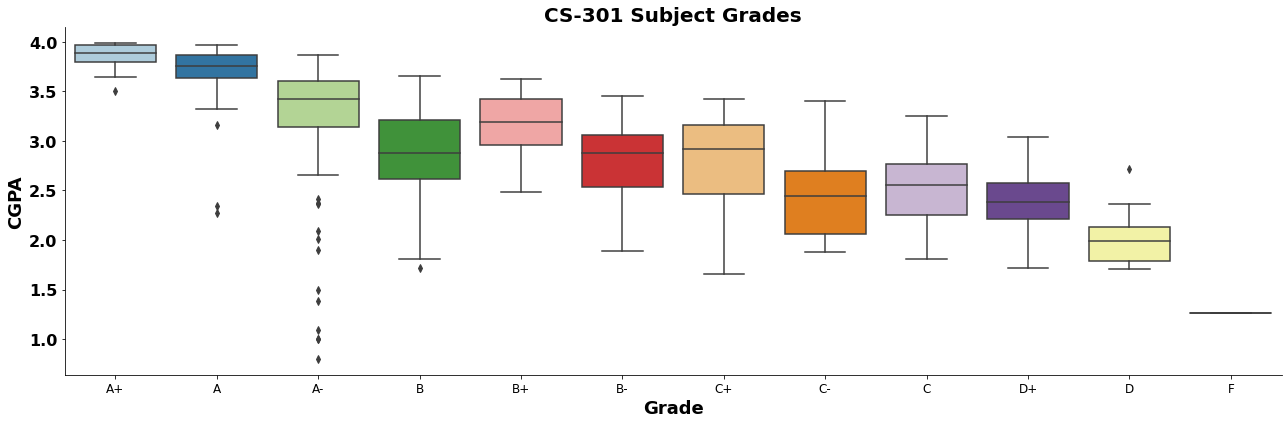

In [83]:
# Studying the relation of 'CS-301' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[26],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="box",height=6, aspect=3,palette='Paired')
plt.title("{} Subject Grades".format(df_categorical.columns[26]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [84]:
# Observations:

# It is clearly evident that the students with grades from A+ to F in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have very good relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

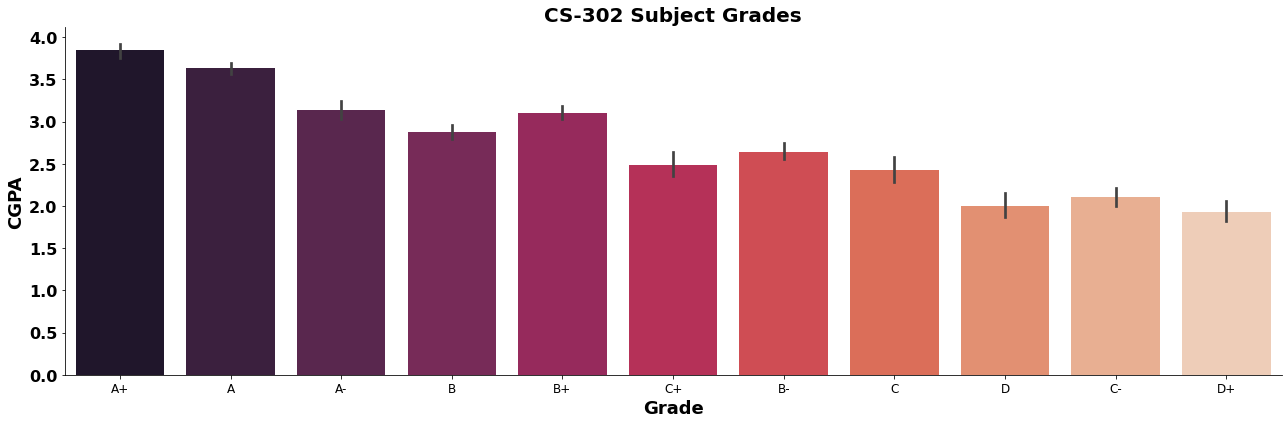

In [85]:

# Studying the relation of 'CS-302' with target variable 'CGP
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[27],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="bar",height=6, aspect=3,palette='rocket')
plt.title("{} Subject Grades".format(df_categorical.columns[27]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [86]:
# Observations:

# This graph shows that there is good amount of density of students across multiple grades

# It is also clearly evident that the students with grades from A+ to D+ in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have good or moderate relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

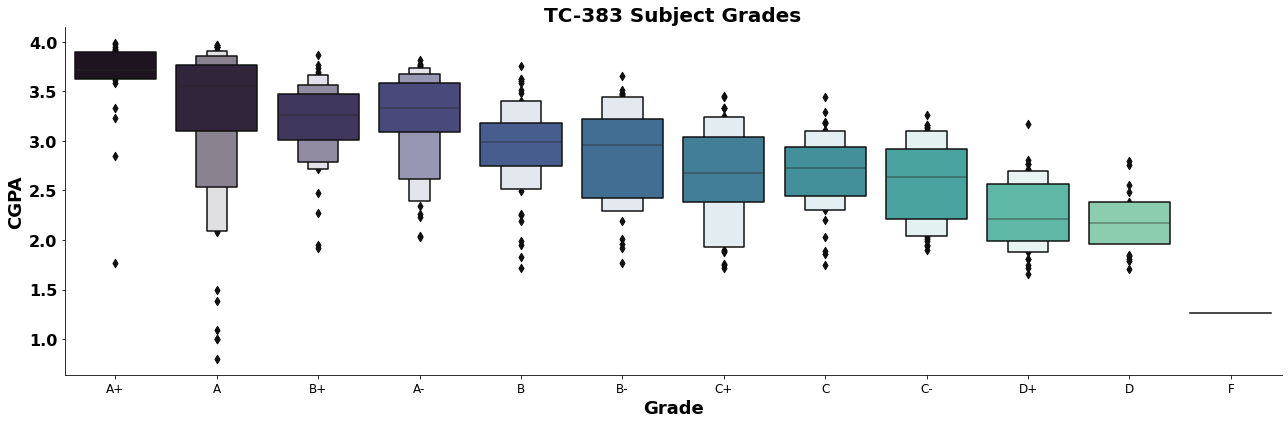

In [87]:
# Studying the relation of 'TC-383' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[28],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="boxen",height=6, aspect=3,palette='mako')
plt.title("{} Subject Grades".format(df_categorical.columns[28]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [88]:
# Observations:

# It is clearly evident that the students with grades from A+ to F in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have very good relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

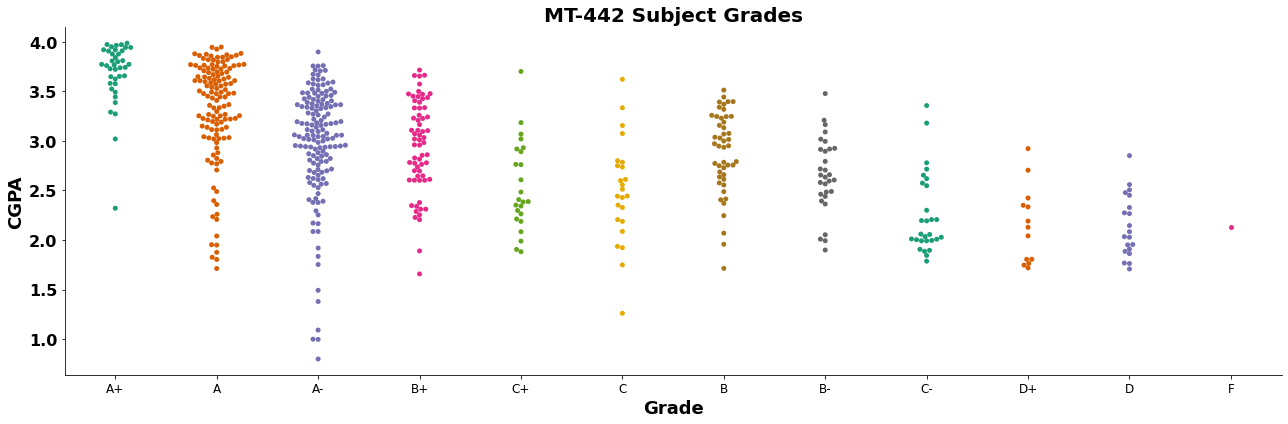

In [89]:
# Studying the relation of 'MT-442' with target variable 'CGP

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[29],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="swarm",height=6, aspect=3,palette='Dark2')
plt.title("{} Subject Grades".format(df_categorical.columns[29]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [90]:
# Observations:

# This graph shows that there is good amount of density of students across grades between A+ to A-

# It is also clearly evident that the students with grades from A+ to F in this subject have CGPA in decreasing order 
#however the variation is not high

<Figure size 864x504 with 0 Axes>

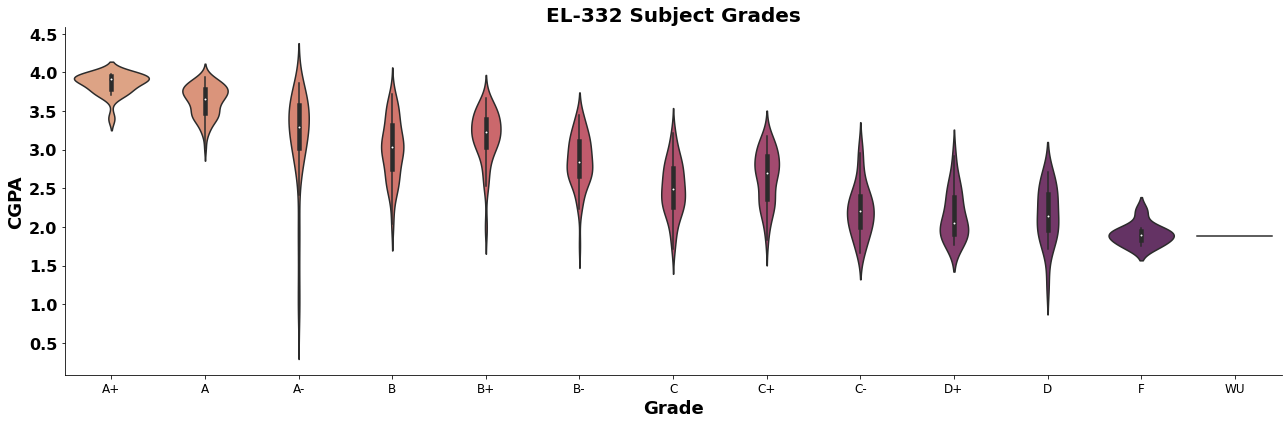

In [91]:
# Studying the relation of 'EL-332' with target variable 'CGP
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[30],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="violin",height=6, aspect=3,palette='flare')
plt.title("{} Subject Grades".format(df_categorical.columns[30]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [92]:
# Observations:

# Majority of the students with A+ grades received highest CGPA

# There are students with A- grade in this subject but still received lowest CGPA

# Seems like there are outliers in A- grade

<Figure size 864x504 with 0 Axes>

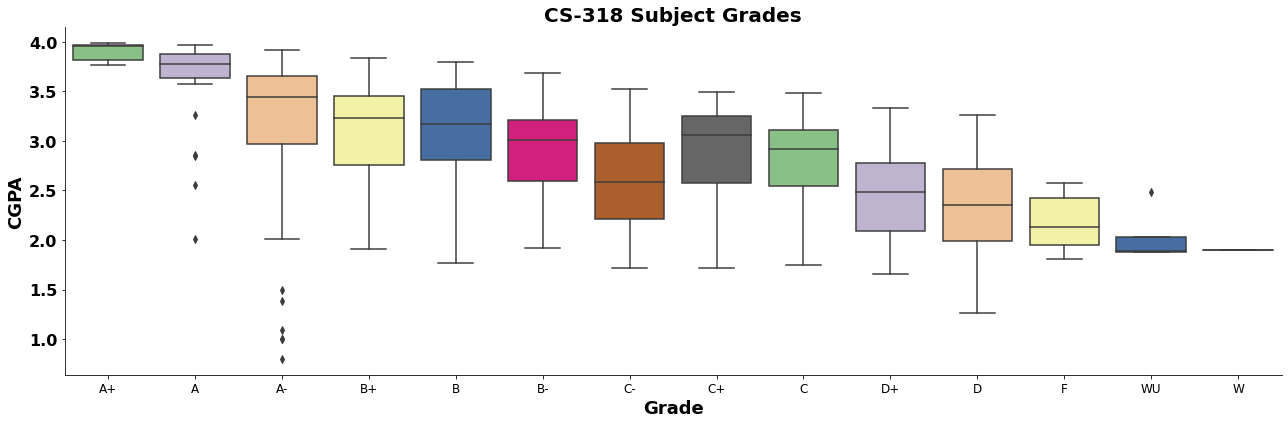

In [93]:
# Studying the relation of 'CS-318' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[31],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="box",height=6, aspect=3,palette='Accent')
plt.title("{} Subject Grades".format(df_categorical.columns[31]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()


In [94]:
# Observations:

# It is clearly evident that the students with grades from A+ to WU in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have very good relation with output variable CGPA

# Not much variation of students in grades A+ and A and most of them received higher CGPA, 
#even though there are outliers in A grade


<Figure size 864x504 with 0 Axes>

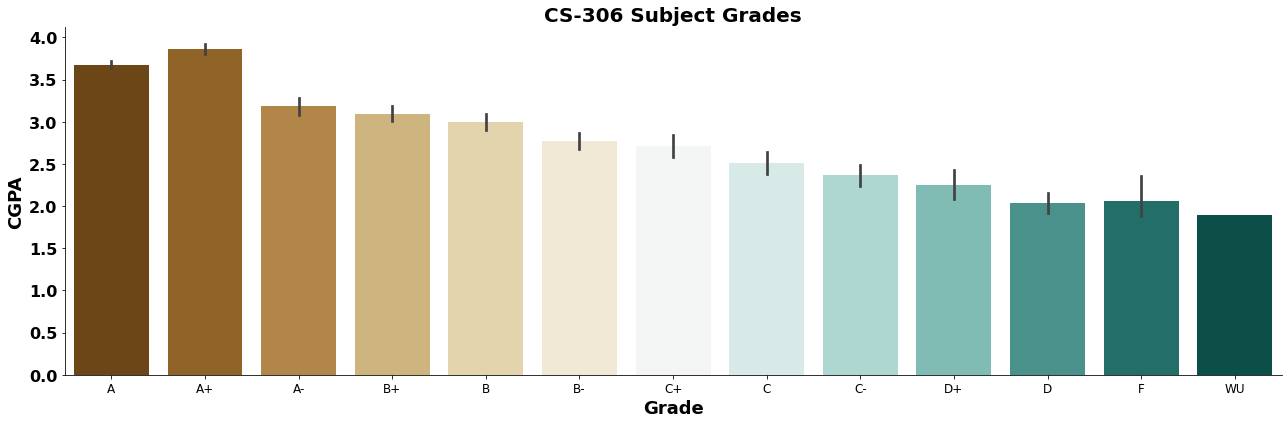

In [95]:
# Studying the relation of 'CS-306' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[32],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="bar",height=6, aspect=3,palette='BrBG')
plt.title("{} Subject Grades".format(df_categorical.columns[32]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [96]:
# Observations:

# This graph shows that there is good amount of density of students across multiple grades

# It is also clearly evident that the students with grades from A+ to WU in this subject have CGPA in decreasing order

# This clearly shows that this subject variable have good or moderate relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

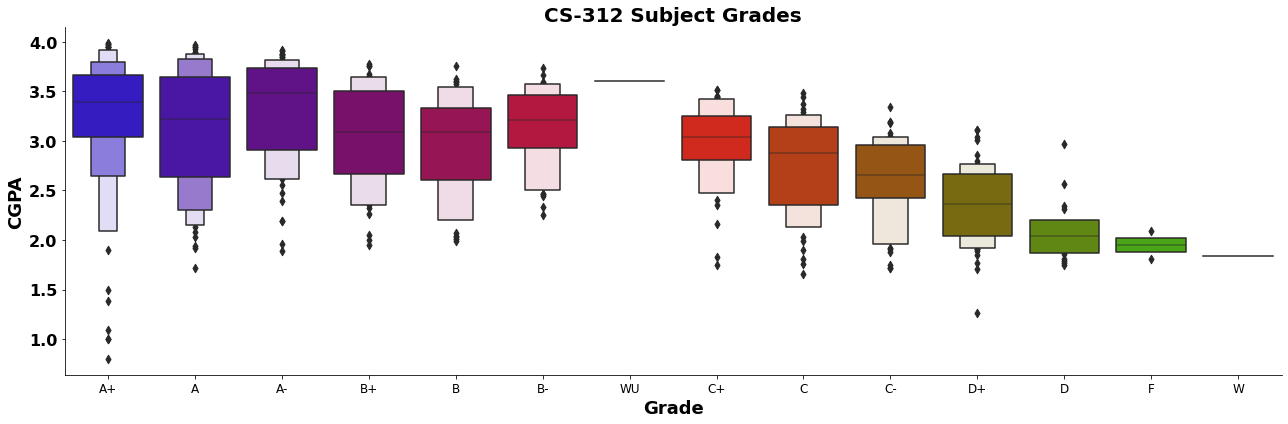

In [97]:
# Studying the relation of 'CS-312' with target variable 'CGP'
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[33],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="boxen",height=6, aspect=3,palette='brg')
plt.title("{} Subject Grades".format(df_categorical.columns[33]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()

In [98]:
# Observations:

# There are very few students who received grade WU but all of them received higer CGPA

# There is a small variation in CGPA across grades A+, A, A-, B+, B and B-

# This variable has a good mix of variations with CGPA hence expecting to have good relation with output variable CGPA

<Figure size 864x504 with 0 Axes>

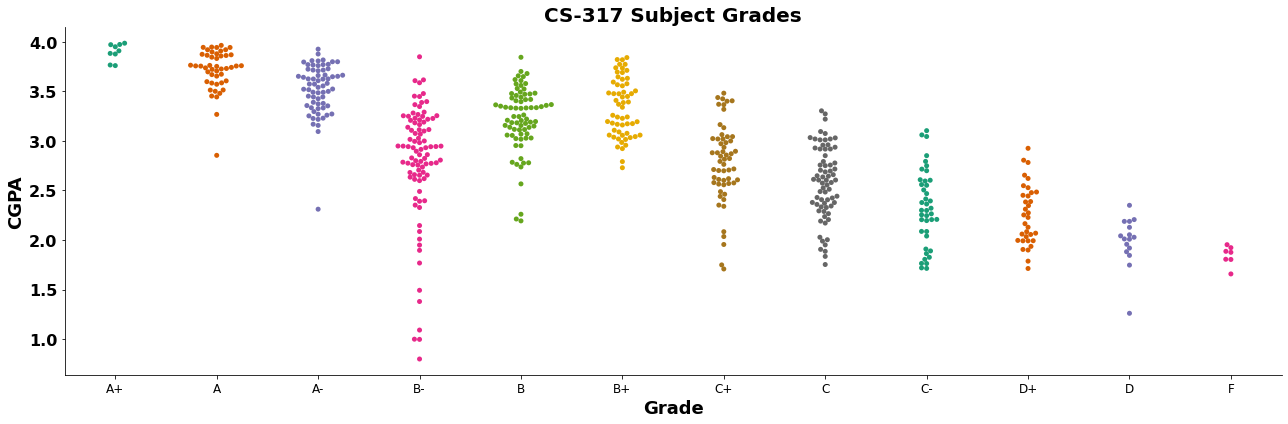

In [99]:
# Studying the relation of 'CS-317' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[34],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="swarm",height=6, aspect=3,palette='Dark2')
plt.title("{} Subject Grades".format(df_categorical.columns[34]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [100]:
# Observations:

# There are few students who received A+ and F grades

# There is major density of the students in grade B

# There is not much variation in the CGPA across A+, A, A-, B-, B and B+ graded students

<Figure size 864x504 with 0 Axes>

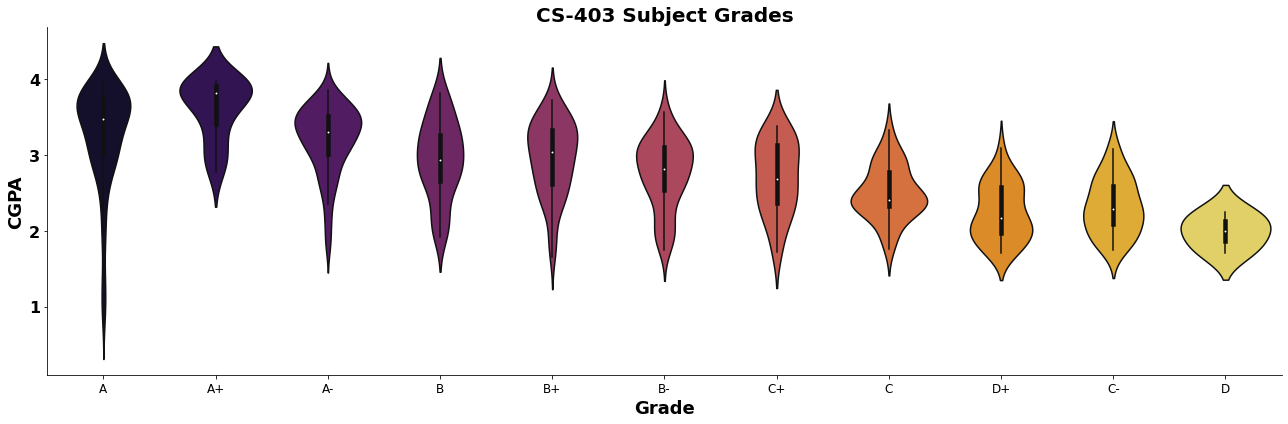

In [101]:
# Studying the relation of 'CS-403' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[35],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="violin",height=6, aspect=3,palette='inferno')
plt.title("{} Subject Grades".format(df_categorical.columns[35]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [102]:
# Observations:

# There are many students with A grade in this subject 
#but still received lowest CGPA and there is a large variation in CGPA of the students overall

# Seems like there are outliers in A grade


<Figure size 864x504 with 0 Axes>

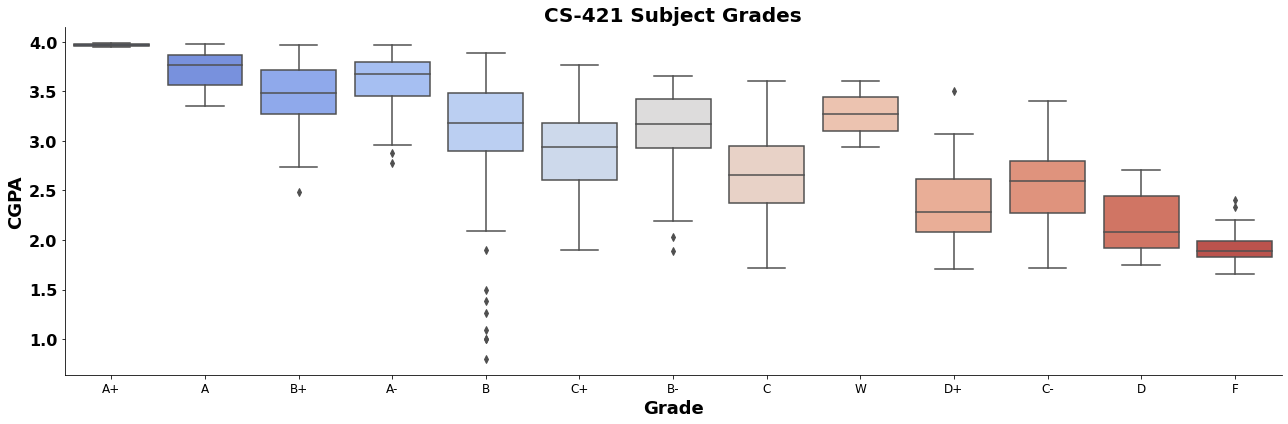

In [103]:
# Studying the relation of 'CS-421' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[36],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="box",height=6, aspect=3,palette='coolwarm')
plt.title("{} Subject Grades".format(df_categorical.columns[36]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [104]:
# Observations:

# Majority of the students with A+ grades received highest CGPA
#but there are very few students who received this grade

# There are many students with B grade in this subject but still received lowest CGPA

# Seems like there are outliers in B grade


<Figure size 864x504 with 0 Axes>

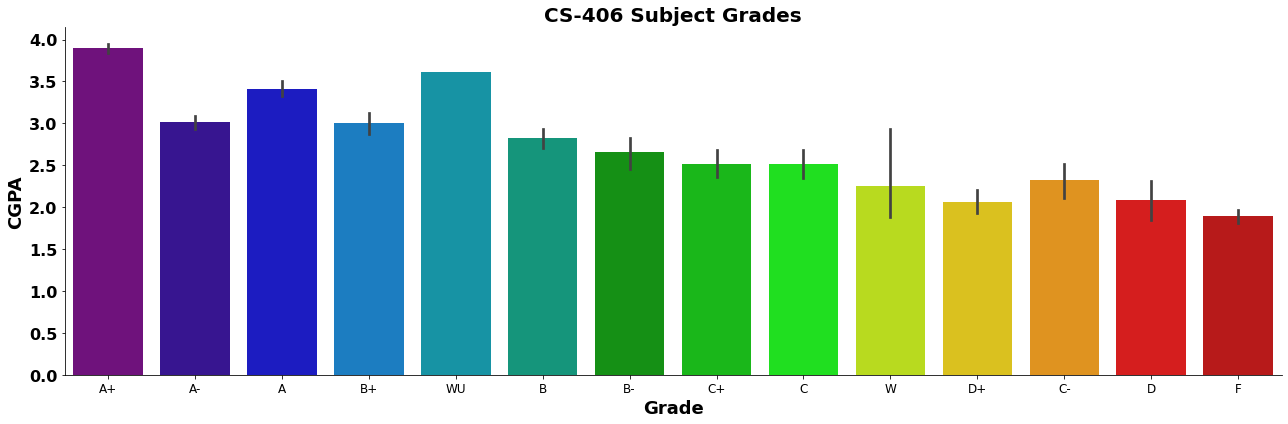

In [105]:
# Studying the relation of 'CS-406' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[37],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="bar",height=6, aspect=3,palette='nipy_spectral')
plt.title("{} Subject Grades".format(df_categorical.columns[37]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [106]:
# Observations:

# Interestingly there are many students who received lowest grade WU in this subject but still received higher CGPA

# There are many students with A+ grade who received higher CGPA

# This graph shows that this variable will have good or moderate relation with output variable

<Figure size 864x504 with 0 Axes>

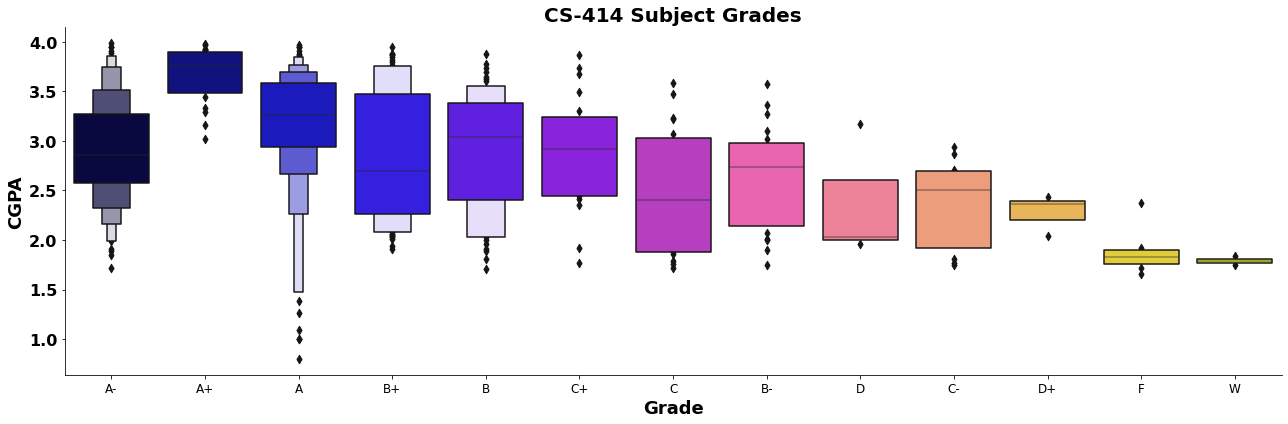

In [107]:
# Studying the relation of 'CS-414' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[38],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="boxen",height=6, aspect=3,palette='gnuplot2')
plt.title("{} Subject Grades".format(df_categorical.columns[38]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [108]:
# Observations:

# There are few students who received A+ grade but most of them got higher CGPA

# There are many students who received B+ and B grades in this subject have less variation in CGPA

# There are outliers in A- and A grades

# Overall this variable will have very good relation with output variable

<Figure size 864x504 with 0 Axes>

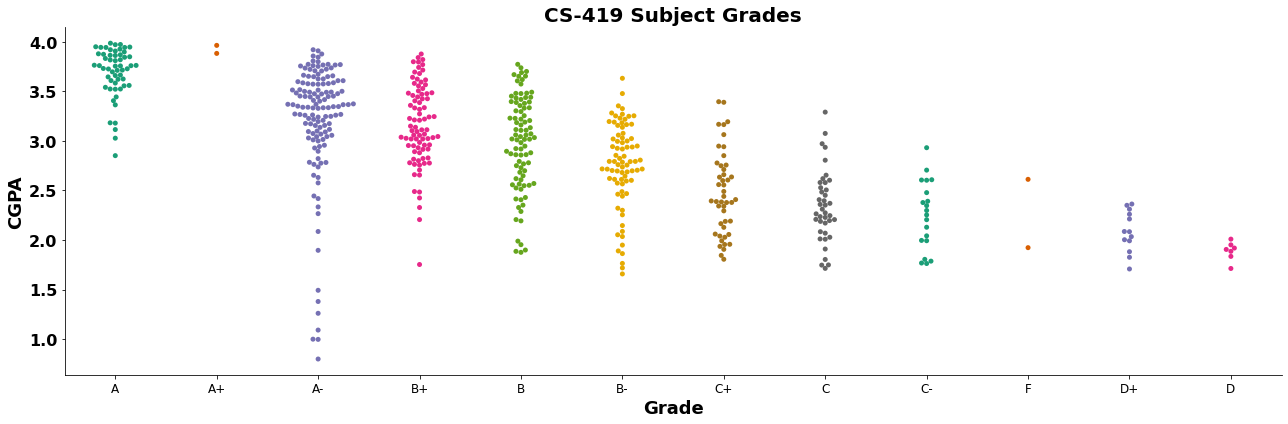

In [109]:
# Studying the relation of 'CS-419' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[39],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="swarm",height=6, aspect=3,palette='Dark2')
plt.title("{} Subject Grades".format(df_categorical.columns[39]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [110]:
# Observations:

# There are few students in A+ grade

# Theare are many students who received A- grade but there is a large variation of their CGPA ranging from low to high

# There are good number of students who received grades B+, B and B-

<Figure size 864x504 with 0 Axes>

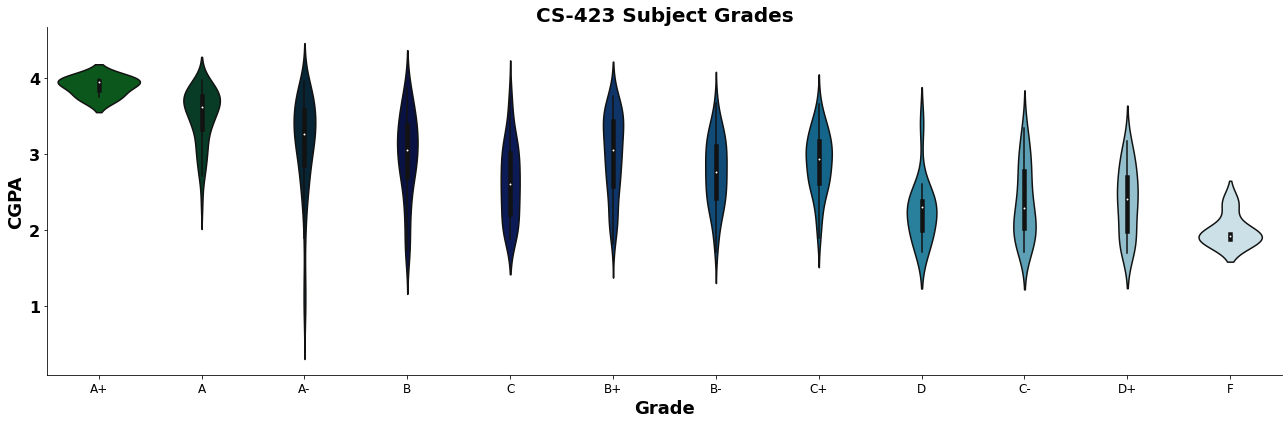

In [111]:
# Studying the relation of 'CS-423' with target variable 'CGP'
plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[40],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="violin",height=6, aspect=3,palette='ocean')
plt.title("{} Subject Grades".format(df_categorical.columns[40]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [112]:
# Observations:

# There are few students who received A+ and F grades

# The students who received grade A- in this subject falling the range of smaller to higher CGPA

<Figure size 864x504 with 0 Axes>

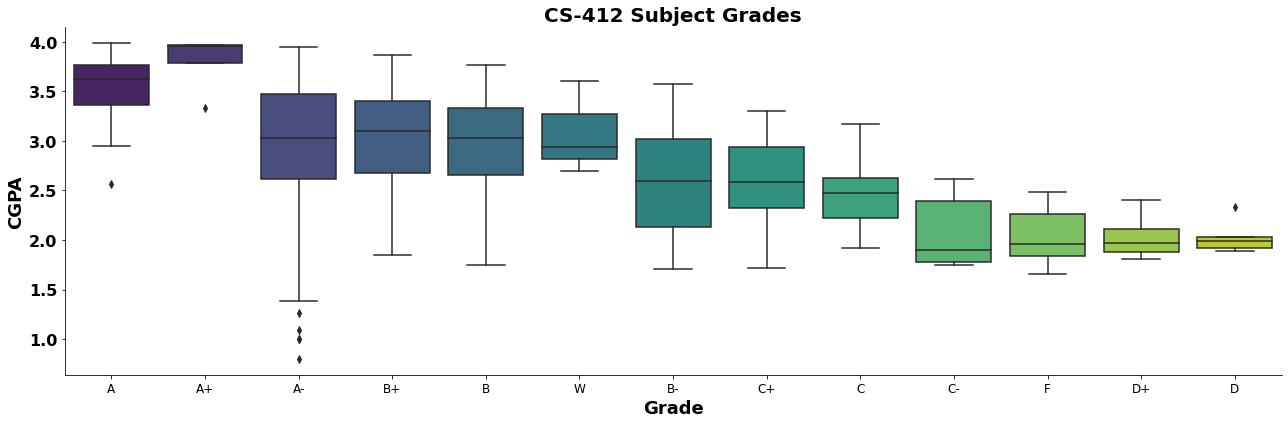

In [113]:
# Studying the relation of 'CS-412' with target variable 'CGP'

plt.figure(figsize=(12,7))
sns.catplot(x=df_categorical.columns[41],y='CGPA',data= df.sort_values(by='CGPA',ascending=False),
            kind="box",height=6, aspect=3,palette='viridis')
plt.title("{} Subject Grades".format(df_categorical.columns[41]),fontsize=20, fontweight='bold')
plt.xlabel('Grade', fontsize=18,fontweight='bold')
plt.ylabel('CGPA', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [114]:
# Observations:

# There are few students who received A+ grade but most of them got higher CGPA

# There are many students who received A-, B+ and B grades in this subject have large variation in CGPA

# There are outliers in A- grade

# Overall this variable will have very good relation with output variable

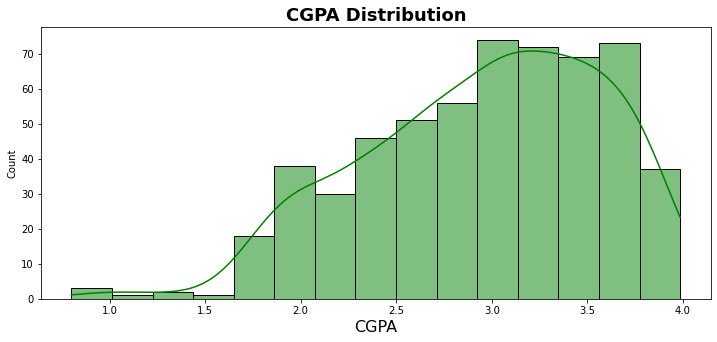

In [115]:
# Checking the variaiton in CGPA
plt.figure(figsize=(12,5))
sns.histplot(df["CGPA"], kde=True, color='g')
plt.xlabel('CGPA',fontsize=16)
plt.title('CGPA Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [116]:
# Observation:

# Most of the students got CGPA within the range of 3.0-3.7. Very few students are in the CGPA range of 1.0-1.5

# It is left skewed distribution

# Eventhough it is skewed distribution, we don't remove skewness as this is target variable

# Encoding of Categorical Data

In [117]:
# Using Label Encoder to encode the data

In [118]:
df_categorical.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412'],
      dtype='object')

In [119]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_categorical:
    df[i] = le.fit_transform(df[i])
df.head()

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0         0       5      10       8          6       8      10       9   
1         1       0       9      10          9       5       6       9   
2         2       0       3       0          5       4       0       5   
3         3       9       7      10          9       9       2      10   
4         4       2       2       2          4       0       0       2   

   EL-102  EE-119  ME-107  CS-107  HS-205/20  MT-222  EE-222  MT-224  CS-210  \
0       8       5       8       8          4       9       2       5       7   
1       0      10       9       4          7       5       8      10      10   
2       4       2       2       5          2       0       0       0       0   
3       8       9       7       9          3      10       5       9       6   
4       4       0       2       6          0       0       2       2       2   

   CS-211  CS-203  CS-214  EE-217  CS-212  CS-215  MT-331  EF-303  HS-304  \
0      10      10       9       0       9       8       6       7       7   
1       9       6       9       5       6       9      10       8       8   
2       1       0       2       0       2       0       0       6       0   
3       4       7       9      10       9       9      10       8       5   
4       5       0       2       0       2       2       7       7       2   

   CS-301  CS-302  TC-383  MT-442  EL-332  CS-318  CS-306  CS-312  CS-317  \
0       3       6       7       4       6       8       6       8       8   
1       2      10       8       8       6       2       9      10       9   
2       4       2       3       0       4       2       2       3       3   
3       9       5      10       8      10       4       8      10       6   
4       5       2       7       2       2       5       2       5       4   

   CS-403  CS-421  CS-406  CS-414  CS-419  CS-423  CS-412   CGPA  
0       8       8       2       0       8       3       2  2.205  
1       6       9       2       5       6       6       3  2.008  
2       0       6       0       0       0       2       0  3.608  
3      10       8       5       3       7       7       7  1.906  
4       4       5       2       0       2       2       0  3.448

In [120]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'], float64: ['CGPA']}

In [121]:
# Dropping unnecessary column 'Seat No. as it will not contribute to model training
df.drop(['Seat No.'],axis=1,inplace=True)

In [122]:
df.head()

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       5      10       8          6       8      10       9       8       5   
1       0       9      10          9       5       6       9       0      10   
2       0       3       0          5       4       0       5       4       2   
3       9       7      10          9       9       2      10       8       9   
4       2       2       2          4       0       0       2       4       0   

   ME-107  CS-107  HS-205/20  MT-222  EE-222  MT-224  CS-210  CS-211  CS-203  \
0       8       8          4       9       2       5       7      10      10   
1       9       4          7       5       8      10      10       9       6   
2       2       5          2       0       0       0       0       1       0   
3       7       9          3      10       5       9       6       4       7   
4       2       6          0       0       2       2       2       5       0   

   CS-214  EE-217  CS-212  CS-215  MT-331  EF-303  HS-304  CS-301  CS-302  \
0       9       0       9       8       6       7       7       3       6   
1       9       5       6       9      10       8       8       2      10   
2       2       0       2       0       0       6       0       4       2   
3       9      10       9       9      10       8       5       9       5   
4       2       0       2       2       7       7       2       5       2   

   TC-383  MT-442  EL-332  CS-318  CS-306  CS-312  CS-317  CS-403  CS-421  \
0       7       4       6       8       6       8       8       8       8   
1       8       8       6       2       9      10       9       6       9   
2       3       0       4       2       2       3       3       0       6   
3      10       8      10       4       8      10       6      10       8   
4       7       2       2       5       2       5       4       4       5   

   CS-406  CS-414  CS-419  CS-423  CS-412   CGPA  
0       2       0       8       3       2  2.205  
1       2       5       6       6       3  2.008  
2       0       0       0       2       0  3.608  
3       5       3       7       7       7  1.906  
4       2       0       2       2       0  3.448

# Checking coefficients of correlation (r)

In [123]:
# As the dataset is having many columns, dividing it into two dataframes to understand correlation using heatmap.


In [124]:
x1=df.iloc[:,0:22]
y=df["CGPA"].copy()
df_1=pd.concat([x1,y],axis=1)
df_1.head()

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       5      10       8          6       8      10       9       8       5   
1       0       9      10          9       5       6       9       0      10   
2       0       3       0          5       4       0       5       4       2   
3       9       7      10          9       9       2      10       8       9   
4       2       2       2          4       0       0       2       4       0   

   ME-107  CS-107  HS-205/20  MT-222  EE-222  MT-224  CS-210  CS-211  CS-203  \
0       8       8          4       9       2       5       7      10      10   
1       9       4          7       5       8      10      10       9       6   
2       2       5          2       0       0       0       0       1       0   
3       7       9          3      10       5       9       6       4       7   
4       2       6          0       0       2       2       2       5       0   

   CS-214  EE-217  CS-212  CS-215   CGPA  
0       9       0       9       8  2.205  
1       9       5       6       9  2.008  
2       2       0       2       0  3.608  
3       9      10       9       9  1.906  
4       2       0       2       2  3.448

In [125]:
x2=df.iloc[:,22:41]
df_2=pd.concat([x2,y],axis=1)
df_2.head()

MT-331  EF-303  HS-304  CS-301  CS-302  TC-383  MT-442  EL-332  CS-318  \
0       6       7       7       3       6       7       4       6       8   
1      10       8       8       2      10       8       8       6       2   
2       0       6       0       4       2       3       0       4       2   
3      10       8       5       9       5      10       8      10       4   
4       7       7       2       5       2       7       2       2       5   

   CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  CS-423  \
0       6       8       8       8       8       2       0       8       3   
1       9      10       9       6       9       2       5       6       6   
2       2       3       3       0       6       0       0       0       2   
3       8      10       6      10       8       5       3       7       7   
4       2       5       4       4       5       2       0       2       2   

   CS-412   CGPA  
0       2  2.205  
1       3  2.008  
2       0  3.608  
3       7  1.906  
4       0  3.448

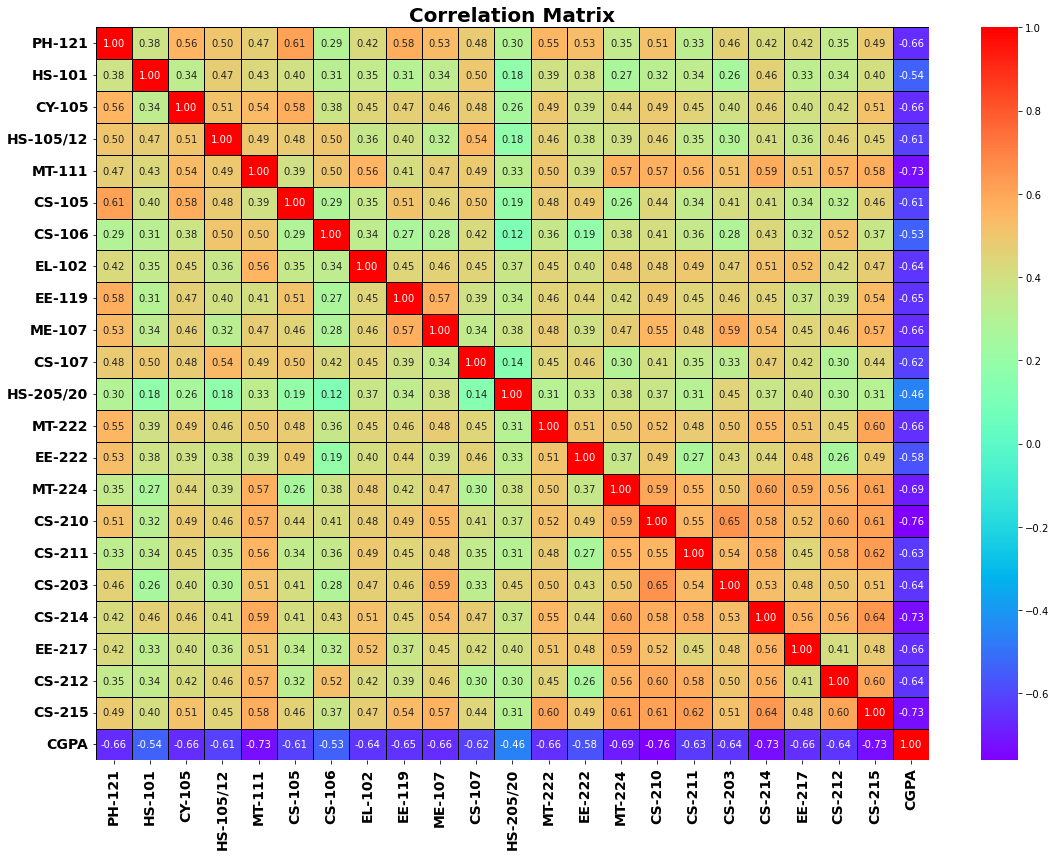

In [132]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r_1=df_1.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_r_1,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix_1.jpg")
plt.show()

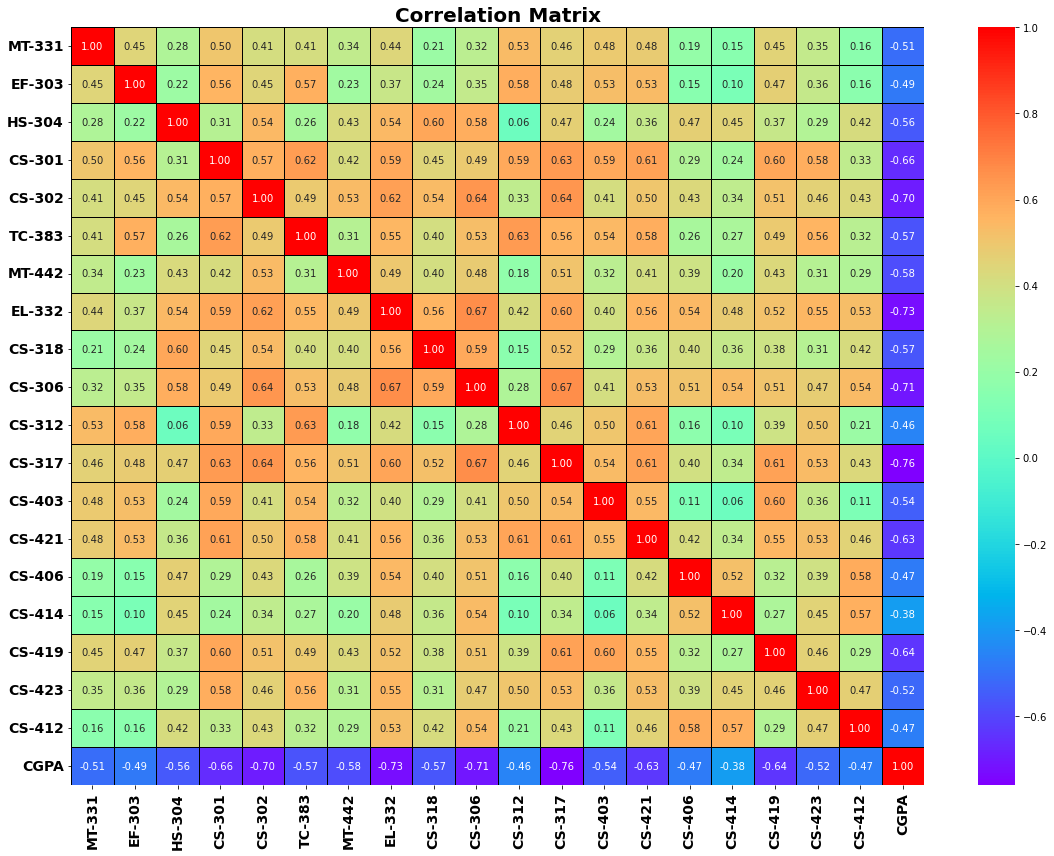

In [133]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r_2=df_2.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_r_2,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix_2.jpg")
plt.show()

In [134]:
df1_corr=corr_r_1["CGPA"].sort_values(ascending=False) 
df1_corr


CGPA         1.000000
HS-205/20   -0.460525
CS-106      -0.534995
HS-101      -0.537170
EE-222      -0.575335
CS-105      -0.613169
HS-105/12   -0.613989
CS-107      -0.615309
CS-211      -0.628070
EL-102      -0.642262
CS-212      -0.642878
CS-203      -0.644191
EE-119      -0.646829
EE-217      -0.655993
MT-222      -0.656320
CY-105      -0.658282
ME-107      -0.663023
PH-121      -0.663135
MT-224      -0.692696
MT-111      -0.730095
CS-215      -0.730460
CS-214      -0.733848
CS-210      -0.761468
Name: CGPA, dtype: float64

In [135]:
df2_corr=corr_r_2["CGPA"].sort_values(ascending=False) 
df2_corr

CGPA      1.000000
CS-414   -0.384003
CS-312   -0.458019
CS-412   -0.466512
CS-406   -0.474419
EF-303   -0.485478
MT-331   -0.508428
CS-423   -0.520968
CS-403   -0.544543
HS-304   -0.557912
CS-318   -0.566393
TC-383   -0.572329
MT-442   -0.582592
CS-421   -0.633001
CS-419   -0.641804
CS-301   -0.664117
CS-302   -0.696112
CS-306   -0.708299
EL-332   -0.729609
CS-317   -0.760792
Name: CGPA, dtype: float64

In [136]:
# Combining two corr variables to get single variable for plotting purpose
corr = pd.concat([df1_corr, df2_corr], axis=0)
corr


CGPA         1.000000
HS-205/20   -0.460525
CS-106      -0.534995
HS-101      -0.537170
EE-222      -0.575335
CS-105      -0.613169
HS-105/12   -0.613989
CS-107      -0.615309
CS-211      -0.628070
EL-102      -0.642262
CS-212      -0.642878
CS-203      -0.644191
EE-119      -0.646829
EE-217      -0.655993
MT-222      -0.656320
CY-105      -0.658282
ME-107      -0.663023
PH-121      -0.663135
MT-224      -0.692696
MT-111      -0.730095
CS-215      -0.730460
CS-214      -0.733848
CS-210      -0.761468
CGPA         1.000000
CS-414      -0.384003
CS-312      -0.458019
CS-412      -0.466512
CS-406      -0.474419
EF-303      -0.485478
MT-331      -0.508428
CS-423      -0.520968
CS-403      -0.544543
HS-304      -0.557912
CS-318      -0.566393
TC-383      -0.572329
MT-442      -0.582592
CS-421      -0.633001
CS-419      -0.641804
CS-301      -0.664117
CS-302      -0.696112
CS-306      -0.708299
EL-332      -0.729609
CS-317      -0.760792
Name: CGPA, dtype: float64

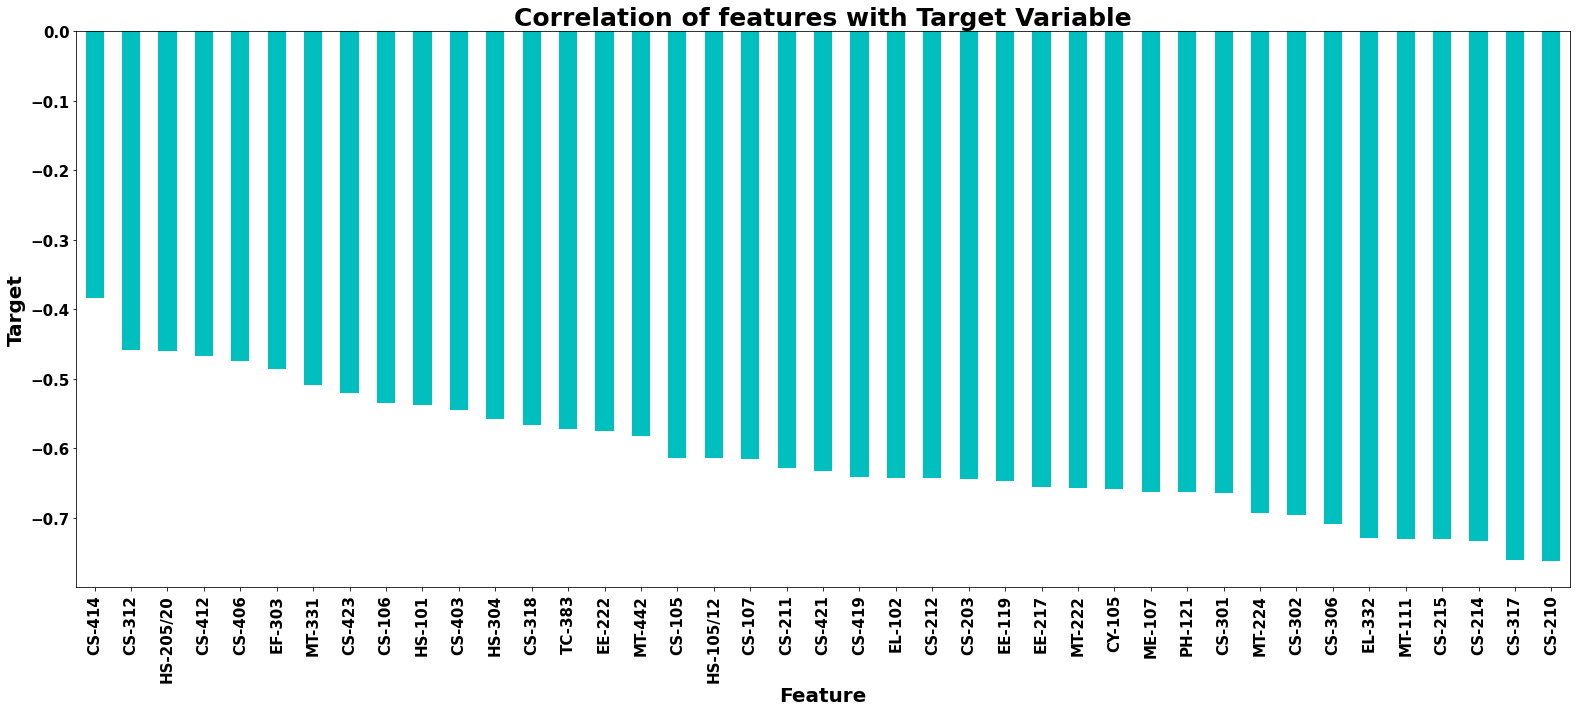

In [137]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
df.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [138]:
# Observation:

# All the columns are having moderate to strong relation with target variable.

# Hence, not dropping any column based on correlation matrix.

# All the features are having negative correlation with target variable "CGPA"

# Max negative correlation: CS-210

# Min negative correlation: CS-414

# I will check feature scores from SelectKBest algorithm with f test 
# After will decide after that to drop any columns based on the low score


# Checking top features using SelectKBest algorithm

In [139]:
import pandas as pd
import numpy as np

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


X=df.drop("CGPA",axis=1)  #independent columns
y=df["CGPA"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(42,'Score'))  #print 10 best features

        Specs       Score
15     CS-210  785.225113
33     CS-317  781.918844
18     CS-214  664.025428
21     CS-215  650.907909
4      MT-111  649.517278
29     EL-332  647.667586
31     CS-306  572.852544
26     CS-302  534.935280
14     MT-224  524.867108
25     CS-301  448.983607
0      PH-121  446.614964
9      ME-107  446.344094
2      CY-105  435.121152
12     MT-222  430.570110
19     EE-217  429.817541
8      EE-119  409.316016
17     CS-203  403.619767
20     CS-212  400.818976
7      EL-102  399.512166
38     CS-419  398.541946
35     CS-421  380.426111
16     CS-211  370.675337
10     CS-107  346.681958
3   HS-105/12  344.297216
5      CS-105  342.824811
28     MT-442  292.356364
13     EE-222  281.536035
27     TC-383  277.172392
30     CS-318  268.750935
24     HS-304  257.152781
34     CS-403  239.844170
1      HS-101  230.777216
6      CS-106  228.164265
39     CS-423  211.957447
22     MT-331  198.362738
23     EF-303  175.461000
36     CS-406  165.263324
40     CS-41

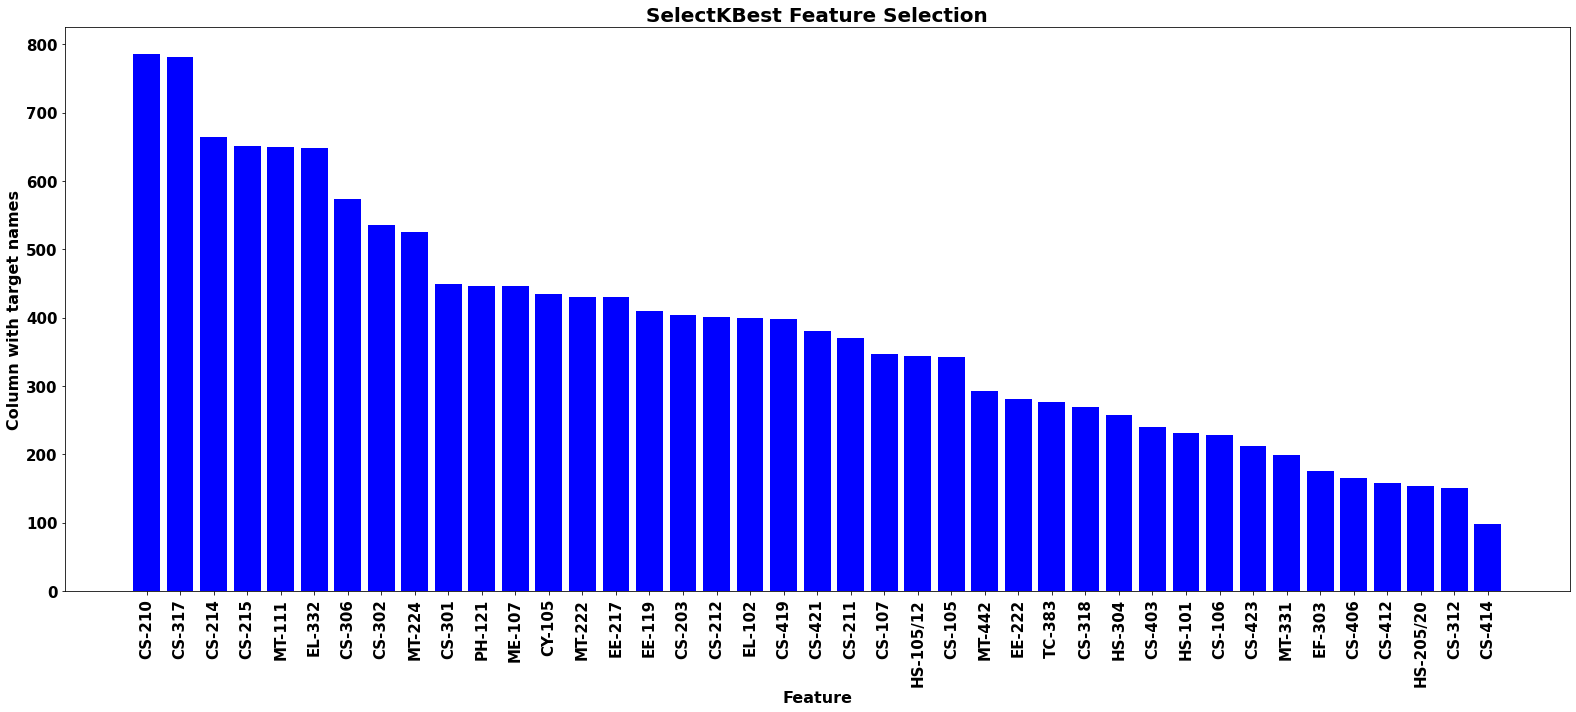

In [141]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='b')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [142]:
# Observations:

# Both correlation coefficient values and selectkBest feature score values shows moderate or strong correlation between features and target variable

# Hence I will not be dropping any columns

# Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [143]:
# We don't apply VIF on categorical data. As entire X data is categorical, hence skipping this

# Pre-Processing

In [144]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [145]:
# Segregating only X data
x=df.drop("CGPA",axis=1)

In [146]:
x.head(3)

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       5      10       8          6       8      10       9       8       5   
1       0       9      10          9       5       6       9       0      10   
2       0       3       0          5       4       0       5       4       2   

   ME-107  CS-107  HS-205/20  MT-222  EE-222  MT-224  CS-210  CS-211  CS-203  \
0       8       8          4       9       2       5       7      10      10   
1       9       4          7       5       8      10      10       9       6   
2       2       5          2       0       0       0       0       1       0   

   CS-214  EE-217  CS-212  CS-215  MT-331  EF-303  HS-304  CS-301  CS-302  \
0       9       0       9       8       6       7       7       3       6   
1       9       5       6       9      10       8       8       2      10   
2       2       0       2       0       0       6       0       4       2   

   TC-383  MT-442  EL-332  CS-318  CS-306  CS-312  CS-317  CS-403  CS-421  \
0       7       4       6       8       6       8       8       8       8   
1       8       8       6       2       9      10       9       6       9   
2       3       0       4       2       2       3       3       0       6   

   CS-406  CS-414  CS-419  CS-423  CS-412  
0       2       0       8       3       2  
1       2       5       6       6       3  
2       0       0       0       2       0

In [147]:
# Segregating only Y data
y=df["CGPA"]
y.head(5)


0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

# Checking Outliers

In [148]:
# We don't remove outliers of categorical X columns and in target variable. 
#As entire X data is categorical, hence skipping this


# Skewness Check

In [149]:
#We don't remove skewness of categorical X columns and in target variable

# As entire X data is categorical, hence skipping this

# Scaling X data

In [150]:
# Applied standard scaler on the data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scale=pd.DataFrame(data=x_scaled,columns=x.columns)
x_scale

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.400402  1.770900  1.722261   0.549869  1.374222  2.657832  1.790004   
1   -1.242052  1.411559  2.397448   1.488043  0.369509  1.173242  1.790004   
2   -1.242052 -0.744483 -0.978490   0.237145  0.034605 -1.053643  0.322008   
3    1.714365  0.692879  2.397448   1.488043  1.709126 -0.311348  2.157003   
4   -0.585070 -1.103823 -0.303302  -0.075580 -1.305012 -1.053643 -0.778989   
..        ...       ...       ...        ...       ...       ...       ...   
566 -0.256579 -1.822504 -0.978490  -0.701029 -0.970108 -1.053643 -0.778989   
567 -0.913561 -1.822504 -0.978490  -1.326478 -1.305012 -1.053643 -1.512987   
568 -0.256579 -1.822504 -0.303302  -0.075580 -1.305012 -1.053643 -1.512987   
569 -1.242052 -0.385142  2.059854  -1.326478  1.709126  2.657832  0.322008   
570  0.728893  1.411559  2.059854   0.549869  0.704413  2.657832 -0.411990   

       EL-102    EE-119    ME-107    CS-107  HS-205/20    MT-222    EE-222  \
0    1.333963  0.419492  1.024565  1.206841   0.435944  1.299432 -0.465744   
1   -1.307365  2.302589  1.342687 -0.020965   1.712477  0.086558  1.543877   
2    0.013299 -0.710366 -0.884168  0.285986  -0.415078 -1.429535 -1.135618   
3    1.333963  1.925970  0.706443  1.513792   0.010433  1.602651  0.539067   
4    0.013299 -1.463605 -0.884168  0.592938  -1.266100 -1.429535 -0.465744   
..        ...       ...       ...       ...        ...       ...       ...   
566 -0.647033 -1.086986 -0.247924 -0.941820  -1.266100 -1.126316 -1.135618   
567 -0.647033 -1.463605 -1.520412 -0.941820   0.435944  0.692995 -0.465744   
568 -1.307365 -1.463605 -0.566046 -0.941820   0.861455 -0.519879  0.204130   
569  1.333963  0.419492  1.024565 -0.941820   1.712477  1.299432  1.878814   
570  1.003797  0.796111  1.660810  0.285986   1.712477  0.996214  0.204130   

       MT-224    CS-210    CS-211    CS-203    CS-214    EE-217    CS-212  \
0    0.246346  1.273043  1.602994  1.817790  1.333277 -1.282684  1.603951   
1    1.870635  2.370538  1.289209  0.517091  1.333277  0.573404  0.522657   
2   -1.377944 -1.287779 -1.221067 -1.433958 -1.005077 -1.282684 -0.919068   
3    1.545777  0.907211 -0.279713  0.842266  1.333277  2.429492  1.603951   
4   -0.728228 -0.556115  0.034071 -1.433958 -1.005077 -1.282684 -0.919068   
..        ...       ...       ...       ...       ...       ...       ...   
566 -1.377944 -1.287779 -1.534851 -1.108784 -1.673178 -1.282684 -0.558637   
567 -0.403370 -1.287779 -1.534851 -1.108784 -1.339127 -1.282684 -1.639931   
568 -0.403370 -0.556115 -1.534851 -0.133259 -0.671026 -1.282684 -0.198206   
569 -0.403370  0.541380 -0.593498  0.191916  0.331125  0.573404  1.964382   
570  1.870635  0.175548  0.975425 -0.458434  1.667328  1.687057  0.522657   

       CS-215    MT-331    EF-303    HS-304    CS-301    CS-302    TC-383  \
0    1.070830  0.775013  1.064615  0.934703 -0.429280  0.985328  0.907737   
1    1.395031  2.068967  1.469609  1.311089 -0.781462  2.583686  1.221488   
2   -1.522781 -1.165919  0.659622 -1.700000 -0.077098 -0.613031 -0.347270   
3    1.395031  2.068967  1.469609  0.181931  1.683814  0.585738  1.848992   
4   -0.874378  1.098502  1.064615 -0.947227  0.275085 -0.613031  0.907737   
..        ...       ...       ...       ...       ...       ...       ...   
566 -0.874378 -1.165919 -0.960352 -0.947227 -0.781462 -1.412210 -0.974773   
567 -0.550177 -1.165919 -1.770339 -1.700000 -1.485827 -1.412210 -1.288525   
568 -0.550177 -1.165919 -0.960352  0.181931 -0.077098  0.186149 -1.288525   
569  1.719232  1.098502  1.469609  0.558317  0.627267  1.384917  1.221488   
570  1.719232  0.775013  1.469609  2.440248  1.683814  2.184097  0.593985   

       MT-442    EL-332    CS-318    CS-306    CS-312    CS-317    CS-403  \
0    0.339563  0.642941  1.050785  0.663660  1.169315  1.155824  1.533685   
1    1.783812  0.642941 -0.977378  1.715324  1.764660  1.521056  0.862110   
2   -1.104686 -0.044548 -0.977378 -0.738559 -0.31904

# Principal Component Analysis (PCA)

In [151]:
#As the dataset is having many X columns (41),
# I will use PCA technique to reduce the number of dimensions in a dataset while preserving the most important information in it

# Initially, I will calculate the number of components needed to explain the variance

# Based on that, I will choose no. of columns required be used in PCA

In [152]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_scale)

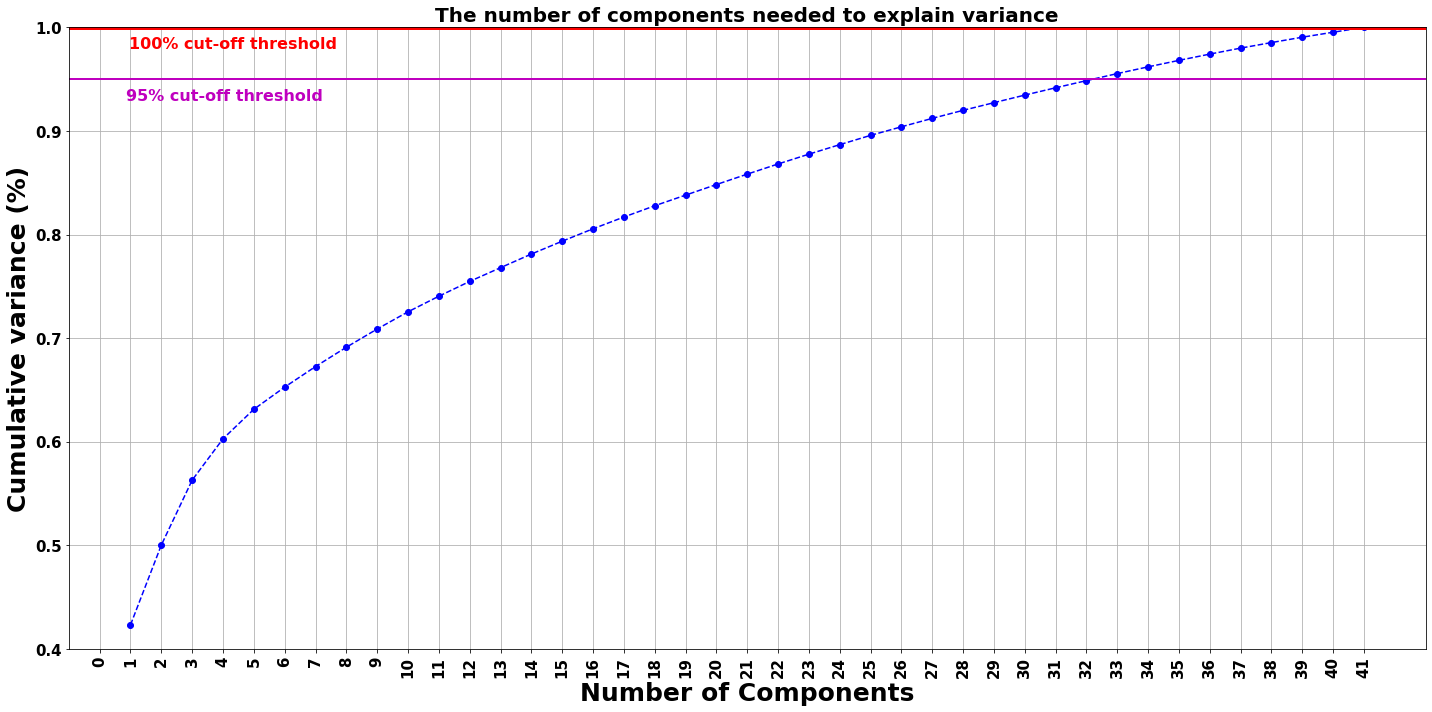

In [153]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, x_scale.shape[1]+1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=25,fontweight ='bold')
plt.xticks(np.arange(0, x_scale.shape[1]+1, step=1)) 
plt.ylabel('Cumulative variance (%)',fontsize=25,fontweight ='bold')
plt.title('The number of components needed to explain variance',fontsize=20,fontweight ='bold')
plt.axhline(y=1, color='r', linestyle='-',linewidth = '5')
plt.text(0.95, 0.98, '100% cut-off threshold', color = 'red', fontsize=16,fontweight ='bold')
plt.axhline(y=0.95, color='m', linestyle='-',linewidth = '2')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'm', fontsize=16,fontweight ='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.grid(axis = 'x')
plt.grid(True)
plt.ylim(0.4,1.0)
plt.tight_layout()
plt.show()

In [154]:
# Observations:

# As per the graph, we can see that 32 principal components attribute for 95% of variation in the data.

# Hence I will pick 32 components for our prediction.

# I will use 32 features as no. of components in PCA to reduce the dimensions

In [155]:
# Applying PCA transformation on X data to reduce the no. of columns
pca=PCA(n_components=32)
x=pca.fit_transform(x_scale)
x=pd.DataFrame(x)
x.head()


0         1         2         3         4         5         6   \
0  5.504549  1.221848  3.144009 -0.787989 -0.052413 -0.688453 -1.502384   
1  6.507406  1.060482  0.459088  0.358022 -1.441279 -0.025487 -0.522615   
2 -4.914005  1.525502  0.078163 -1.476617  1.044053  0.509140 -0.146745   
3  7.919761  1.638916  0.346302 -0.445807  0.393272  1.177873  0.901424   
4 -3.289729  2.266354  0.040429 -1.484670 -1.102707 -1.338381  0.590412   

         7         8         9         10        11        12        13  \
0  0.098359 -0.324116  1.024934 -0.244658 -0.453858 -0.258499  0.158551   
1 -1.569041  1.207806  1.103456  2.268888  0.106599  1.800553 -1.891234   
2  0.169310  0.602524  0.929995 -0.696370 -0.626616  0.840624  0.799963   
3  1.342172  1.413102 -0.946430  0.067141  0.172764  0.132954 -0.552921   
4 -0.189930  0.969212  0.555306 -0.868069  0.226422 -0.121682  1.011016   

         14        15        16        17        18        19        20  \
0  0.205542  0.284516  1.190287  0.327345 -0.446166 -0.643972  0.536726   
1 -1.312497  0.285243  0.114773 -0.558670 -0.320614  1.138375 -0.225910   
2 -0.059774 -0.079874 -0.890189  0.023382 -0.348657  0.866108 -0.203614   
3 -0.507522  0.451861 -0.547362  0.342260  0.291104 -1.007918 -0.817479   
4  0.440513  0.418663 -0.496477 -0.285784 -0.239574 -0.017618 -0.197598   

         21        22        23        24        25        26        27  \
0  1.170360 -0.130694  1.210163  0.153463  0.205364  1.096502  1.051283   
1  1.454398 -1.954633 -1.518231  0.261895 -0.064757  0.540515  1.653310   
2 -0.507071 -0.482082  0.747369 -0.233128 -0.387822 -0.408344 -0.348845   
3 -1.014226 -0.384166 -1.204568  0.704549  0.503313 -0.505803 -1.168966   
4 -0.601047 -0.471057  0.340290 -0.246723 -0.353966 -0.552567 -0.454466   

         28        29        30        31  
0  0.415419 -0.303307 -0.337848 -0.692243  
1 -0.699474  0.099539 -0.270194  0.347696  
2  0.406354  0.604172  0.054123  0.551751  
3  0.215053  0.011879 -0.836517  0.140494  
4 -0.707067 -0.346509  0.300389 -0.255919

In [156]:
# Observations:

# After applying PCA transformation, X dataset is reduced to 32 dimensions. 

# I will use this X data for model training

# EDA part is completed

# Model Building

In [157]:
# Starting with "LinearRegression" as the target variable is continuous data

In [158]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


Random State  Training R2 Score  Testing R2 Score  Difference in R2 Score
2           930          92.728906         92.740725                0.011819
0           618          92.698530         92.650653                0.047877
1           908          92.648164         92.552327                0.095837

In [159]:
# Observations:

# From the above table, as multple random states give same training and testing accuarcy scores,

# Taking one of this from the below code

In [160]:
# Getting the best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BRS=np.array(RSN)[0]
BRS

930

In [161]:
# Observation:

# Considering random state=930 for the model building


In [162]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [163]:
# Training the model and checking  metrics with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.9274072528827483
Mean Absolute Error(MAE) :  0.10718041482316362
Mean Squared Error(MSE) :  0.02936258084758692
Root Mean Squared Error(RMSE) :  0.1713551307886254


# Cross Validation for Linear Regression

In [164]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation table


No of Folds  Cross Validation R2 Score  Model R2 Score  \
8           10                  90.931406       92.740725   
7            9                  90.740867       92.740725   
3            5                  90.496584       92.740725   
4            6                  90.495646       92.740725   
6            8                  90.284418       92.740725   
5            7                  90.238389       92.740725   
1            3                  89.327091       92.740725   
2            4                  85.289799       92.740725   
0            2                  82.849964       92.740725   

   Difference in R2 Score  
8                0.018093  
7                0.019999  
3                0.022441  
4                0.022451  
6                0.024563  
5                0.025023  
1                0.034136  
2                0.074509  
0                0.098908

In [165]:
# Observations:

# Getting the no. folds where the delta is least between cross validation and model scores from the below code

# In this case, selected CV=3 from the above table


In [166]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
BCV

10

In [167]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)


The CV r2 score is: 90.93140607081128 
The model r2 score is: 92.74072528827483
Difference is: 0.018093192174635453


# Other Regression Algorithms

In [170]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# Defining the list with all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('XGBRegressor()',XGBRegressor())]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # Appending "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         # Appending "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          # Appending "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))# Appending "RMSE" to the list 
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("Table with performance of the models")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True)  # sorting the score table using the difference

Table with performance of the models


Model  Model R2 Score  Cross Validation R2 Score  \
8       RandomForestRegressor()       91.288270                  91.711055   
11               XGBRegressor()       92.563577                  91.870251   
9         ExtraTreesRegressor()       93.288810                  92.219071   
7                  ElasticNet()       86.721618                  85.566568   
5                       Lasso()       76.206725                  74.938314   
10  GradientBoostingRegressor()       93.981329                  92.515183   
6                       Ridge()       92.747634                  90.939507   
0            LinearRegression()       92.740725                  90.931406   
4                         SVR()       93.196679                  91.303846   
3                SGDRegressor()       92.716611                  90.683316   
2         KNeighborsRegressor()       93.283098                  89.911673   
1       DecisionTreeRegressor()       77.961924                  85.138279   

    Difference in R2 Score       MAE       MSE      RMSE  
8                 0.004228  0.070540  0.035238  0.187717  
11                0.006933  0.077730  0.030079  0.173433  
9                 0.010697  0.064218  0.027146  0.164759  
7                 0.011550  0.139319  0.053709  0.231752  
5                 0.012684  0.231933  0.096240  0.310226  
10                0.014661  0.064207  0.024345  0.156027  
6                 0.018081  0.106949  0.029335  0.171274  
0                 0.018093  0.107180  0.029363  0.171355  
4                 0.018928  0.084935  0.027518  0.165886  
3                 0.020333  0.108365  0.029460  0.171640  
2                 0.033714  0.091010  0.027169  0.164830  
1                 0.071764  0.105757  0.089140  0.298564

In [171]:
# Getting the best model where the least difference between cross validation score and model score
BMS=score_table["Model"][score_table["Difference in R2 Score"]==score_table["Difference in R2 Score"].min()]
BM=np.array(BMS)[0]
BM  # Best Model

'RandomForestRegressor()'

In [172]:
# Observations:

# Based on the comparison between model r2 score and cross validation scores for multiple models,
# I have considered "RandomForestRegressor()" is the best model as the difference in r2 score is least among all the models

# In this case, best model is chosen based on scoring parameter: r2_score

#However, best model can change if I change scoring parameter to MSE or MAE or RMSE

# Hyper parameter tuning will be pefromed for "RandomForestRegressor()"


# Hyper Parameter Tuning

In [177]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for Random Forest Regressor

# Number of trees in random forest
n_estimators = [50,100,200,300]
# Scoring criterion
criterion=["squared_error", "absolute_error", "friedman_mse"]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [None,2,3,4,5,7]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [178]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [179]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=RandomForestRegressor(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)

print("Model : RandomForestRegressor")
print("R2 Score : ",r2_score(y_test,pred))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred)))

Model : RandomForestRegressor
R2 Score :  0.9060222768781626
Mean Absolute Error(MAE) :  0.07139260869565223
Mean Squared Error(MSE) :  0.03801245444782611
Root Mean Squared Error(RMSE) :  0.19496782926376882


In [180]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV R2 score is:",score*100,"\nThe model R2 score is:",r2_score(y_test,pred)*100)
print("Difference is:",r2_score(y_test,pred)-score)

The CV R2 score is: 90.8153735368663 
The model R2 score is: 90.60222768781627
Difference is: -0.0021314584905004486


In [181]:
# Observations for Random Forest Regressor:

# Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.002131

# Model with default parameters: The difference between Cross Validation Score and model score is 0.004228

# As the delta between model score and cross validation score is least in the model with hyper parameter tuning
#considering the model with hyper parameter tuning as the best model for saving



# Save Model

In [182]:
# saving the Hyper Parameter Tuned Random Forest Regression model

import pickle
filename='Students-CGPA-Prediction.pkl'
pickle.dump(ht_model, open(filename,'wb'))

# Conclusion

In [183]:
loaded_model=pickle.load(open('Students-CGPA-Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)
Predicted=loaded_model.predict(x_test)
Original=np.array(y_test)
Predicted_df=pd.DataFrame(data=Predicted,columns=["Predicted"])
Original_df=pd.DataFrame(data=Original,columns=["Original"])
conclusion=pd.concat([Predicted_df,Original_df],axis=1)
conclusion

90.60222768781627


Predicted  Original
0      2.60023     2.557
1      2.89937     2.860
2      2.09619     2.165
3      3.35393     3.248
4      3.01965     2.917
..         ...       ...
110    2.30817     2.206
111    1.99155     2.042
112    2.51595     2.484
113    2.91976     3.058
114    2.77072     2.775

[115 rows x 2 columns]